In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
#movielens_20m_dataset_path = kagglehub.dataset_download('grouplens/movielens-20m-dataset')
print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:17:15_PST_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0


https://github.com/rapidsai/cudf?tab=readme-ov-file#pip

In [4]:
pip install --extra-index-url=https://pypi.nvidia.com cudf-cu12

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [100]:
import rmm
import cudf
rmm.reinitialize(pool_allocator=True, managed_memory=True)
print("RAPIDS cuDF is using GPU memory:", rmm.is_initialized())

RAPIDS cuDF is using GPU memory: True


In [6]:
import cupy as cp

def check_memory():
    memory_pool = cp.get_default_memory_pool()
    total_memory = cp.cuda.Device(0).mem_info[0]  # Total memory available
    used_memory = memory_pool.used_bytes()       # Memory allocated by the pool
    free_memory = total_memory - used_memory
    print(f"GPU Memory - Total: {total_memory / (1024**3):.2f} GB, Used: {used_memory / (1024**3):.2f} GB, Free: {free_memory / (1024**3):.2f} GB")

check_memory()

GPU Memory - Total: 14.64 GB, Used: 0.00 GB, Free: 14.64 GB


In [7]:
"""
movielens_20m_dataset_path = kagglehub.dataset_download('grouplens/movielens-20m-dataset')

# Percorso ai file del dataset scaricato
dataset_directory = '/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1'

# Elenca e stampa i file presenti nella directory del dataset
for dirname, _, filenames in os.walk(dataset_directory):
    for filename in filenames:
        print(f"File trovato: {filename}")
"""

'\nmovielens_20m_dataset_path = kagglehub.dataset_download(\'grouplens/movielens-20m-dataset\')\n\n# Percorso ai file del dataset scaricato\ndataset_directory = \'/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1\'\n\n# Elenca e stampa i file presenti nella directory del dataset\nfor dirname, _, filenames in os.walk(dataset_directory):\n    for filename in filenames:\n        print(f"File trovato: {filename}")\n'

In [8]:
"""
ratings_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/rating.csv")
links_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/link.csv")
genome_tags_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/genome_tags.csv")
genome_scores_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/genome_scores.csv")
tags_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/tag.csv")
movies_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/movie.csv")
"""

'\nratings_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/rating.csv")\nlinks_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/link.csv")\ngenome_tags_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/genome_tags.csv")\ngenome_scores_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/genome_scores.csv")\ntags_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/tag.csv")\nmovies_df = cudf.read_csv("/root/.cache/kagglehub/datasets/grouplens/movielens-20m-dataset/versions/1/movie.csv")\n'

In [9]:

ratings_df = cudf.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")
links_df = cudf.read_csv("/kaggle/input/movielens-20m-dataset/link.csv")
genome_tags_df = cudf.read_csv("/kaggle/input/movielens-20m-dataset/genome_tags.csv")
genome_scores_df = cudf.read_csv("/kaggle/input/movielens-20m-dataset/genome_scores.csv")
tags_df = cudf.read_csv("/kaggle/input/movielens-20m-dataset/tag.csv")
movies_df = cudf.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")


In [10]:
check_memory()

GPU Memory - Total: 12.13 GB, Used: 0.00 GB, Free: 12.13 GB


In [11]:
print("ratings_df:",ratings_df.columns)
print("links_df:",links_df.columns)
print("genome_tags_df:",genome_tags_df.columns)
print("genome_scores_df:",genome_scores_df.columns)
print("tags_df:",tags_df.columns)
print("movies_df:",movies_df.columns)

ratings_df: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
links_df: Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
genome_tags_df: Index(['tagId', 'tag'], dtype='object')
genome_scores_df: Index(['movieId', 'tagId', 'relevance'], dtype='object')
tags_df: Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')
movies_df: Index(['movieId', 'title', 'genres'], dtype='object')


In [12]:
import gc
rmm.reinitialize(pool_allocator=True, managed_memory=True)  # Reset GPU memory
movies_links = movies_df.merge(links_df, on="movieId", how="left")
del links_df  # Free up memory
gc.collect()
movies_links.head()

movieId                       title                        genres  imdbId  \
0     1804     Newton Boys, The (1998)                   Crime|Drama  120769   
1     1805          Wild Things (1998)  Crime|Drama|Mystery|Thriller  120890   
2     1806               Paulie (1998)     Adventure|Children|Comedy  125454   
3     1807   Cool, Dry Place, A (1998)                         Drama  120642   
4     1809  Fireworks (Hana-bi) (1997)                   Crime|Drama  119250   

   tmdbId  
0   42807  
1     617  
2   36568  
3   37272  
4    5910

In [13]:
# Merge ratings with movies
rmm.reinitialize(pool_allocator=True, managed_memory=True)  # Reset GPU memory
ratings_movies = ratings_df.merge(movies_links, on="movieId", how="left")
del ratings_df, movies_links  # Free up memory
gc.collect()
ratings_movies.head()

userId  movieId  rating            timestamp  \
0      21     1278     2.0  2001-06-10 16:14:07   
1      21     1282     3.0  2001-06-10 16:20:13   
2      21     1285     4.0  2001-06-10 16:20:44   
3      21     1288     4.0  2001-06-10 16:15:41   
4      21     1291     4.0  2001-06-10 16:20:28   

                                       title  \
0                  Young Frankenstein (1974)   
1                            Fantasia (1940)   
2                            Heathers (1989)   
3                  This Is Spinal Tap (1984)   
4  Indiana Jones and the Last Crusade (1989)   

                               genres  imdbId  tmdbId  
0                      Comedy|Fantasy   72431    3034  
1  Animation|Children|Fantasy|Musical   32455     756  
2                              Comedy   97493    2640  
3                              Comedy   88258   11031  
4                    Action|Adventure   97576      89

In [14]:
rmm.reinitialize(pool_allocator=True, managed_memory=True)  # Reset GPU memory
# Merge genome scores with genome tags
genome_data = genome_scores_df.merge(genome_tags_df, on="tagId", how="left")
del genome_tags_df  # Free up memory
gc.collect()
genome_data.head()

movieId  tagId  relevance               tag
0        3    433    0.02425            german
1        3    434    0.01250           germany
2        3    435    0.02650            ghosts
3        3    436    0.10700  ghosts/afterlife
4        3    437    0.04550      giant robots

In [15]:
rmm.reinitialize(pool_allocator=True, managed_memory=True)
# Merge tags with movies
tags_movies = tags_df.merge(movies_df, on="movieId", how="left")
del tags_df  # Free up memory
gc.collect()
tags_movies.head()

userId  movieId                   tag            timestamp  \
0    1629     2762          twist ending  2014-03-10 17:05:14   
1    1629     2763  intelligent thriller  2014-03-10 17:51:39   
2    1629     2763        Pierce Brosnan  2014-03-10 17:51:32   
3    1629     2763            plot holes  2014-03-10 17:51:35   
4    1629     2797                comedy  2014-03-10 16:47:36   

                             title                        genres  
0          Sixth Sense, The (1999)          Drama|Horror|Mystery  
1  Thomas Crown Affair, The (1999)                Action|Mystery  
2  Thomas Crown Affair, The (1999)                Action|Mystery  
3  Thomas Crown Affair, The (1999)                Action|Mystery  
4                       Big (1988)  Comedy|Drama|Fantasy|Romance

In [16]:
check_memory()

GPU Memory - Total: 9.13 GB, Used: 0.00 GB, Free: 9.13 GB


In [17]:
print("ratings_movies:",ratings_movies.columns)
print("genome_data:",genome_data.columns)
print("tags_movies:",tags_movies.columns)

ratings_movies: Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres', 'imdbId',
       'tmdbId'],
      dtype='object')
genome_data: Index(['movieId', 'tagId', 'relevance', 'tag'], dtype='object')
tags_movies: Index(['userId', 'movieId', 'tag', 'timestamp', 'title', 'genres'], dtype='object')


In [18]:
ratings_movies = ratings_movies[["userId", "movieId", "rating", "title", "genres","timestamp"]].to_pandas()
genome_data = genome_data[["movieId", "tag", "relevance"]].to_pandas()
tags_movies = tags_movies[["userId", "movieId", "tag"]].to_pandas()
#Remove repeated columns

In [19]:
print("ratings_movies:",ratings_movies.info())
print("genome_data:",genome_data.info())
print("tags_movies:",tags_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   title      object 
 4   genres     object 
 5   timestamp  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 915.5+ MB
ratings_movies: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709768 entries, 0 to 11709767
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tag        object 
 2   relevance  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 268.0+ MB
genome_data: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465426 entries, 0 to 465425
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   userId   465426 non-null  int64 
 1   movieId  465426 non-null  int64 
 2   tag      465426 non-null  

In [20]:
ratings_movies.head()

userId  movieId  rating                                      title  \
0      21     1278     2.0                  Young Frankenstein (1974)   
1      21     1282     3.0                            Fantasia (1940)   
2      21     1285     4.0                            Heathers (1989)   
3      21     1288     4.0                  This Is Spinal Tap (1984)   
4      21     1291     4.0  Indiana Jones and the Last Crusade (1989)   

                               genres            timestamp  
0                      Comedy|Fantasy  2001-06-10 16:14:07  
1  Animation|Children|Fantasy|Musical  2001-06-10 16:20:13  
2                              Comedy  2001-06-10 16:20:44  
3                              Comedy  2001-06-10 16:15:41  
4                    Action|Adventure  2001-06-10 16:20:28

In [21]:
#The optimal way to represent the genres will be one-hot encoding, or having  one column as an indicator variable for every genre, so we begin by extracting all unique genres from the list.
all_genres = [genre for sublist in ratings_movies['genres'].str.split('|') for genre in sublist]
unique_genres = list(set(all_genres))
print(unique_genres)

['Thriller', 'Sci-Fi', 'Musical', 'Western', '(no genres listed)', 'War', 'IMAX', 'Comedy', 'Film-Noir', 'Documentary', 'Animation', 'Crime', 'Mystery', 'Adventure', 'Horror', 'Fantasy', 'Children', 'Action', 'Romance', 'Drama']


In [22]:
unique_genres.remove('(no genres listed)')

In [23]:
temp = ratings_movies[['movieId', 'title', 'genres']].drop_duplicates()

In [24]:
for genre in unique_genres:
    # Create a new column with 1 if the genre is present, else 0
    temp[genre] = temp['genres'].str.contains(genre).astype(int)

In [25]:
temp.head()

movieId                                      title  \
0     1278                  Young Frankenstein (1974)   
1     1282                            Fantasia (1940)   
2     1285                            Heathers (1989)   
3     1288                  This Is Spinal Tap (1984)   
4     1291  Indiana Jones and the Last Crusade (1989)   

                               genres  Thriller  Sci-Fi  Musical  Western  \
0                      Comedy|Fantasy         0       0        0        0   
1  Animation|Children|Fantasy|Musical         0       0        1        0   
2                              Comedy         0       0        0        0   
3                              Comedy         0       0        0        0   
4                    Action|Adventure         0       0        0        0   

   War  IMAX  Comedy  ...  Animation  Crime  Mystery  Adventure  Horror  \
0    0     0       1  ...          0      0        0          0       0   
1    0     0       0  ...          1      0        0          0       0   
2    0     0       1  ...          0      0        0          0       0   
3    0     0       1  ...          0      0        0          0       0   
4    0     0       0  ...          0      0        0          1       0   

   Fantasy  Children  Action  Romance  Drama  
0        1         0       0        0      0  
1        1         1       0        0      0  
2        0         0       0        0      0  
3        0         0       0        0      0  
4        0         0       1        0      0  

[5 rows x 22 columns]

In [26]:
#The movie's release year is given in parentheses in the title, so it can be used as a new variable. A very small number of movies don't have a release year listed, so it's fine to impute a dummy value.
temp['year'] = temp['title'].str.extract(r'\((\d{4})\)')
temp['year'] = pd.to_numeric(temp['year'], errors='coerce')
y_median = temp['year'].median()
temp['year'] = temp['year'].fillna(y_median).astype('int64')

In [27]:
#Movies that have a title other than the English language one have the original title given in parentheses, so if there is a set of parentheses with alphabetic characters inside, the movie is a foreign language one.
temp['is_foreign_language'] = temp['title'].str.extract(r'\((.*[A-Za-z].*)\)')[0].notna()

In [28]:
temp = temp.drop(['title'], axis=1)
temp = temp.drop(['genres'], axis=1)
temp

movieId  Thriller  Sci-Fi  Musical  Western  War  IMAX  Comedy  \
0            1278         0       0        0        0    0     0       1   
1            1282         0       0        1        0    0     0       0   
2            1285         0       0        0        0    0     0       1   
3            1288         0       0        0        0    0     0       1   
4            1291         0       0        0        0    0     0       0   
...           ...       ...     ...      ...      ...  ...   ...     ...   
19979215   121017         0       0        0        0    0     0       1   
19980296   103010         0       0        0        0    0     0       1   
19982344   113539         0       0        0        0    0     0       0   
19989521   110167         0       0        0        0    0     0       0   
19989523   110510         0       0        0        0    0     0       0   

          Film-Noir  Documentary  ...  Mystery  Adventure  Horror  Fantasy  \
0                 0            0  ...        0          0       0        1   
1                 0            0  ...        0          0       0        1   
2                 0            0  ...        0          0       0        0   
3                 0            0  ...        0          0       0        0   
4                 0            0  ...        0          1       0        0   
...             ...          ...  ...      ...        ...     ...      ...   
19979215          0            0  ...        0          0       0        0   
19980296          0            0  ...        0          0       0        0   
19982344          0            0  ...        0          0       0        0   
19989521          0            0  ...        0          0       0        0   
19989523          1            0  ...        0          0       0        0   

          Children  Action  Romance  Drama  year  is_foreign_language  
0                0       0        0      0  1974                False  
1                1       0        0      0  1940                False  
2                0       0        0      0  1989                False  
3                0       0        0      0  1984                False  
4                0       1        0      0  1989                False  
...            ...     ...      ...    ...   ...                  ...  
19979215         0       0        0      0  1962                False  
19980296         0       0        1      1  2012                 True  
19982344         0       0        0      1  2011                 True  
19989521         0       0        0      1  1976                 True  
19989523         0       0        0      0  1979                False  

[26744 rows x 22 columns]

In [29]:
#Finding the average given rating per movie.
average_ratings = ratings_movies.groupby('movieId')['rating'].mean().reset_index()
average_ratings.columns = ['movieId', 'ratings_avg']
temp = pd.merge(temp, average_ratings[['movieId', 'ratings_avg']], on='movieId', how='left')

In [30]:
#Finding the median given rating per movie. A substantial difference between the average and the median can indicate a difference in reviewing patterns, so it could be useful.
median_ratings = ratings_movies.groupby('movieId')['rating'].median().reset_index()
median_ratings.columns = ['movieId', 'ratings_med']
temp = pd.merge(temp, median_ratings[['movieId', 'ratings_med']], on='movieId', how='left')

In [31]:
#Finding the year where each movie got the most reviews from users.
ratings_movies['year'] = ratings_movies['timestamp'].str[:4].astype('int64')
a = ratings_movies.groupby('movieId')['year'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else None).reset_index()
a.columns = ['movieId', 'most_common_year']
temp = pd.merge (temp, a[['movieId', 'most_common_year']], on='movieId', how='left')
temp['most_common_year'] = temp['most_common_year'].astype('int64')
temp

movieId  Thriller  Sci-Fi  Musical  Western  War  IMAX  Comedy  \
0         1278         0       0        0        0    0     0       1   
1         1282         0       0        1        0    0     0       0   
2         1285         0       0        0        0    0     0       1   
3         1288         0       0        0        0    0     0       1   
4         1291         0       0        0        0    0     0       0   
...        ...       ...     ...      ...      ...  ...   ...     ...   
26739   121017         0       0        0        0    0     0       1   
26740   103010         0       0        0        0    0     0       1   
26741   113539         0       0        0        0    0     0       0   
26742   110167         0       0        0        0    0     0       0   
26743   110510         0       0        0        0    0     0       0   

       Film-Noir  Documentary  ...  Fantasy  Children  Action  Romance  Drama  \
0              0            0  ...        1         0       0        0      0   
1              0            0  ...        1         1       0        0      0   
2              0            0  ...        0         0       0        0      0   
3              0            0  ...        0         0       0        0      0   
4              0            0  ...        0         0       1        0      0   
...          ...          ...  ...      ...       ...     ...      ...    ...   
26739          0            0  ...        0         0       0        0      0   
26740          0            0  ...        0         0       0        1      1   
26741          0            0  ...        0         0       0        0      1   
26742          0            0  ...        0         0       0        0      1   
26743          1            0  ...        0         0       0        0      0   

       year  is_foreign_language  ratings_avg  ratings_med  most_common_year  
0      1974                False     3.996785          4.0              2000  
1      1940                False     3.735563          4.0              2000  
2      1989                False     3.758621          4.0              2000  
3      1984                False     4.032235          4.0              2000  
4      1989                False     4.007593          4.0              2005  
...     ...                  ...          ...          ...               ...  
26739  1962                False     3.500000          3.5              2015  
26740  2012                 True     3.500000          3.5              2014  
26741  2011                 True     4.000000          4.0              2014  
26742  1976                 True     4.500000          4.5              2014  
26743  1979                False     4.500000          4.5              2014  

[26744 rows x 25 columns]

In [32]:
#Finding the total number of ratings per movie.
num_ratings_per_movie = ratings_movies.groupby('movieId').size().reset_index(name='num_ratings')
temp = pd.merge (temp, num_ratings_per_movie[['movieId', 'num_ratings']], on='movieId', how='left')
temp

movieId  Thriller  Sci-Fi  Musical  Western  War  IMAX  Comedy  \
0         1278         0       0        0        0    0     0       1   
1         1282         0       0        1        0    0     0       0   
2         1285         0       0        0        0    0     0       1   
3         1288         0       0        0        0    0     0       1   
4         1291         0       0        0        0    0     0       0   
...        ...       ...     ...      ...      ...  ...   ...     ...   
26739   121017         0       0        0        0    0     0       1   
26740   103010         0       0        0        0    0     0       1   
26741   113539         0       0        0        0    0     0       0   
26742   110167         0       0        0        0    0     0       0   
26743   110510         0       0        0        0    0     0       0   

       Film-Noir  Documentary  ...  Children  Action  Romance  Drama  year  \
0              0            0  ...         0       0        0      0  1974   
1              0            0  ...         1       0        0      0  1940   
2              0            0  ...         0       0        0      0  1989   
3              0            0  ...         0       0        0      0  1984   
4              0            0  ...         0       1        0      0  1989   
...          ...          ...  ...       ...     ...      ...    ...   ...   
26739          0            0  ...         0       0        0      0  1962   
26740          0            0  ...         0       0        1      1  2012   
26741          0            0  ...         0       0        0      1  2011   
26742          0            0  ...         0       0        0      1  1976   
26743          1            0  ...         0       0        0      0  1979   

       is_foreign_language  ratings_avg  ratings_med  most_common_year  \
0                    False     3.996785          4.0              2000   
1                    False     3.735563          4.0              2000   
2                    False     3.758621          4.0              2000   
3                    False     4.032235          4.0              2000   
4                    False     4.007593          4.0              2005   
...                    ...          ...          ...               ...   
26739                False     3.500000          3.5              2015   
26740                 True     3.500000          3.5              2014   
26741                 True     4.000000          4.0              2014   
26742                 True     4.500000          4.5              2014   
26743                False     4.500000          4.5              2014   

       num_ratings  
0            15087  
1            12139  
2            10991  
3            16054  
4            31280  
...            ...  
26739            1  
26740            1  
26741            1  
26742            1  
26743            1  

[26744 rows x 26 columns]

In [33]:
#Finding the total number of given tags per movie.
nt = tags_movies.drop_duplicates(subset=['movieId', 'tag']).groupby('movieId').size().reset_index(name='num_tags')
temp = pd.merge (temp, nt[['movieId', 'num_tags']], on='movieId', how='left')
temp['num_tags'] = temp['num_tags'].fillna(0)
temp

movieId  Thriller  Sci-Fi  Musical  Western  War  IMAX  Comedy  \
0         1278         0       0        0        0    0     0       1   
1         1282         0       0        1        0    0     0       0   
2         1285         0       0        0        0    0     0       1   
3         1288         0       0        0        0    0     0       1   
4         1291         0       0        0        0    0     0       0   
...        ...       ...     ...      ...      ...  ...   ...     ...   
26739   121017         0       0        0        0    0     0       1   
26740   103010         0       0        0        0    0     0       1   
26741   113539         0       0        0        0    0     0       0   
26742   110167         0       0        0        0    0     0       0   
26743   110510         0       0        0        0    0     0       0   

       Film-Noir  Documentary  ...  Action  Romance  Drama  year  \
0              0            0  ...       0        0      0  1974   
1              0            0  ...       0        0      0  1940   
2              0            0  ...       0        0      0  1989   
3              0            0  ...       0        0      0  1984   
4              0            0  ...       1        0      0  1989   
...          ...          ...  ...     ...      ...    ...   ...   
26739          0            0  ...       0        0      0  1962   
26740          0            0  ...       0        1      1  2012   
26741          0            0  ...       0        0      1  2011   
26742          0            0  ...       0        0      1  1976   
26743          1            0  ...       0        0      0  1979   

       is_foreign_language  ratings_avg  ratings_med  most_common_year  \
0                    False     3.996785          4.0              2000   
1                    False     3.735563          4.0              2000   
2                    False     3.758621          4.0              2000   
3                    False     4.032235          4.0              2000   
4                    False     4.007593          4.0              2005   
...                    ...          ...          ...               ...   
26739                False     3.500000          3.5              2015   
26740                 True     3.500000          3.5              2014   
26741                 True     4.000000          4.0              2014   
26742                 True     4.500000          4.5              2014   
26743                False     4.500000          4.5              2014   

       num_ratings  num_tags  
0            15087      46.0  
1            12139      47.0  
2            10991      52.0  
3            16054      59.0  
4            31280      73.0  
...            ...       ...  
26739            1       0.0  
26740            1       4.0  
26741            1       5.0  
26742            1       1.0  
26743            1       1.0  

[26744 rows x 27 columns]

In [34]:
#Finding the most relevant tag for each movie.
idx_max_relevance = genome_data.groupby('movieId')['relevance'].idxmax()
max_relevance_genome = genome_data.loc[idx_max_relevance, ['movieId', 'tag']].reset_index(drop=True)
max_relevance_genome.columns = ['movieId', 'relevant_genome_tag']
temp = pd.merge(temp, max_relevance_genome[['movieId', 'relevant_genome_tag']], on='movieId', how='left')
temp['relevant_genome_tag'] = temp['relevant_genome_tag'].fillna('Unknown')
temp

movieId  Thriller  Sci-Fi  Musical  Western  War  IMAX  Comedy  \
0         1278         0       0        0        0    0     0       1   
1         1282         0       0        1        0    0     0       0   
2         1285         0       0        0        0    0     0       1   
3         1288         0       0        0        0    0     0       1   
4         1291         0       0        0        0    0     0       0   
...        ...       ...     ...      ...      ...  ...   ...     ...   
26739   121017         0       0        0        0    0     0       1   
26740   103010         0       0        0        0    0     0       1   
26741   113539         0       0        0        0    0     0       0   
26742   110167         0       0        0        0    0     0       0   
26743   110510         0       0        0        0    0     0       0   

       Film-Noir  Documentary  ...  Romance  Drama  year  is_foreign_language  \
0              0            0  ...        0      0  1974                False   
1              0            0  ...        0      0  1940                False   
2              0            0  ...        0      0  1989                False   
3              0            0  ...        0      0  1984                False   
4              0            0  ...        0      0  1989                False   
...          ...          ...  ...      ...    ...   ...                  ...   
26739          0            0  ...        0      0  1962                False   
26740          0            0  ...        1      1  2012                 True   
26741          0            0  ...        0      1  2011                 True   
26742          0            0  ...        0      1  1976                 True   
26743          1            0  ...        0      0  1979                False   

       ratings_avg  ratings_med  most_common_year  num_ratings  num_tags  \
0         3.996785          4.0              2000        15087      46.0   
1         3.735563          4.0              2000        12139      47.0   
2         3.758621          4.0              2000        10991      52.0   
3         4.032235          4.0              2000        16054      59.0   
4         4.007593          4.0              2005        31280      73.0   
...            ...          ...               ...          ...       ...   
26739     3.500000          3.5              2015            1       0.0   
26740     3.500000          3.5              2014            1       4.0   
26741     4.000000          4.0              2014            1       5.0   
26742     4.500000          4.5              2014            1       1.0   
26743     4.500000          4.5              2014            1       1.0   

       relevant_genome_tag  
0                    spoof  
1          classical music  
2               teen movie  
3            rock and roll  
4            treasure hunt  
...                    ...  
26739              Unknown  
26740              Unknown  
26741              Unknown  
26742              Unknown  
26743              Unknown  

[26744 rows x 28 columns]

In [35]:
tags_movies.head()

userId  movieId                   tag
0    1629     2762          twist ending
1    1629     2763  intelligent thriller
2    1629     2763        Pierce Brosnan
3    1629     2763            plot holes
4    1629     2797                comedy

In [36]:
#Finding the most common tag for each movie. In the case of multiple equally common tags, we take the first.
most_common_tag = tags_movies.groupby('movieId')['tag'].agg(lambda x: x.mode().iloc[0]).reset_index()
most_common_tag.columns = ['movieId', 'common_user_tag']
temp = pd.merge(temp, most_common_tag[['movieId', 'common_user_tag']], on='movieId', how='left')
temp['common_user_tag'] = temp['common_user_tag'].fillna('None')

In [37]:
temp.isna().sum()

movieId                0
Thriller               0
Sci-Fi                 0
Musical                0
Western                0
War                    0
IMAX                   0
Comedy                 0
Film-Noir              0
Documentary            0
Animation              0
Crime                  0
Mystery                0
Adventure              0
Horror                 0
Fantasy                0
Children               0
Action                 0
Romance                0
Drama                  0
year                   0
is_foreign_language    0
ratings_avg            0
ratings_med            0
most_common_year       0
num_ratings            0
num_tags               0
relevant_genome_tag    0
common_user_tag        0
dtype: int64

2.2 Choose your features (variables)!
With multiple features available for the movies, you need to consider the following two questions: 1. Should you normalize the data or leave it as is? 2. Should you include all these features, or can you reduce the dimensionality of the data?

1.What is the importance of normalizing the data in your analysis, and how does it impact the effectiveness of the clustering algorithms you plan to use?

Answer: Normalizing the data in the dataset is a very important step because the variables may be represented in vastly different scales at first - for example, in this dataset, the ratings are on a scale from 1 to 5, but the number of ratings ranges from 1 to the tens of thousands. If using distance-based measures for clustering (such as with K-Means), this causes large-valued variables to have an exaggerated effect on the algorithm's results, because the distances between samples along that axis will be much greater than along others. If the data is normalized, however, it prevents some variables from dominating in the calculations and helps fix that skew. It's worth noting that it mainly makes sense to normalize numerical variables, as categorical variables that have been encoded to numbers don't have implicit numerical relationships between them. Time data, such as years, is technically categorical, as years are discrete units, so it depends on the purpose.

2.If you find that normalizing the values is beneficial, please proceed to normalize the data. To simplify this task, refer to the scikit-learn package for tools and functions that facilitate data normalization.

Answer: To normalize the data, we would use MinMaxScaler. However, since below we will use Principal Component Analysis, it's optimal to instead standardize the data to have zero mean and unit variance, which we'll do with StandardScaler on every column except the movieId.

3.Could you provide some insights on dimensionality reduction? What techniques would be effective for reducing the number of features in the dataset, and why might this be beneficial for the analysis?

Answer: Dimensionality reduction could be useful for the analysis of a dataset in a variety of ways. When data is high-dimensional, many variables may not carry useful information that contributes significantly to the separability to the dataset, therefore, if the entire set of columns is being worked with, a lot of computational power is wasted without providing real benefit. Worse, some variables may not be merely unimportant, but noisy, and this noise can significantly harm the algorithm's performance. When feature engineering, we aim to extract useful variables from the data that describe it in a way that improves the dataset, but dimensionality reduction is a useful step to numerically determine the most useful features after this feature engineering-induced expansion of the feature set. Finally, if the dimensionality is reduced down to 2 or 3 axes, it provides a way to visualize the data as accurately as possible. The most common techniques for dimensionality reduction for clustering are PCA (Principal Component Analysis) and tSNE (t-Distributed Stochastic Neighbor Embedding). There are also other approaches such as using autoencoders as a non-linear technique.

4.If you believe dimensionality reduction would be advantageous, please select a method to reduce the dimensionality of the data.

Our dataset contains quite a low number of features, but there are some where a lot of the values were obtained by imputing missing values, which was necessary due to the structure of the dataset. Thus, applying dimensionality reduction can be useful to check whether these columns cause noise or not. We'll check what kind of results we get with PCA, as well as with an autoencoder model, which could perform better by capturing non-linear patterns.

In [102]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
sc = StandardScaler()

temp['is_foreign_language'] = le.fit_transform(temp['is_foreign_language'])
temp['relevant_genome_tag'] = le.fit_transform(temp['relevant_genome_tag'])
temp['common_user_tag'] = le.fit_transform(temp['common_user_tag'])

df_features = temp.drop(columns=['movieId'])
scaled_features = sc.fit_transform(df_features)

In [103]:
from sklearn.decomposition import PCA
#We initialize PCA with all dimensions once, just to see the explained variance scores for the principal components for every dimension. These will help in determining the optimal number of dimensions to reduce to.
#If a variable has a higher explained variance ratio, it's more worth including as a dimension after the reduction. As a rule of thumb, we should include the lowest number of dimensions
#that help us reach at least 90-95% cumulative variance.
pca = PCA()
pca.fit(scaled_features)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.09518745 0.08406224 0.07035504 0.05961009 0.05438426 0.04688883
 0.04550795 0.04091288 0.03819619 0.03619261 0.03472166 0.03403275
 0.03308083 0.0323998  0.03162946 0.03124045 0.02989991 0.02740687
 0.02716506 0.02537151 0.02409613 0.02116922 0.0206054  0.01914724
 0.01553184 0.01099672 0.00873497 0.00147266]


In [104]:
#We need 24 out of the 28 features to reach 95% variance, so PCA is not really useful here - we have almost no room for reducing dimensionality.
cumulative_variance = np.cumsum(explained_variance)
target_variance = 0.95
num_components = np.argmax(cumulative_variance >= target_variance) + 1
print(f"Number of components required to reach {target_variance * 100}% variance: {num_components}")


Number of components required to reach 95.0% variance: 24


In [105]:
#If we're targeting 90% explained variance, we still need 22 features.
target_variance = 0.90
num_components = np.argmax(cumulative_variance >= target_variance) + 1
print(f"Number of components required to reach {target_variance * 100}% variance: {num_components}")


Number of components required to reach 90.0% variance: 21


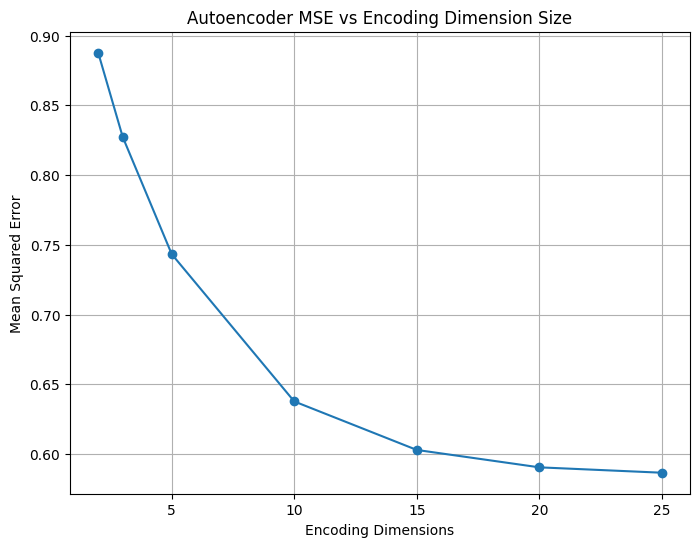

Number of dimensions: 2 | Mean Squared Error: 0.8877034187316895
Number of dimensions: 3 | Mean Squared Error: 0.827308714389801
Number of dimensions: 5 | Mean Squared Error: 0.74329674243927
Number of dimensions: 10 | Mean Squared Error: 0.6377193331718445
Number of dimensions: 15 | Mean Squared Error: 0.6029453873634338
Number of dimensions: 20 | Mean Squared Error: 0.5904814600944519
Number of dimensions: 25 | Mean Squared Error: 0.5866184830665588


In [106]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

#We will fit the autoencoder to the scaled dataset with a variety of dimension sizes in order to see where the "elbow" (the point of diminishing returns) is.
#In other words, see where the mean squared error starts to decrease very slowly as we add dimensions.

input_dim = scaled_features.shape[1]
encoding_dims = [2, 3, 5, 10, 15, 20, 25]

mean_squared_errors = []

for encoding_dim in encoding_dims:
    # autoencoder structure
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_layer)  # Bottleneck layer
    decoded = Dense(input_dim, activation='sigmoid')(encoded)      # Reconstruct input

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    encoder = Model(inputs=input_layer, outputs=encoded)

    # Compile autoencoder
    autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

    # Train autoencoder
    history = autoencoder.fit(
        scaled_features, scaled_features,
        epochs=50,
        batch_size=256,
        verbose=0,
        shuffle=True
    )

   
    mean_squared_errors.append(history.history['loss'][-1])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(encoding_dims, mean_squared_errors, marker='o')
plt.title("Autoencoder MSE vs Encoding Dimension Size")
plt.xlabel("Encoding Dimensions")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

for dim, mse in zip(encoding_dims, mean_squared_errors):
    print(f"Number of dimensions: {dim} | Mean Squared Error: {mse}")


The MSE seems to taper off around 15 dimensions, and there's very limited gain beyond this point. However, we ran a comparison to PCA's reconstruction quality with the same number of dimensions (via inverse transforming, to be able to compare the MSEs), and with this dataset, there is less information loss via dimensionality reduction with PCA overall. Still, this is not a huge reduction in dimensionality, and as we saw before with the explained variance ratios, we would need to use almost every dimension to preserve the dataset's characteristics with high accuracy, so it's not worth it.



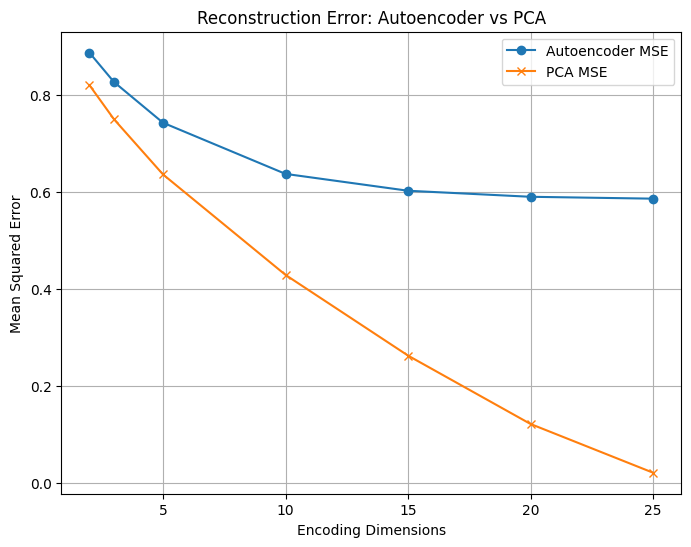

In [108]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

pca_mses = []

# Apply PCA and calculate MSE
for encoding_dim in encoding_dims:
    pca = PCA(n_components=encoding_dim)
    reduced_data = pca.fit_transform(scaled_features)
    reconstructed_data = pca.inverse_transform(reduced_data)
    
    mse = mean_squared_error(scaled_features, reconstructed_data)
    pca_mses.append(mse)
    

# Plot comparison between AutoEncoders and PCA
plt.figure(figsize=(8, 6))
plt.plot(encoding_dims, mean_squared_errors, marker='o', label="Autoencoder MSE")
plt.plot(encoding_dims, pca_mses, marker='x', label="PCA MSE")
plt.title("Reconstruction Error: Autoencoder vs PCA")
plt.xlabel("Encoding Dimensions")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()



PCA results better in any dimension,the more the dimension grow, more are the advantages of using PCA over AutoEncoders

# 2.3 Clustering

## Clustering Evaluation Metrics


### 1. Sum of Squared Distances (SSD)
- **Definition**: SSD measures the compactness of clusters by calculating the sum of squared distances between each point in a cluster and its centroid.
- **Purpose**: Lower SSD indicates more compact clusters.
- **Limitation**: SSD decreases with increasing $k$, which can make it hard to determine the optimal number of clusters without additional methods.
- **Formula**:
  $\text{SSD} = \sum_{k=1}^{K} \sum_{i \in C_k} ||x_i - \mu_k||^2$
  where $C_k$ is the $k-th$ cluster, $x_i$ is a point in the cluster, and $mu_k$ is the cluster centroid.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

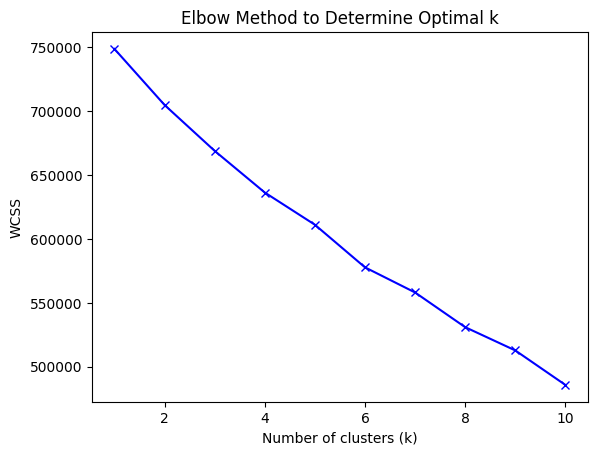

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ssd = []
K = range(1, 11)  # clusters to try
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    ssd.append(kmeans.inertia_)  # SSD

# Plot
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


### Results
The curve decreases as $k$ increases, which is expected because adding more clusters reduces the distances between points and their cluster centroids.
There is a noticeable "elbow point" at $k=3$, where the rate of decrease slows significantly, but honestly is not really clear, we are gonna do some furter checks

### 2. Silhouette Score
- **Definition**: Silhouette Score measures how well-separated the clusters are by considering both intra-cluster cohesion and inter-cluster separation.
- **Purpose**: Higher values (close to 1) indicate better-defined clusters.
- **Formula**:$
  S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
  $
  where:
  - $a(i)$: Average distance of a point $i$ to other points in the same cluster (cohesion).
  - $b(i)$: Average distance of a point $i$ to points in the nearest cluster (separation).


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

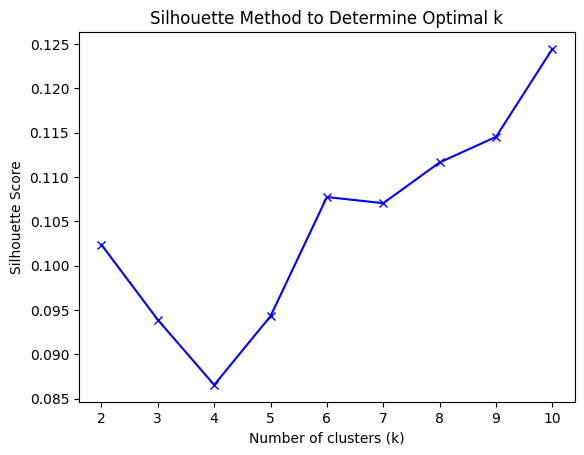

In [40]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)  # Silhouette is undefined for k=1
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# Plot
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method to Determine Optimal k')
plt.show()


##### Results

The Silhouette Score peaks at $k=3$, it maximizes cluster cohesion and separation.
After that the score declines sharply and continues to decrease, indicating that the clustering quality worsens with more clusters

### 3. Elbow Method (SSD/WCSS) vs. Silhouette Method

Plotting this two methods together we have a sort of trade-off between being compact (given by SSD) and being well separated (given by Silhoutte score), this allow us to overcome the limitation of both methods (Actually Silhoutte deal with compactness but in a less computer efficiency way). Also Silhoutte may prefer greater value of k due to slight improvements in separation, with the risk of losing interpretability


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

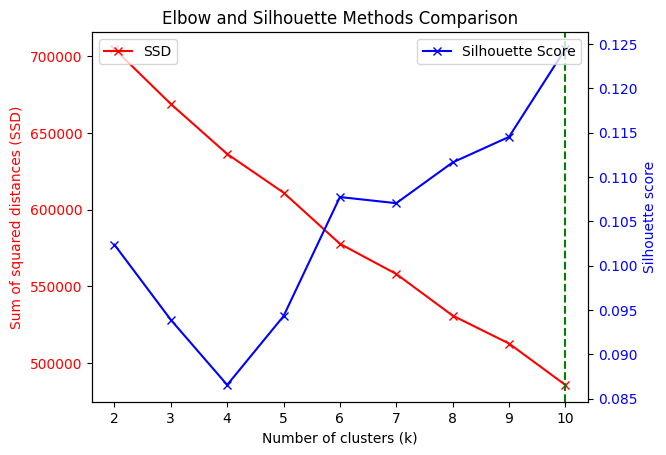

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

ssd = []
silhouette_scores = []
K = range(2, 11)  # start from 2 for silhouette

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    ssd.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Plot
fig, ax1 = plt.subplots()

# SSD (Elbow Method)
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Sum of squared distances (SSD)', color='red')
ax1.plot(K, ssd, 'rx-', label='SSD')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc="upper left")

# Silhouette Scores on a second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Silhouette score', color='blue')
ax2.plot(K, silhouette_scores, 'bx-', label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc="upper right")

# Highlight key points (optimality value of k)
optimal_k_silhouette = np.argmax(silhouette_scores) + 2  # Add 2 because range starts at 2
plt.axvline(x=optimal_k_silhouette, color='green', linestyle='--', label=f'Peak Silhouette (k={optimal_k_silhouette})')

plt.title('Elbow and Silhouette Methods Comparison')
plt.show()

### 4. Davies-Bouldin Index
- **Definition**: Measures the ratio of intra-cluster distances to inter-cluster separation.
- **Purpose**: Lower values indicate better clustering (compact and well-separated clusters).
- **Formula**: $
  DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \frac{s_i + s_j}{d_{i,j}}$
  where:
  - $s_i$: Average distance of points in cluster $i$ to their centroid.
  - $d_{i,j}$: Distance between centroids of clusters $i$ and $j$.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

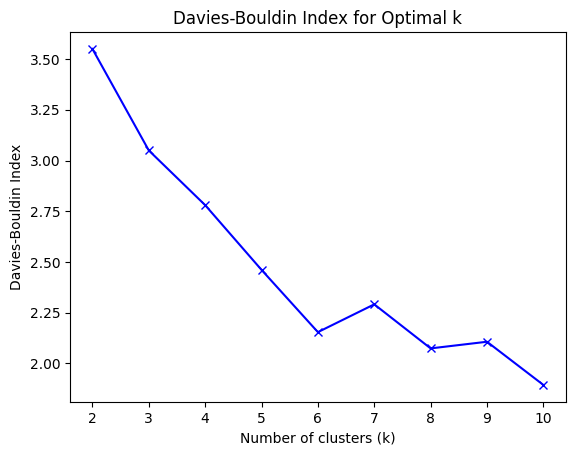

Optimal number of clusters based on Davies-Bouldin Index: 10


In [42]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index for different k
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_features)
    labels = kmeans.labels_
    db_scores.append(davies_bouldin_score(scaled_features, labels))

# Plot
plt.plot(range(2, 11), db_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal k')
plt.show()

optimal_k_db = np.argmin(db_scores) + 2
print(f"Optimal number of clusters based on Davies-Bouldin Index: {optimal_k_db}")


##### Results
Lower values indicate better clustering, as compact and well-separated clusters are ideal. The Davies-Bouldin Index reaches its lowest value at $k=3$.
The index increases for $k=4$ and beyond, meaning that clusters are less compact or less separated as the number of clusters increases

### 5. Dunn Index
- **Definition**: Measures the ratio of the minimum inter-cluster distance (separation) to the maximum intra-cluster distance (compactness).
- **Purpose**: Higher values indicate better clustering.
- **Formula**: $
  D = \frac{\min_{i \neq j} d(C_i, C_j)}{\max_k \delta(C_k)}$
  where:
  - $d(C_i, C_j)$: Distance between clusters $i$ and $j$.
  - $\delta(C_k)$: Maximum intra-cluster distance within cluster $k$.
- **Limitation**: Sensitive to noise and outliers.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

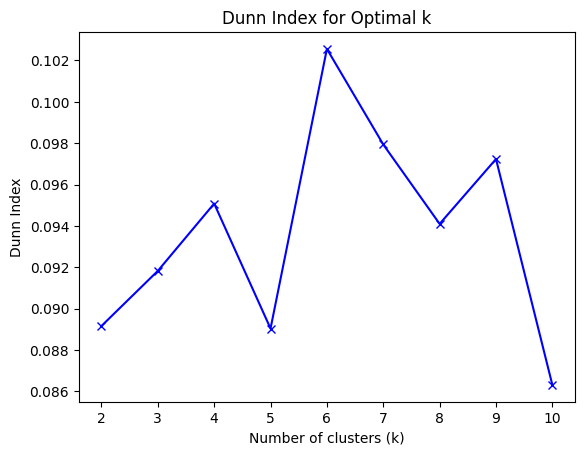

Optimal number of clusters based on Dunn Index: 6


In [43]:
from scipy.spatial.distance import cdist
import numpy as np

def dunn_index(data, labels):
    unique_labels = np.unique(labels)
    centroids = [data[labels == label].mean(axis=0) for label in unique_labels]

    # Compute inter-cluster distances
    inter_distances = cdist(centroids, centroids)
    np.fill_diagonal(inter_distances, np.inf)  # Exclude self-distances
    min_inter_distance = np.min(inter_distances)

    # Compute intra-cluster distances
    intra_distances = [np.max(cdist(data[labels == label], [centroid]))
                       for label, centroid in zip(unique_labels, centroids)]
    max_intra_distance = np.max(intra_distances)

    return min_inter_distance / max_intra_distance

# Compute Dunn Index
dunn_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_features)
    labels = kmeans.labels_
    dunn_scores.append(dunn_index(scaled_features, labels))

# Plot
plt.plot(range(2, 11), dunn_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Dunn Index')
plt.title('Dunn Index for Optimal k')
plt.show()

optimal_k_dunn = np.argmax(dunn_scores) + 2
print(f"Optimal number of clusters based on Dunn Index: {optimal_k_dunn}")


##### Results
Here Higher values indicate better separation between clusters and compact clusters. After $k=3$, the Dunn Index drops significantly and stays flat, showing that additional clusters result in worse separation and less compact clusters.

##### Overall Results

All the metric used led to the same results, we can claim with high confidence that the optimal value of k is 3

### K-means clustering algorithm using MapReduce




In [44]:
numerical_columns = [
    'Drama', 'Adventure', 'Comedy', 'Fantasy', 'Animation', 'Horror', 'Documentary',
    'War', 'Action', 'Film-Noir', 'Thriller', 'Mystery', 'Musical', 'IMAX', 'Romance',
    'Western', 'Sci-Fi', 'year', 'ratings_avg', 'ratings_med', 'num_ratings', 'num_tags'
]

df_cl_numeric = temp[numerical_columns]

# We just need numerical columns, we couldn't use the tags since we had too many unique values, creating dummies in this case would have only confuse our model.


In [109]:
import numpy as np


def initialize_centroids(data, k, method="random"):
    """
    Initialize centroids using the chosen method.
    Parameters:
        - data: NumPy array of data points.
        - k: Number of clusters.
        - method: "random" for basic initialization or "kmeans++" for K-me ()ans++ initialization.
    """
    if method == "random":
        # Randomly select k unique indices
        indices = np.random.choice(data.shape[0], k, replace=False)
        return data[indices]

    elif method == "kmeans++":
        # K-means++ initialization
        centroids = [data[np.random.choice(data.shape[0])]]  # First centroid randomly chosen
        for _ in range(1, k):
            # Compute distances from nearest centroid for all points
            distances = np.min([np.linalg.norm(data - centroid, axis=1) for centroid in centroids], axis=0)
            # Compute probabilities proportional to squared distances
            probabilities = distances ** 2 / np.sum(distances ** 2)
            # Choose next centroid based on probabilities
            next_centroid_index = np.random.choice(data.shape[0], p=probabilities)
            centroids.append(data[next_centroid_index])
        return np.array(centroids)

    else:
        raise ValueError("Invalid method. Choose 'random' or 'kmeans++'.")

def compute_distance(point, centroids):
    """Compute the distance of a point to all centroids and return the nearest one."""
    distances = np.linalg.norm(centroids - point, axis=1)
    return np.argmin(distances)  # Return the index of the closest centroid

def assign_clusters(data, centroids):
    """Assign each point to the nearest centroid."""
    clusters = []
    for point in data:
        cluster_id = compute_distance(point, centroids)
        clusters.append(cluster_id)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    """Update centroids as the mean of points in each cluster."""
    new_centroids = []
    for cluster_id in range(k):
        cluster_points = data[clusters == cluster_id]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:  # Handle empty cluster
            new_centroids.append(np.zeros(data.shape[1]))
    return np.array(new_centroids)

def kmeans(data, k, method="random", max_iterations=100, tolerance=1e-4):
    """
    K-means clustering algorithm with option for basic or K-means++ initialization.
    Parameters:
        - data: NumPy array of data points.
        - k: Number of clusters.
        - method: "random" for basic K-means or "kmeans++" for K-means++.
        - max_iterations: Maximum number of iterations.
        - tolerance: Convergence tolerance.
    """
    # Initialize centroids
    centroids = initialize_centroids(data, k, method=method)

    for iteration in range(max_iterations):
        # Assign clusters
        clusters = assign_clusters(data, centroids)

        # Update centroids
        new_centroids = update_centroids(data, clusters, k)

        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            print(f"Converged at iteration {iteration}")
            break

        centroids = new_centroids

    return centroids, clusters


In [110]:
# Example Usage
if __name__ == "__main__":

    # Convert to NumPy array for easier computation
    data = df_cl_numeric.to_numpy()

    print("Running K-means with Random Initialization:")
    centroids_random, clusters_random = kmeans(data, k=3, method="random")



Running K-means with Random Initialization:
Converged at iteration 19


In [111]:
unique, counts = np.unique(clusters_random, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} points")


Cluster Sizes:
Cluster 0: 173 points
Cluster 1: 951 points
Cluster 2: 25620 points


##### Let's get deeper insight regarding our cluster analysis

In [112]:
df_cl_numeric['Cluster'] = clusters_random

cluster_averages = df_cl_numeric.groupby('Cluster').mean()

print("Cluster Feature Averages:")
cluster_averages

Cluster Feature Averages:


/tmp/ipykernel_1963/2374657452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl_numeric['Cluster'] = clusters_random


Drama  Adventure    Comedy   Fantasy  Animation    Horror  \
Cluster                                                                 
0        0.375723   0.329480  0.369942  0.138728   0.069364  0.046243   
1        0.470032   0.201893  0.383807  0.101998   0.059937  0.077813   
2        0.489852   0.079547  0.304567  0.049844   0.036924  0.097892   

         Documentary       War    Action  Film-Noir  ...   Musical      IMAX  \
Cluster                                              ...                       
0           0.000000  0.046243  0.364162   0.005780  ...  0.040462  0.023121   
1           0.006309  0.048370  0.278654   0.015773  ...  0.043113  0.022082   
2           0.093091  0.043677  0.122482   0.011944  ...  0.037783  0.006635   

          Romance   Western    Sci-Fi         year  ratings_avg  ratings_med  \
Cluster                                                                        
0        0.196532  0.011561  0.202312  1991.641618     3.770430     3.864162   
1        0.193481  0.025237  0.161935  1991.386961     3.495968     3.588065   
2        0.148751  0.024590  0.059758  1989.527127     3.115431     3.175625   

          num_ratings   num_tags  
Cluster                           
0        29815.913295  84.028902  
1         8696.362776  42.041009  
2          256.513232   5.662022  

[3 rows x 22 columns]

What holds more value btw are the centroids:

In [113]:
features = df_cl_numeric.columns
centroids_df = pd.DataFrame(centroids_random, columns=features)

print("Centroids for each cluster by features:")
centroids_df


Centroids for each cluster by features:


Drama  Adventure    Comedy   Fantasy  Animation    Horror  Documentary  \
0  0.375723   0.329480  0.369942  0.138728   0.069364  0.046243     0.000000   
1  0.470032   0.201893  0.383807  0.101998   0.059937  0.077813     0.006309   
2  0.489852   0.079547  0.304567  0.049844   0.036924  0.097892     0.093091   

        War    Action  Film-Noir  ...      IMAX   Romance   Western    Sci-Fi  \
0  0.046243  0.364162   0.005780  ...  0.023121  0.196532  0.011561  0.202312   
1  0.048370  0.278654   0.015773  ...  0.022082  0.193481  0.025237  0.161935   
2  0.043677  0.122482   0.011944  ...  0.006635  0.148751  0.024590  0.059758   

          year  ratings_avg  ratings_med   num_ratings   num_tags   Cluster  
0  1991.641618     3.770430     3.864162  29815.913295  84.028902  1.959538  
1  1991.386961     3.495968     3.588065   8696.362776  42.041009  0.972660  
2  1989.527127     3.115431     3.175625    256.513232   5.662022  0.000000  

[3 rows x 23 columns]


This info is really usefull to understand how each cluster works, to make it more clear we are gonna normalize into a fixed range so that for each feature if it has a high or low contribution to that cluster

In [114]:
centroid_df = pd.DataFrame(centroids_random, columns=df_cl_numeric.columns)

if 'Cluster' in centroid_df.columns:
    centroid_df = centroid_df.drop(columns=['Cluster']) # if not also cluster feature would have been normalized

# Normalize centroids
centroid_normalized = centroid_df.div(centroid_df.max(axis=0))
centroid_normalized['Cluster'] = centroid_df.index

print("Normalized Centroids:")
centroid_normalized


Normalized Centroids:


Drama  Adventure    Comedy   Fantasy  Animation    Horror  Documentary  \
0  0.767013   1.000000  0.963877  1.000000   1.000000  0.472384     0.000000   
1  0.959539   0.612762  1.000000  0.735235   0.864090  0.794882     0.067774   
2  1.000000   0.241433  0.793542  0.359291   0.532325  1.000000     1.000000   

        War    Action  Film-Noir  ...      IMAX   Romance   Western    Sci-Fi  \
0  0.956019  1.000000   0.366474  ...  1.000000  1.000000  0.458092  1.000000   
1  1.000000  0.765193   1.000000  ...  0.955047  0.984475  1.000000  0.800421   
2  0.902971  0.336341   0.757237  ...  0.286983  0.756880  0.974385  0.295375   

       year  ratings_avg  ratings_med  num_ratings  num_tags  Cluster  
0  1.000000     1.000000     1.000000     1.000000  1.000000        0  
1  0.999872     0.927207     0.928549     0.291669  0.500316        1  
2  0.998938     0.826280     0.821815     0.008603  0.067382        2  

[3 rows x 23 columns]

For a more intuitive comparison I decided to use the Spider Chart, it allow us to visualizes the shape of clusters in terms of their features.

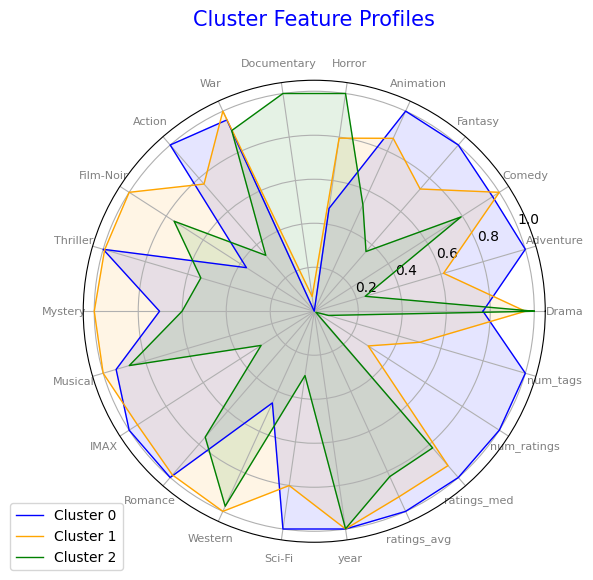

In [115]:
from math import pi
import matplotlib.pyplot as plt

categories = centroid_normalized.columns[:-1]  # Exclude Cluster
num_categories = len(categories)

# Initialization
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)

angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
angles += angles[:1]  # Close the circle

# Plot each cluster
colors = ['blue', 'orange', 'green']  
for idx, cluster in enumerate(centroid_normalized['Cluster']):
    values = centroid_normalized[centroid_normalized['Cluster'] == cluster].iloc[0, :-1].tolist()
    values += values[:1]  # Repeat the first value to close the circle

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(cluster)}', color=colors[idx])
    ax.fill(angles, values, alpha=0.1, color=colors[idx])


plt.xticks(angles[:-1], categories, color='grey', size=8)


plt.title("Cluster Feature Profiles", size=15, color='blue', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()



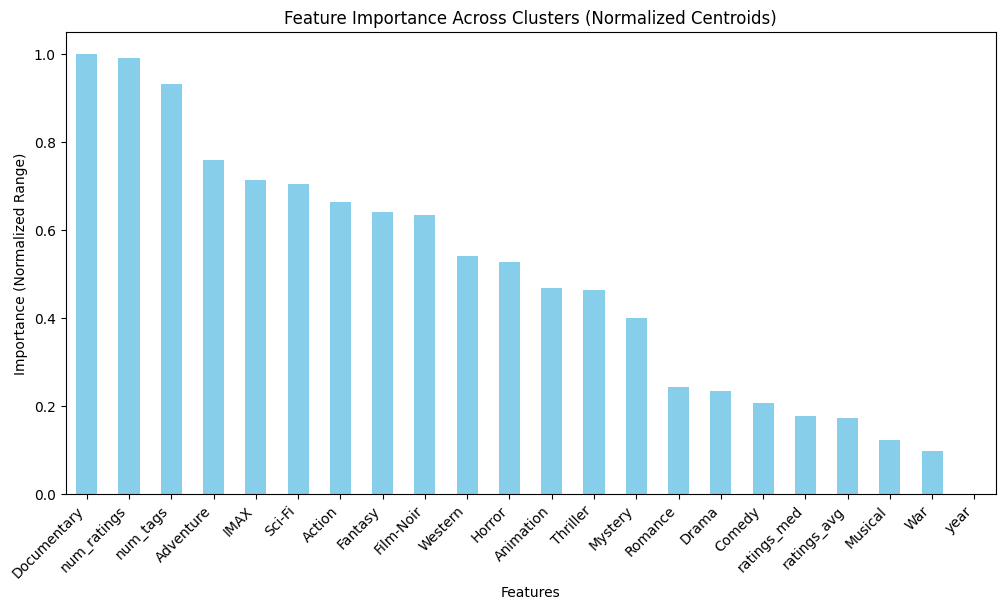

In [116]:
# Feature Importance
# range (max - min) across clusters for normalized centroids
feature_importance_normalized = centroid_normalized.max() - centroid_normalized.min()

feature_importance_normalized_sorted = feature_importance_normalized.sort_values(ascending=False)

if 'Cluster' in feature_importance_normalized_sorted.index:
    feature_importance_normalized_sorted = feature_importance_normalized_sorted.drop('Cluster')

# Plot
plt.figure(figsize=(12, 6))
feature_importance_normalized_sorted.plot(kind='bar', color='skyblue')
plt.title("Feature Importance Across Clusters (Normalized Centroids)")
plt.ylabel("Importance (Normalized Range)")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.show()


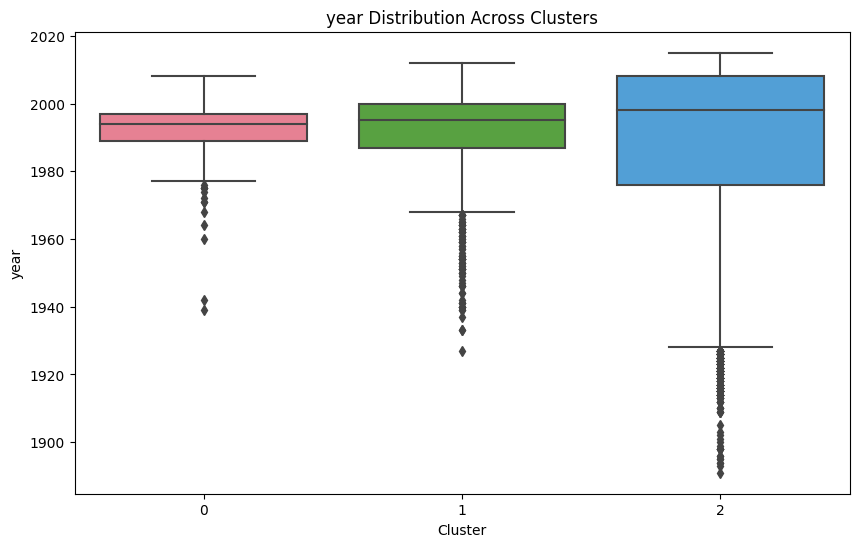

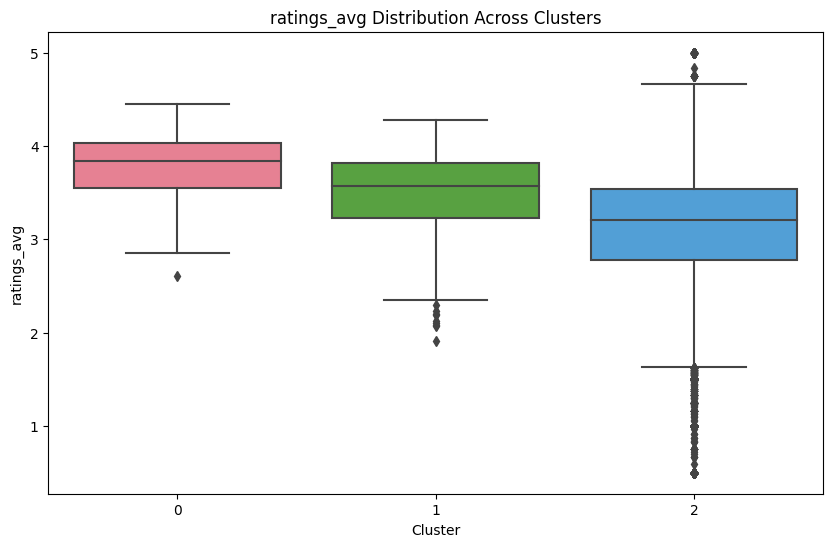

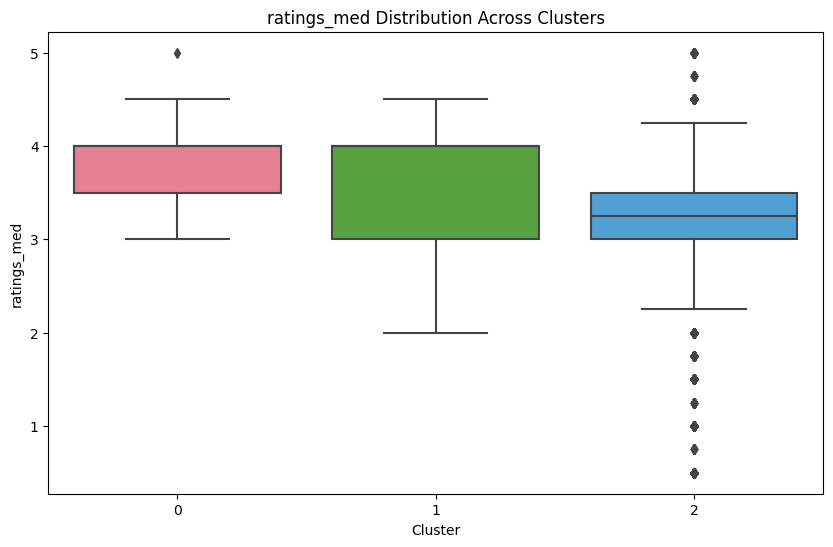

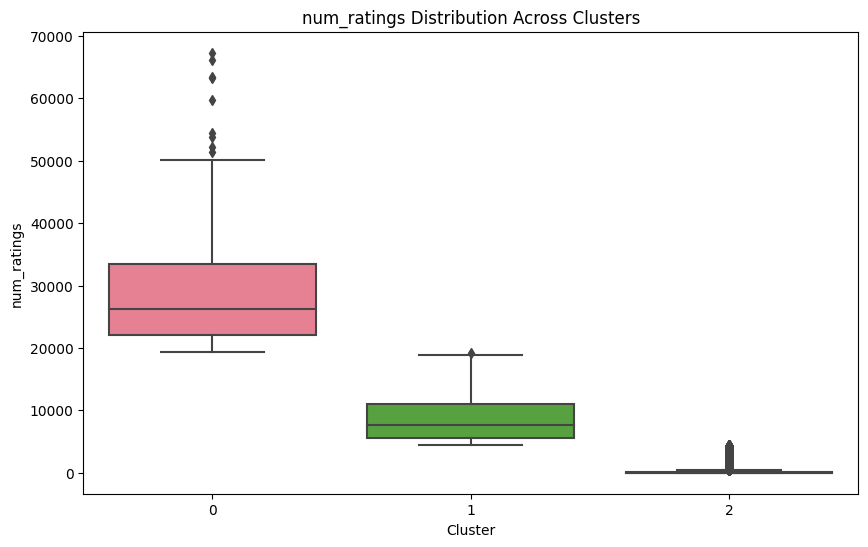

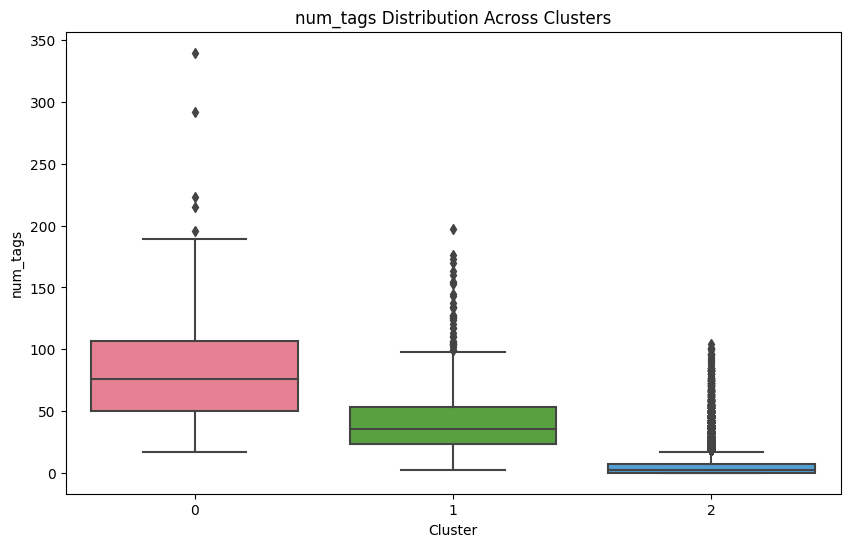

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add cluster assignments safely to deal with this warnign:
"""
SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl_numeric['Cluster'] = clusters
"""
df_cl_numeric = df_cl_numeric.copy()
df_cl_numeric['Cluster'] = clusters_random

# num columns
selected_columns = ['year', 'ratings_avg', 'ratings_med', 'num_ratings', 'num_tags']

cluster_palette = sns.color_palette("husl", n_colors=len(np.unique(clusters_random)))

# Plot Boxplots
for column in selected_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='Cluster', y=column, data=df_cl_numeric, palette=cluster_palette
    )
    plt.title(f'{column} Distribution Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()



It confirms what was told earlier on Feature Importance Analysis:
- *num_rating* and *num_tags* are the feature who matter the most, where cluster 2 hold the greatest value.
- *rating_avg* and *rating_median* show a little bit of importance
- *year* feature is not relevant

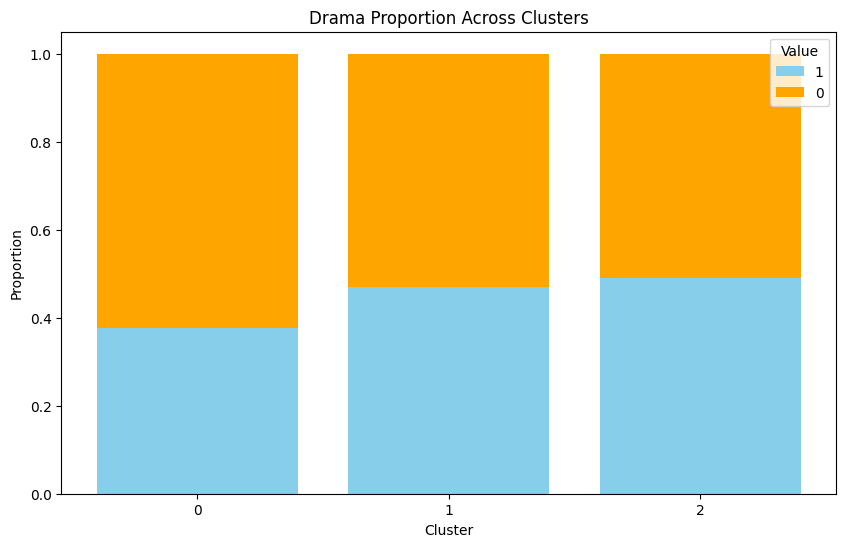

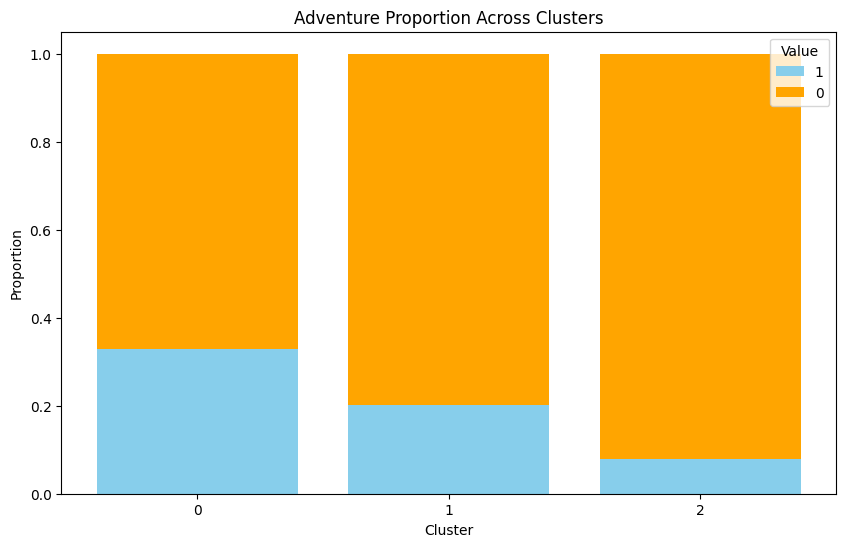

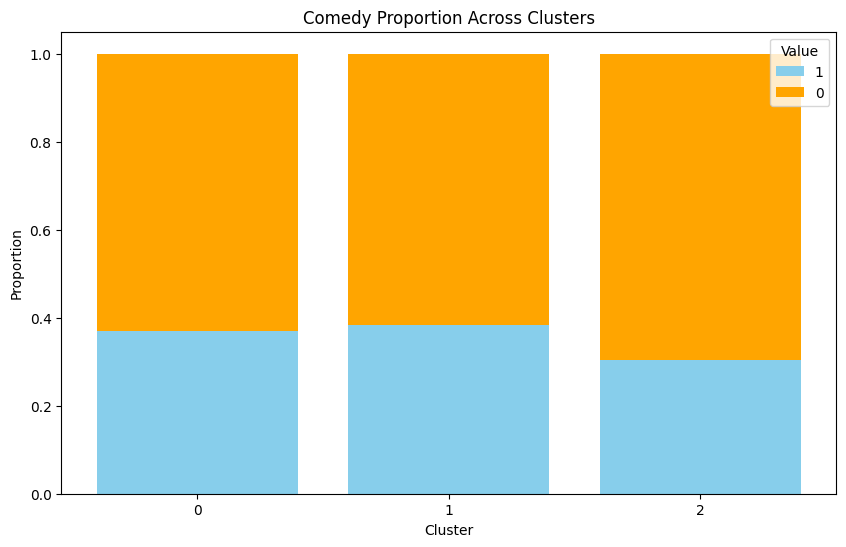

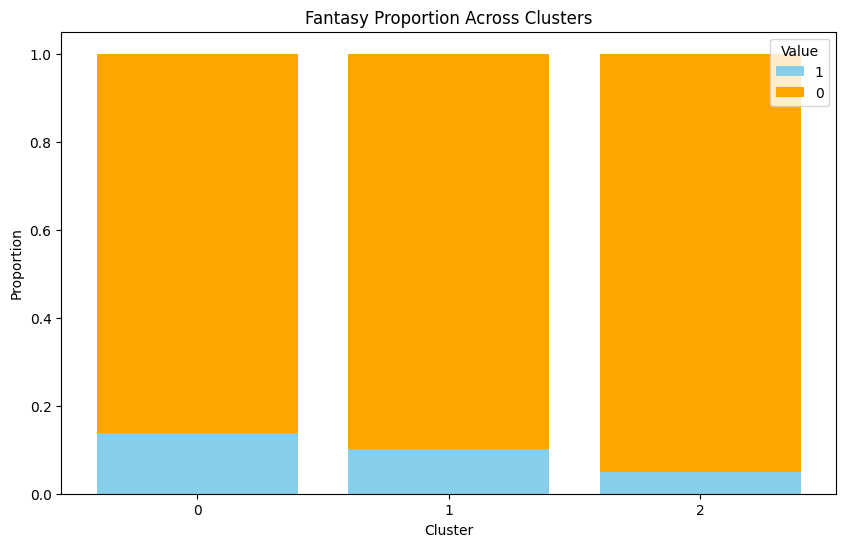

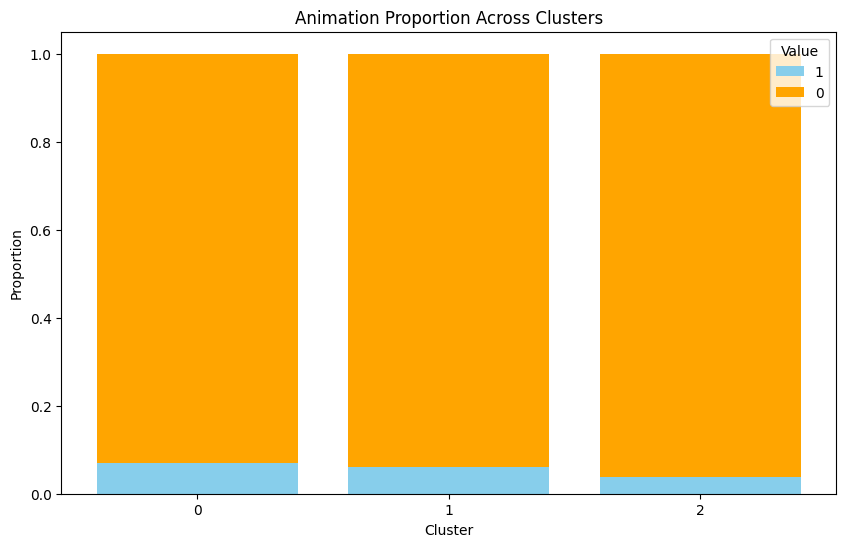

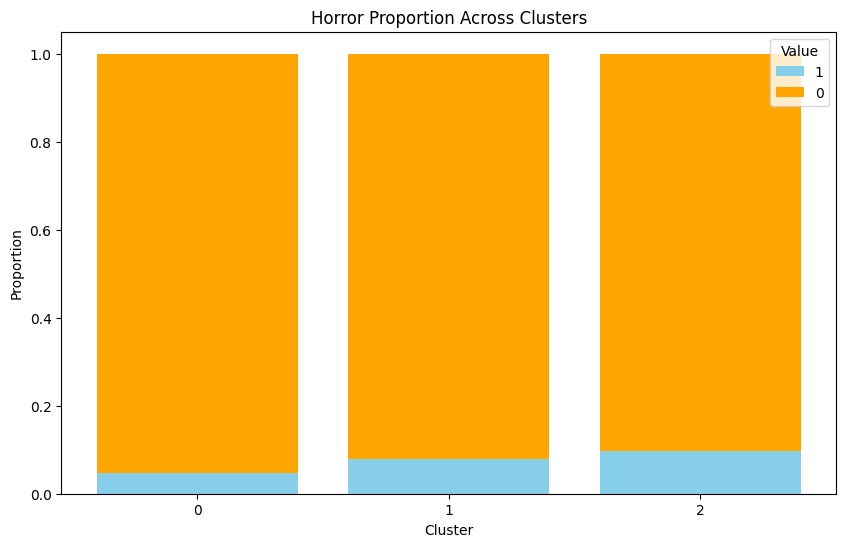

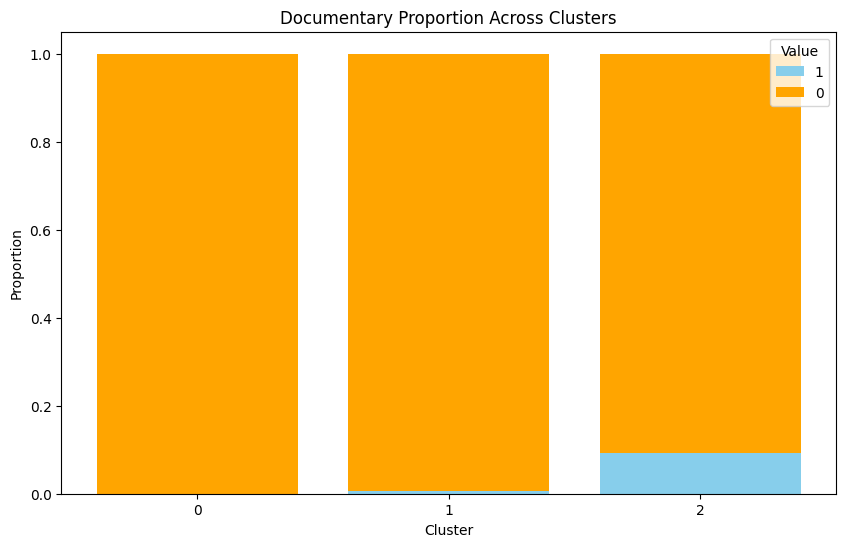

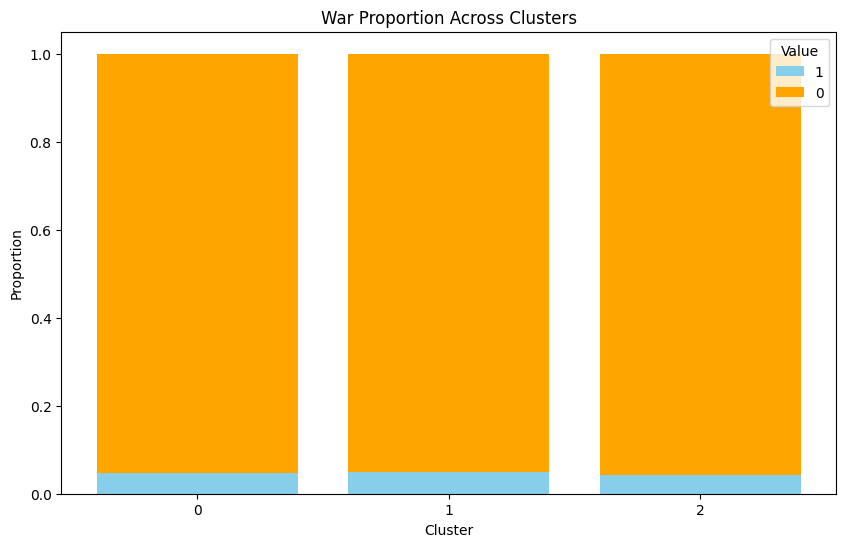

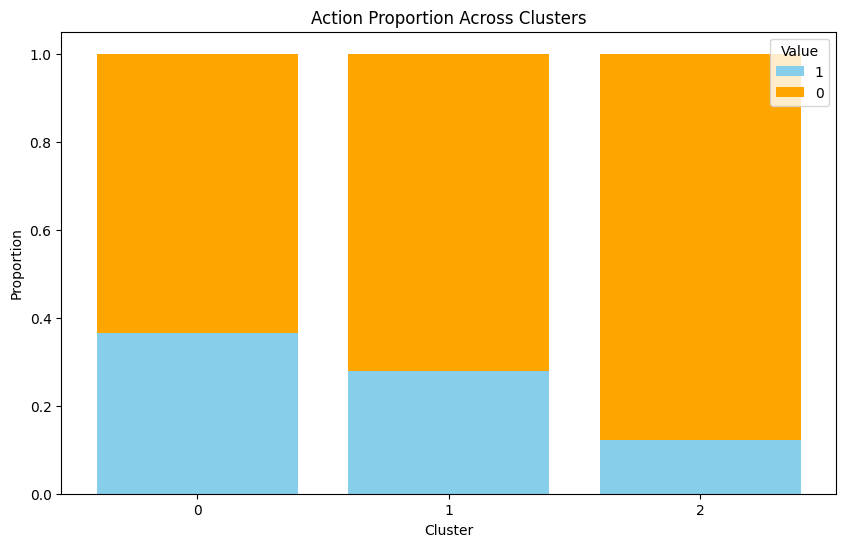

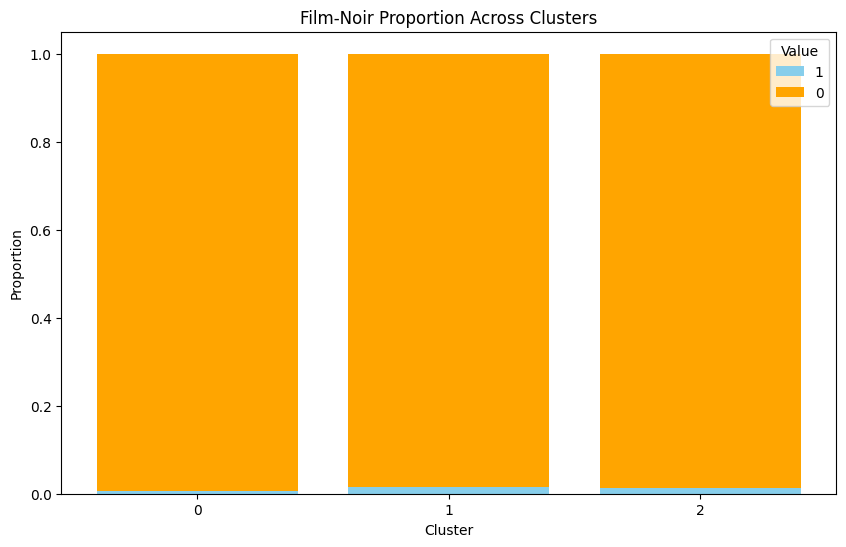

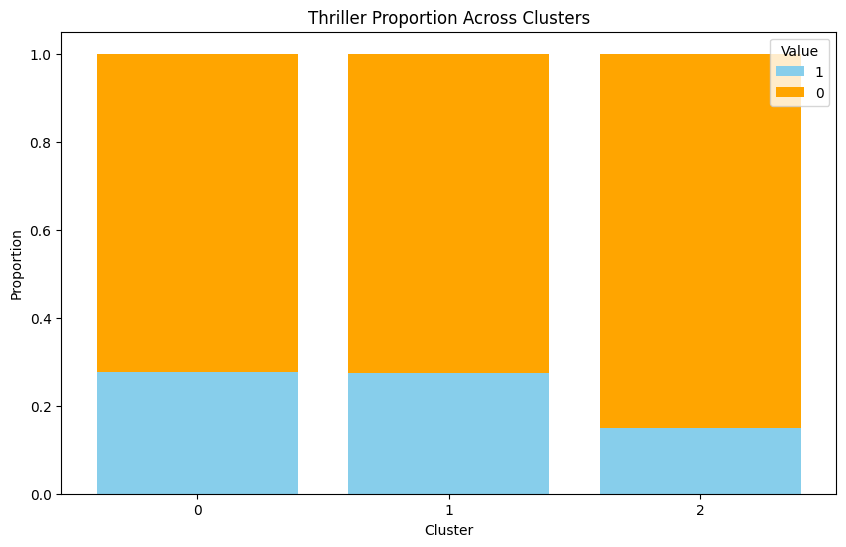

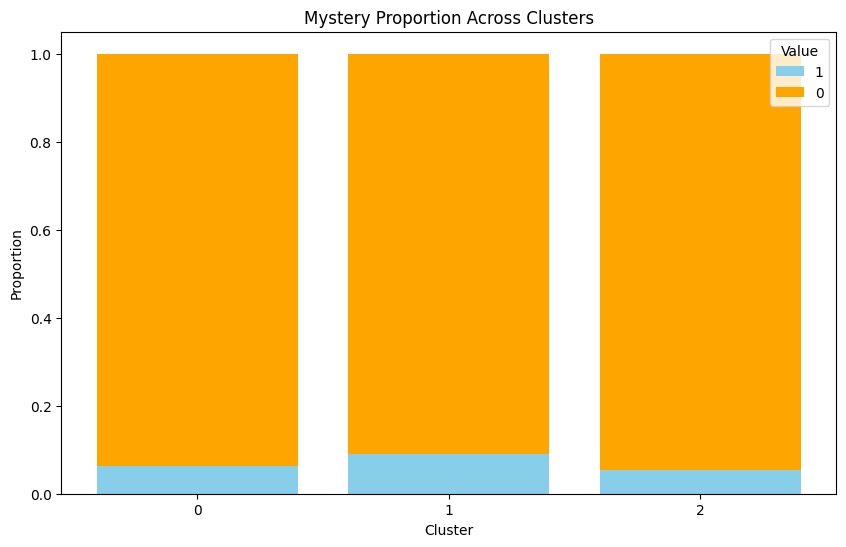

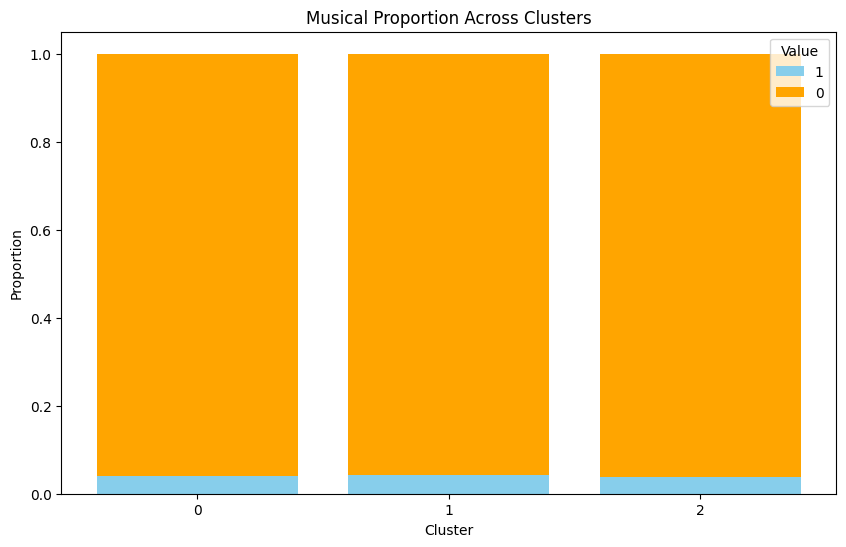

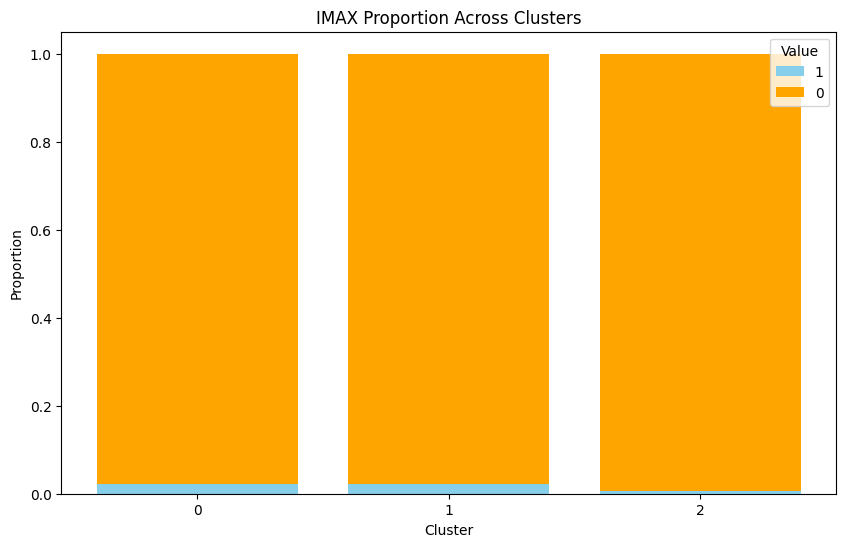

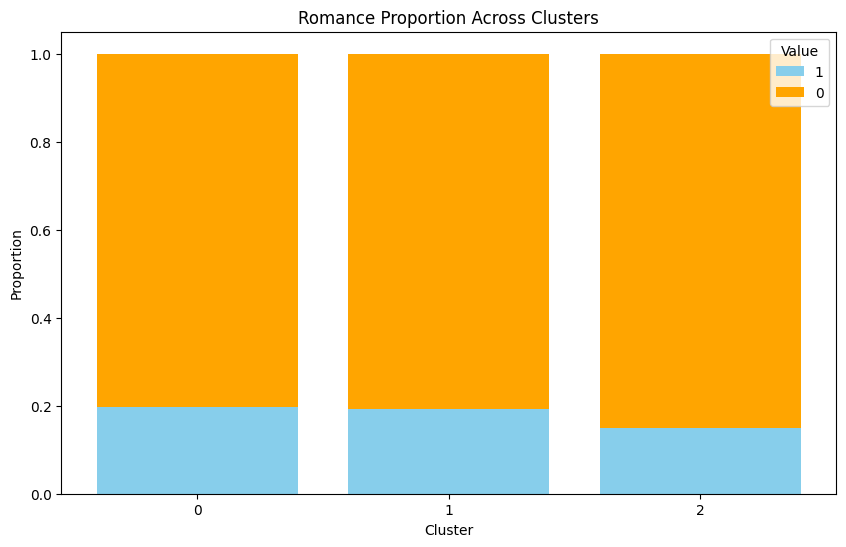

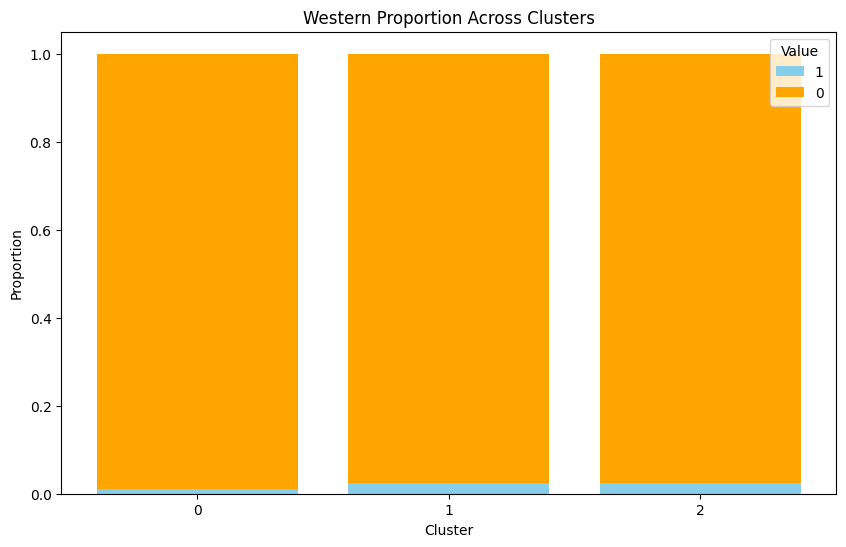

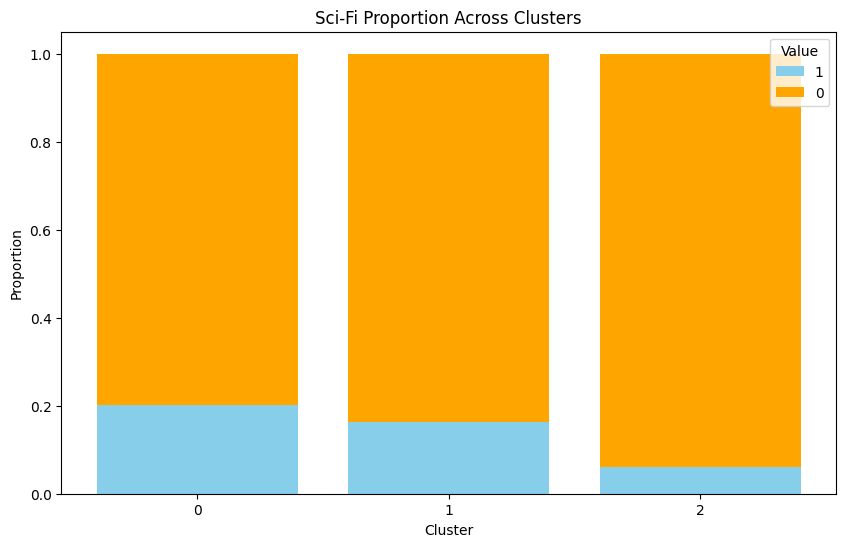

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select dummies
dummy_columns = [col for col in df_cl_numeric.columns if col not in ['year', 'ratings_avg', 'ratings_med', 'num_ratings', 'num_tags', 'Cluster']]

# Pproportions
dummy_summary = df_cl_numeric.groupby('Cluster')[dummy_columns].mean()

# Plot stacked bar charts
for column in dummy_columns:
    plt.figure(figsize=(10, 6))
    proportions = dummy_summary[column]
    plt.bar(dummy_summary.index, proportions, label='1', color='skyblue')
    plt.bar(dummy_summary.index, 1 - proportions, bottom=proportions, label='0', color='orange')
    plt.title(f"{column} Proportion Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel("Proportion")
    plt.legend(title="Value")
    plt.xticks(dummy_summary.index)
    plt.show()


Dummies instead show their low relevance on the cluster choice

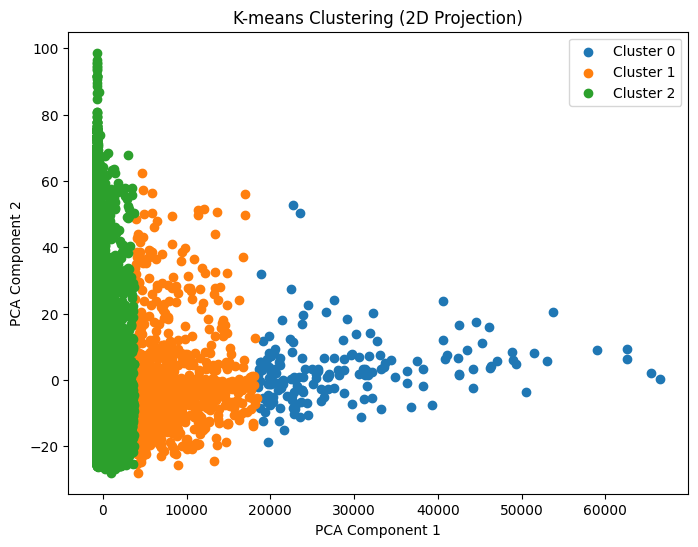

In [119]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2) #2 dimensions
data_2d = pca.fit_transform(df_cl_numeric)

# Scatter plot
plt.figure(figsize=(8, 6))
for cluster_id in unique:
    plt.scatter(data_2d[clusters_random == cluster_id, 0], data_2d[clusters_random == cluster_id, 1], label=f"Cluster {cluster_id}")
plt.title("K-means Clustering (2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


In the PCA plot, clusters overlap, especially between Clusters 1 and 2, suggesting that PCA struggles to separate clusters well in this case.

PCA may not be ideal here since the relationships in the dataset may be non-linear.



In [121]:
# Explained variance ratio from PCA
pca = PCA(n_components=2)
pca.fit(df_cl_numeric)
explained_variance = pca.explained_variance_ratio_

print("\nExplained Variance by PCA Components:")
print(explained_variance)
print(f"Total Variance Explained: {np.sum(explained_variance):.2f}")



Explained Variance by PCA Components:
[9.99932187e-01 5.62142023e-05]
Total Variance Explained: 1.00


The first principal component captures almost 100% of the variance in the data,
 this means most of the variability can be represented by a single dimension.

The second principal component explains almost no variance (just 0.006%), it does not contribute much new information about the variability in the data.

The total variance explained is 100%, meaning that the two components together fully represent the original data's variance.



##### UMAP for non-linear relationship

I would have loved to use Kernel PCA operation with the RBF kernel to capture non linear relationship, but the algorithm was computational expensive and memory intensive. RBF kernel computes a pairwise similarity matrix of size
$n * n$ , since our number of sample is quite large it consume excessive RAM that Colab could allocate so everytime I tried to run the code the session died.

I tried to use:
- incremental Kernel, that processes the data in chunks
- approximation Kernel with Nystroem method
- Downsampling the data (I was scared to lose too much information)


UMAP instead was computer efficient and allowed me to perform the task in under a min. Its parameters can also be tuned, changing the number of Neighbours, the min_dist between points or the metric used.

In [50]:
#!pip install umap-learn

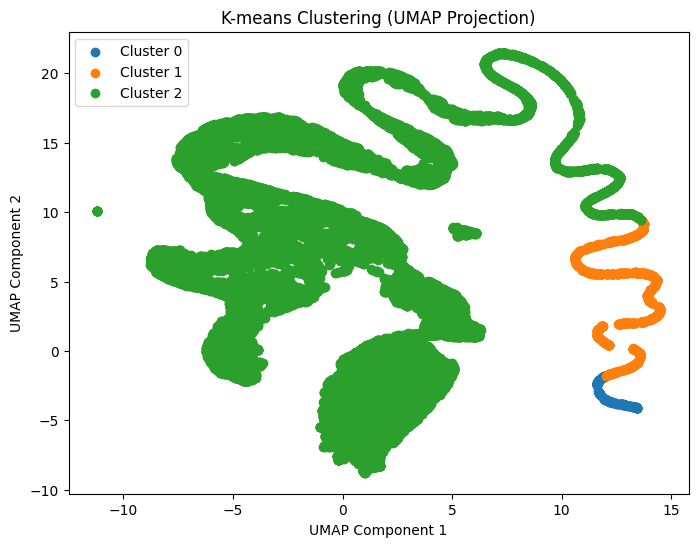

In [122]:
import umap

# Reduce data to 2D using UMAP
umap_reducer = umap.UMAP(n_components=2)
data_2d_umap = umap_reducer.fit_transform(df_cl_numeric)

# Plot clusters
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(clusters_random):
    plt.scatter(
        data_2d_umap[clusters_random == cluster_id, 0],  # UMAP Component 1
        data_2d_umap[clusters_random == cluster_id, 1],  # UMAP Component 2
        label=f"Cluster {cluster_id}"
    )
plt.title("K-means Clustering (UMAP Projection)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend()
plt.show()



In [123]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette = silhouette_score(df_cl_numeric, clusters_random)
print(f"Silhouette Score: {silhouette:.3f}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(df_cl_numeric, clusters_random)
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")


Silhouette Score: 0.921
Davies-Bouldin Index: 0.485


1. Silhouette Score measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).
A score close to 1 indicates:
- Points are close to their own cluster centroi (Well-defined) and Clusters are distinct and far from each other (Good separation).

2. Davies-Bouldin Index measures the ratio of intra-cluster distances (cohesion) to inter-cluster distances (separation).
Lower values indicate better clustering. Values below 1 are generally considered good.
- It shows:  Low overlap between clusters and compact clusters with minimal spread.


In [124]:
# Compute Intra-cluster Distances
intra_distances = []
for i, centroid in enumerate(centroids_random):
    intra_cluster_points = df_cl_numeric[clusters_random == i].to_numpy()  # Convert to NumPy for calculations
    distances = np.linalg.norm(intra_cluster_points - centroid, axis=1)
    intra_distances.append(np.mean(distances))
print("\nIntra-cluster Distances:")
print(intra_distances)

# Compute Inter-cluster Distances
from itertools import combinations

centroid_combinations = list(combinations(range(len(centroids_random)), 2))
inter_distances = [
    np.linalg.norm(centroids_random[i] - centroids_random[j]) for i, j in centroid_combinations
]
print("\nInter-cluster Distances:")
print(inter_distances)



Intra-cluster Distances:
[8143.05852060316, 3002.8682552295013, 360.43019830188194]

Inter-cluster Distances:
[21119.59228598482, 29559.504103779273, 8439.92823229354]


1. **Intra-Cluster Distance**  is the average distance between points within a cluster and their respective centroid.
It measures how compact or tight the clusters are. Smaller values indicate more compact clusters.

Interpretation:

 - Cluster 2 is the most compact, meaning the points in this cluster are close to the centroid and likely form a tight group.
 - Cluster 0 has the largest intra-cluster distance, meaning the points are more spread out and less tightly packed.

The large variance between the clusters' intra-cluster distances indicates that some clusters may be more defined or cohesive than others.
2. **Inter-Cluster Distance** is the Euclidean distance between the centroids of two clusters.
It measures how far apart the clusters are from each other. Larger values indicate better separation between clusters.

Results:

- Distance between Clusters 0 and 1: 21119.59
- Distance between Clusters 0 and 2: 29559.30
- Distance between Clusters 1 and 2: 8439.72

Interpretation:

- Clusters 0 and 2 are the most separated, indicating that they are likely very distinct in terms of feature space.
- Clusters 1 and 2 are the closest to each other, meaning they might share some overlap or have similar characteristics.

The relatively large inter-cluster distances suggest that the clusters are well-separated overall.

### K-means ++ clustering algorithm using MapReduce

In [125]:
# Example Usage
if __name__ == "__main__":

    data = df_cl_numeric.to_numpy()

    print("\nRunning K-means with K-means++ Initialization:")
    centroids_kmeanspp, clusters_kmeanspp = kmeans(data, k=3, method="kmeans++")




Running K-means with K-means++ Initialization:
Converged at iteration 25


We notice faster convergence (9 vs 19) cause we avoid poor starting point

We are just gonna copy and paste the previous analysis changing the variables and check for any differencies

In [126]:
unique, counts = np.unique(clusters_kmeanspp, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} points")

Cluster Sizes:
Cluster 0: 25646 points
Cluster 1: 932 points
Cluster 2: 166 points


In [53]:
df_cl_numeric['Cluster'] = clusters_kmeanspp

cluster_averages = df_cl_numeric.groupby('Cluster').mean()

print("Cluster Feature Averages:")
cluster_averages

Cluster Feature Averages:


/tmp/ipykernel_1963/657902309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl_numeric['Cluster'] = clusters_kmeanspp


Drama  Adventure    Comedy   Fantasy  Animation    Horror  \
Cluster                                                                 
0        0.489745   0.079623  0.304765  0.049832   0.037043  0.097871   
1        0.472103   0.204936  0.381974  0.104077   0.056867  0.077253   
2        0.373494   0.325301  0.361446  0.138554   0.072289  0.048193   

         Documentary       War    Action  Film-Noir  ...   Musical      IMAX  \
Cluster                                              ...                       
0           0.092997  0.043633  0.122553   0.011932  ...  0.037823  0.006629   
1           0.006438  0.049356  0.280043   0.016094  ...  0.041845  0.022532   
2           0.000000  0.048193  0.373494   0.006024  ...  0.042169  0.024096   

          Romance   Western    Sci-Fi         year  ratings_avg  ratings_med  \
Cluster                                                                        
0        0.148678  0.024565  0.059775  1989.530102     3.115604     3.175875   
1        0.197425  0.025751  0.165236  1991.372318     3.503218     3.595225   
2        0.192771  0.012048  0.198795  1991.566265     3.774150     3.861446   

          num_ratings   num_tags  
Cluster                           
0          260.844342   5.676636  
1         8893.130901  42.723176  
2        30254.524096  85.409639  

[3 rows x 22 columns]

In [54]:
features = df_cl_numeric.columns
centroids_df = pd.DataFrame(centroids_kmeanspp, columns=features)

print("Centroids for each cluster by features:")
centroids_df

Centroids for each cluster by features:


Drama  Adventure    Comedy   Fantasy  Animation    Horror  Documentary  \
0  0.489745   0.079623  0.304765  0.049832   0.037043  0.097871     0.092997   
1  0.472103   0.204936  0.381974  0.104077   0.056867  0.077253     0.006438   
2  0.373494   0.325301  0.361446  0.138554   0.072289  0.048193     0.000000   

        War    Action  Film-Noir  ...      IMAX   Romance   Western    Sci-Fi  \
0  0.043633  0.122553   0.011932  ...  0.006629  0.148678  0.024565  0.059775   
1  0.049356  0.280043   0.016094  ...  0.022532  0.197425  0.025751  0.165236   
2  0.048193  0.373494   0.006024  ...  0.024096  0.192771  0.012048  0.198795   

          year  ratings_avg  ratings_med   num_ratings   num_tags   Cluster  
0  1989.530102     3.115604     3.175875    260.844342   5.676636  1.997972  
1  1991.372318     3.503218     3.595225   8893.130901  42.723176  0.007511  
2  1991.566265     3.774150     3.861446  30254.524096  85.409639  1.000000  

[3 rows x 23 columns]

In [55]:
centroid_df = pd.DataFrame(centroids_kmeanspp, columns=df_cl_numeric.columns)

if 'Cluster' in centroid_df.columns:
    centroid_df = centroid_df.drop(columns=['Cluster']) # if not also cluster feature would have been normalized

# Normalize centroids
centroid_normalized = centroid_df.div(centroid_df.max(axis=0))
centroid_normalized['Cluster'] = centroid_df.index

print("Normalized Centroids:")
centroid_normalized

Normalized Centroids:


Drama  Adventure    Comedy   Fantasy  Animation    Horror  Documentary  \
0  1.000000   0.244766  0.797868  0.359659   0.512426  1.000000     1.000000   
1  0.963977   0.629987  1.000000  0.751166   0.786660  0.789337     0.069226   
2  0.762629   1.000000  0.946257  1.000000   1.000000  0.492411     0.000000   

        War    Action  Film-Noir  ...      IMAX   Romance   Western    Sci-Fi  \
0  0.884033  0.328126   0.741355  ...  0.275092  0.753087  0.953950  0.300688   
1  1.000000  0.749792   1.000000  ...  0.935086  1.000000  1.000000  0.831187   
2  0.976427  1.000000   0.374297  ...  1.000000  0.976427  0.467871  1.000000   

       year  ratings_avg  ratings_med  num_ratings  num_tags  Cluster  
0  0.998978     0.825512     0.822458     0.008622  0.066464        0  
1  0.999903     0.928214     0.931057     0.293944  0.500215        1  
2  1.000000     1.000000     1.000000     1.000000  1.000000        2  

[3 rows x 23 columns]

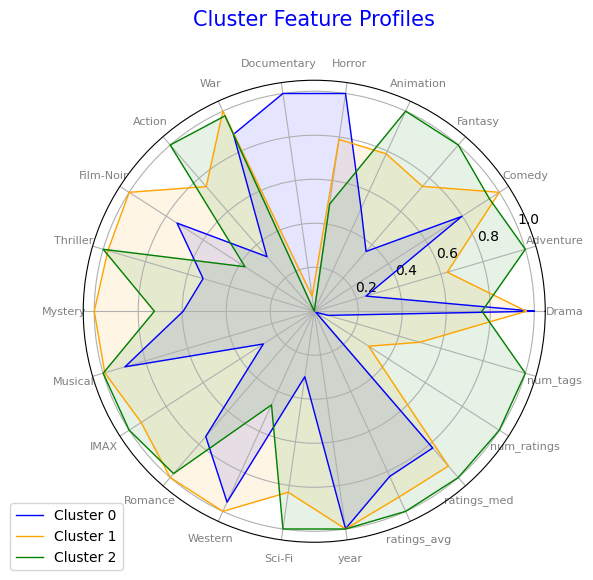

In [56]:
from math import pi
import matplotlib.pyplot as plt

categories = centroid_normalized.columns[:-1]  # Exclude Cluster
num_categories = len(categories)

# Initialization
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)

angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
angles += angles[:1]  # Close the circle

# Plot each cluster
colors = ['blue', 'orange', 'green']  
for idx, cluster in enumerate(centroid_normalized['Cluster']):
    values = centroid_normalized[centroid_normalized['Cluster'] == cluster].iloc[0, :-1].tolist()
    values += values[:1]  # Repeat the first value to close the circle

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(cluster)}', color=colors[idx])
    ax.fill(angles, values, alpha=0.1, color=colors[idx])


plt.xticks(angles[:-1], categories, color='grey', size=8)


plt.title("Cluster Feature Profiles", size=15, color='blue', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

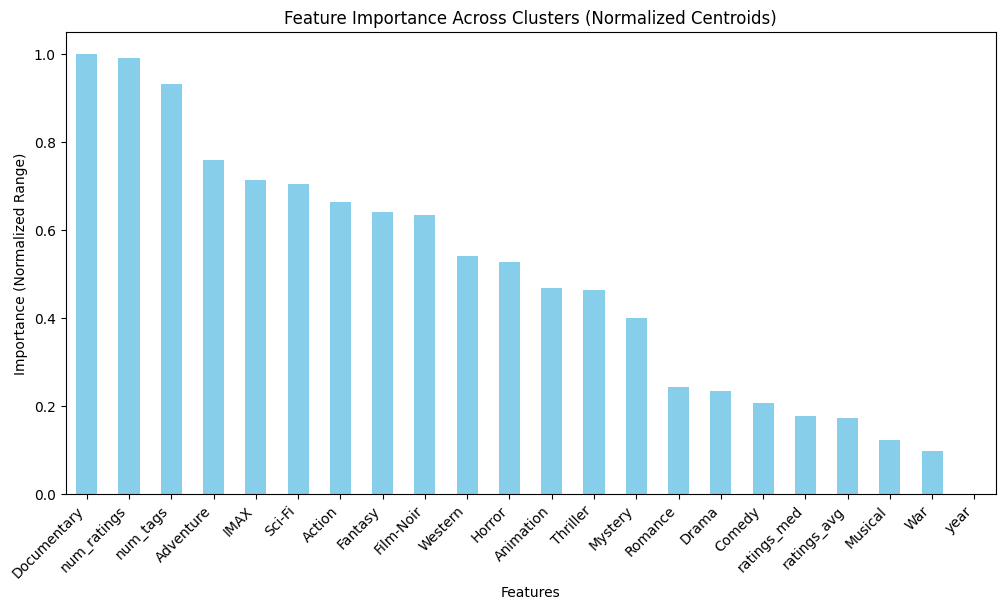

In [127]:
# Feature Importance
# range (max - min) across clusters for normalized centroids
feature_importance_normalized = centroid_normalized.max() - centroid_normalized.min()

feature_importance_normalized_sorted = feature_importance_normalized.sort_values(ascending=False)

if 'Cluster' in feature_importance_normalized_sorted.index:
    feature_importance_normalized_sorted = feature_importance_normalized_sorted.drop('Cluster')

# Plot
plt.figure(figsize=(12, 6))
feature_importance_normalized_sorted.plot(kind='bar', color='skyblue')
plt.title("Feature Importance Across Clusters (Normalized Centroids)")
plt.ylabel("Importance (Normalized Range)")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.show()

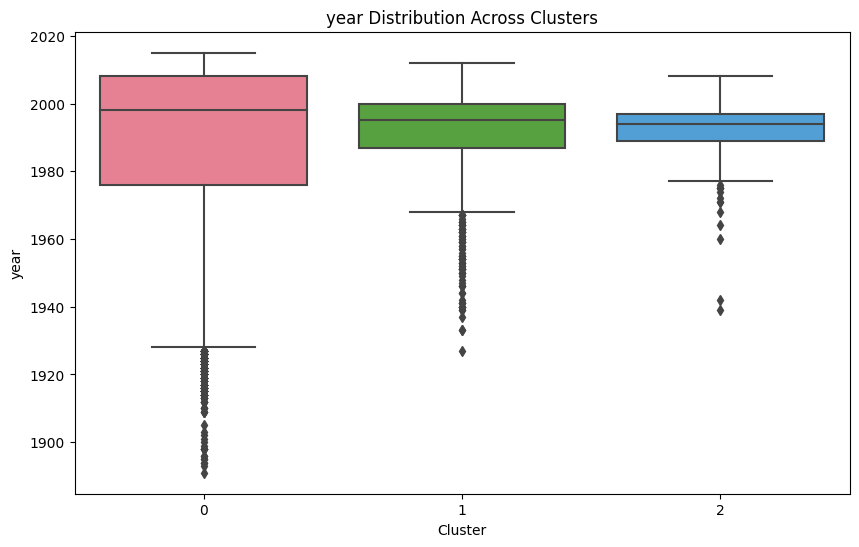

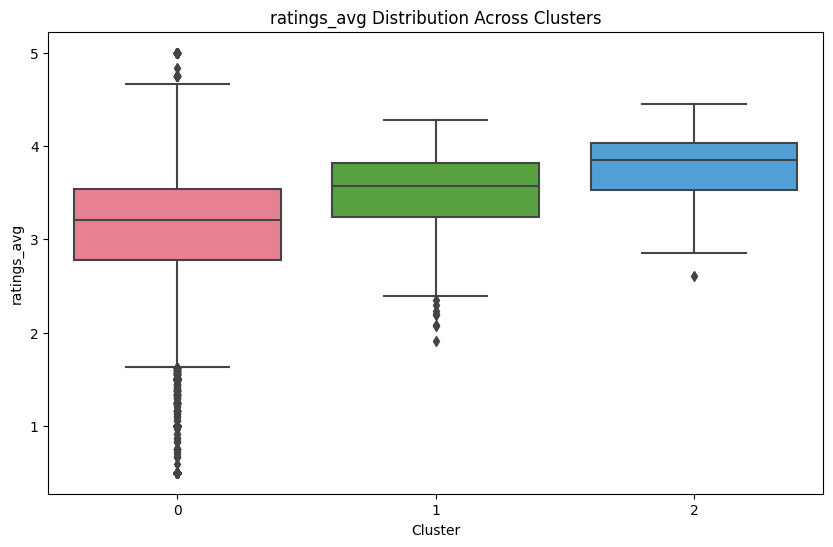

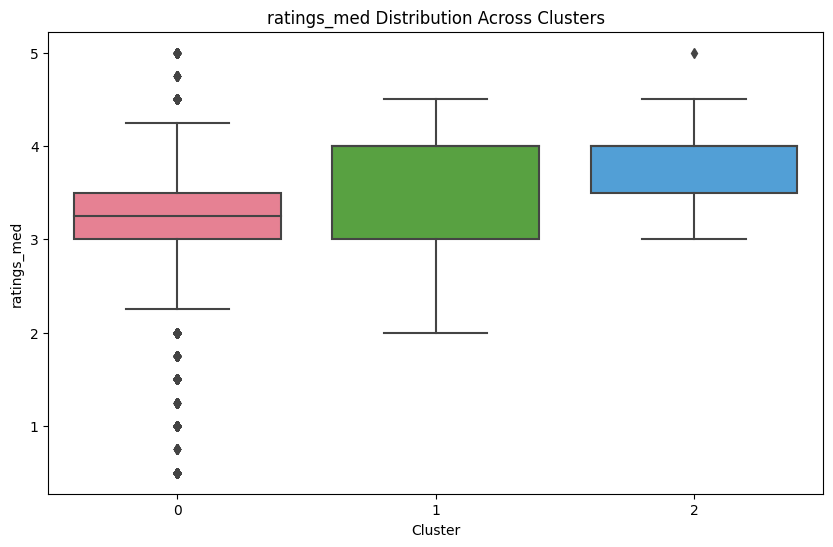

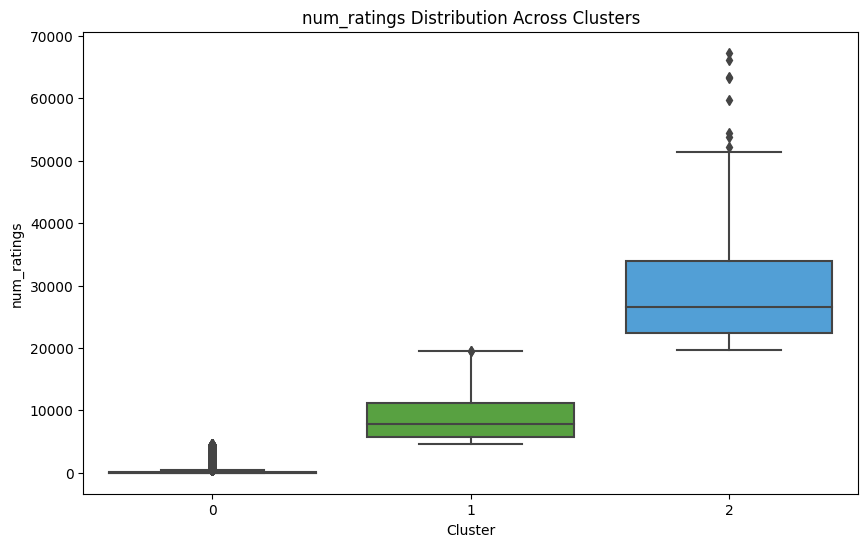

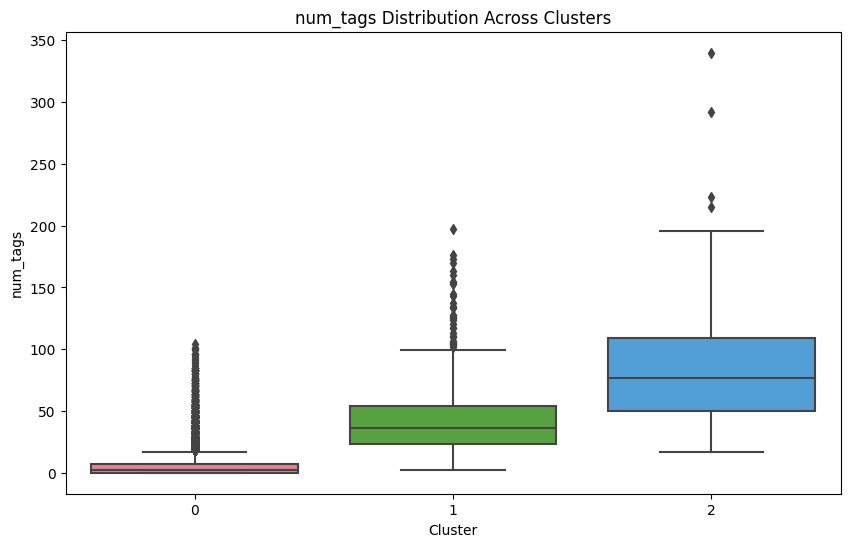

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add cluster assignments safely to deal with this warnign:
"""
SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl_numeric['Cluster'] = clusters
"""
df_cl_numeric = df_cl_numeric.copy()
df_cl_numeric['Cluster'] = clusters_kmeanspp

# num columns
selected_columns = ['year', 'ratings_avg', 'ratings_med', 'num_ratings', 'num_tags']

cluster_palette = sns.color_palette("husl", n_colors=len(np.unique(clusters_kmeanspp)))

# Plot Boxplots
for column in selected_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='Cluster', y=column, data=df_cl_numeric, palette=cluster_palette
    )
    plt.title(f'{column} Distribution Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

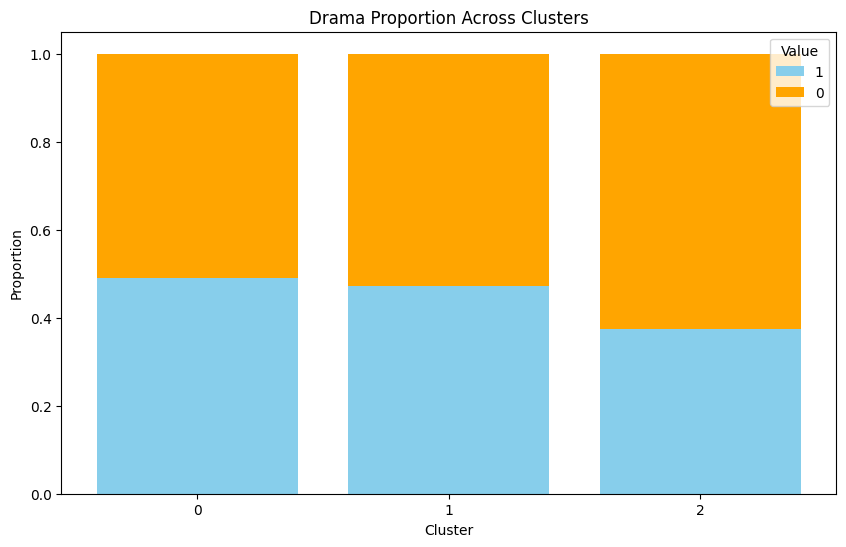

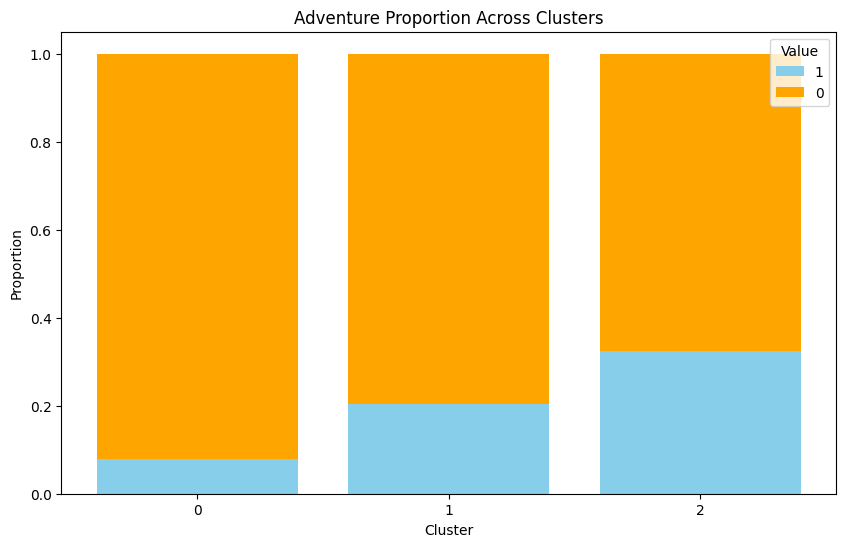

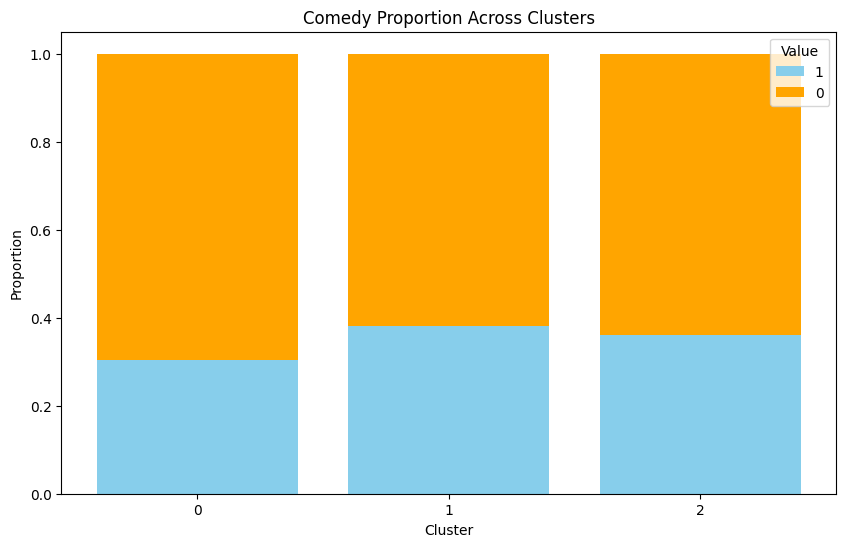

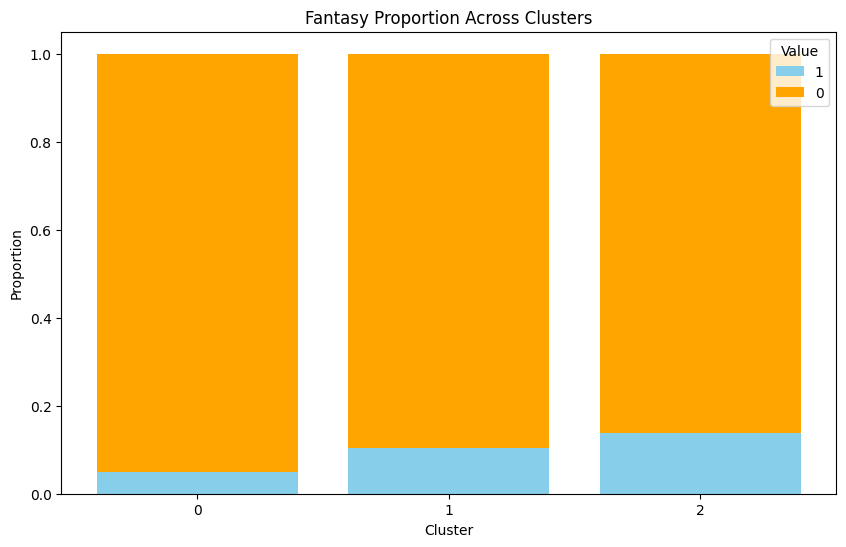

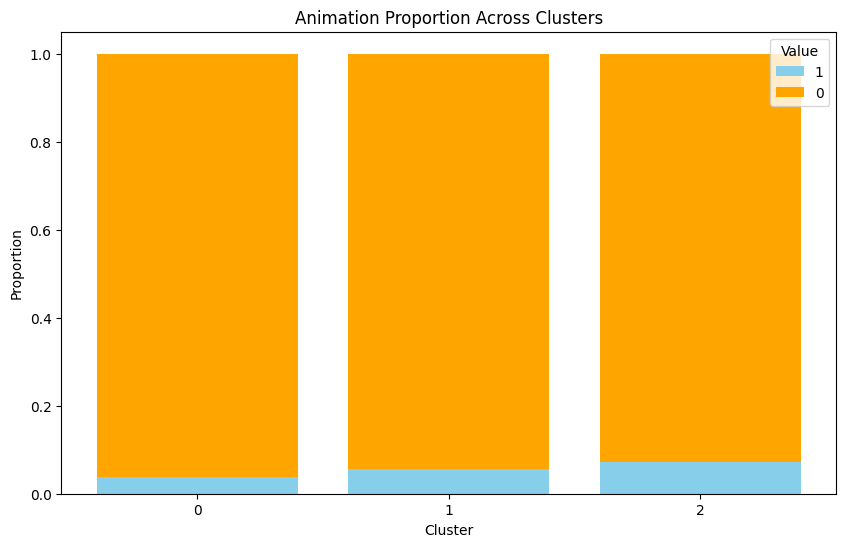

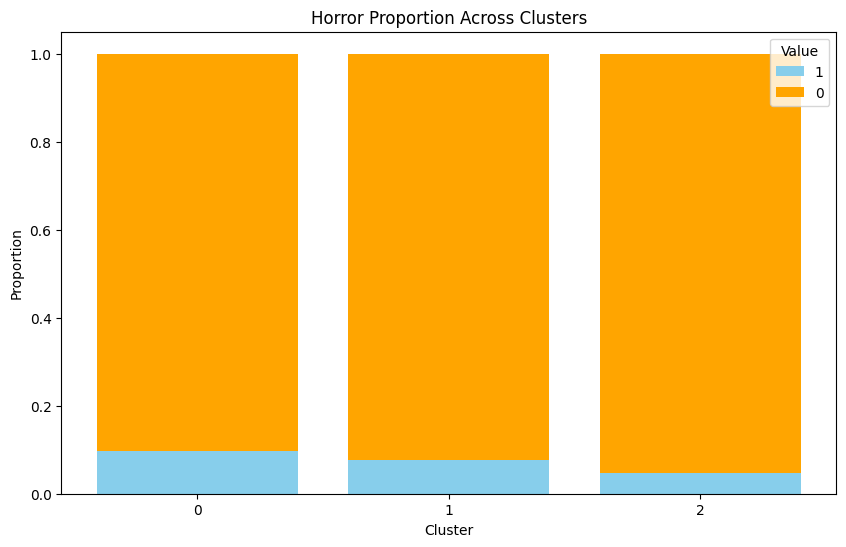

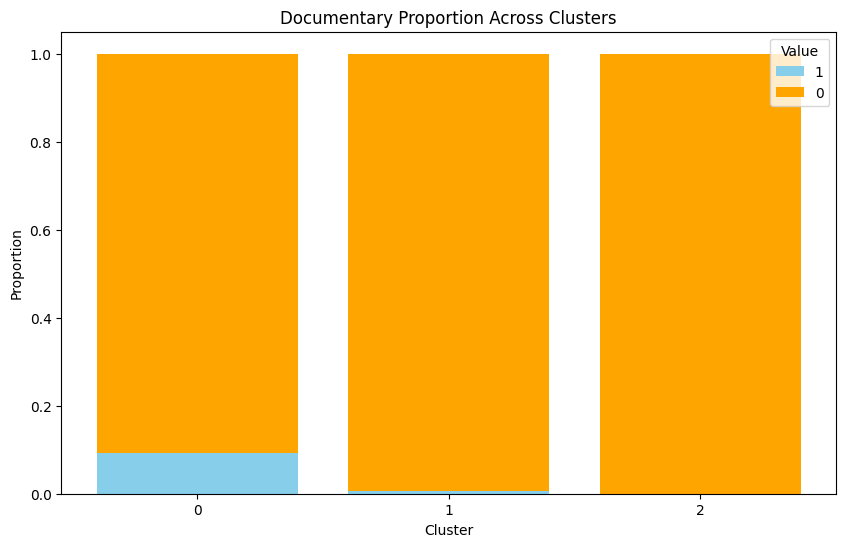

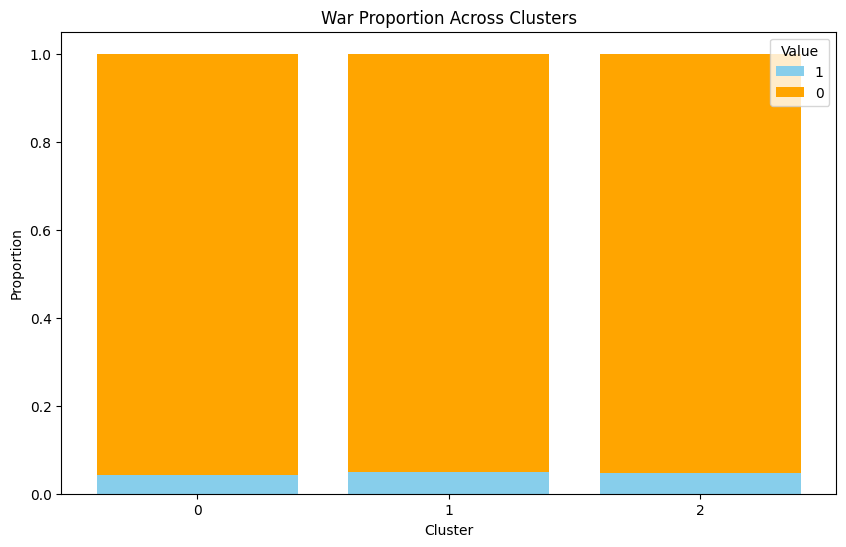

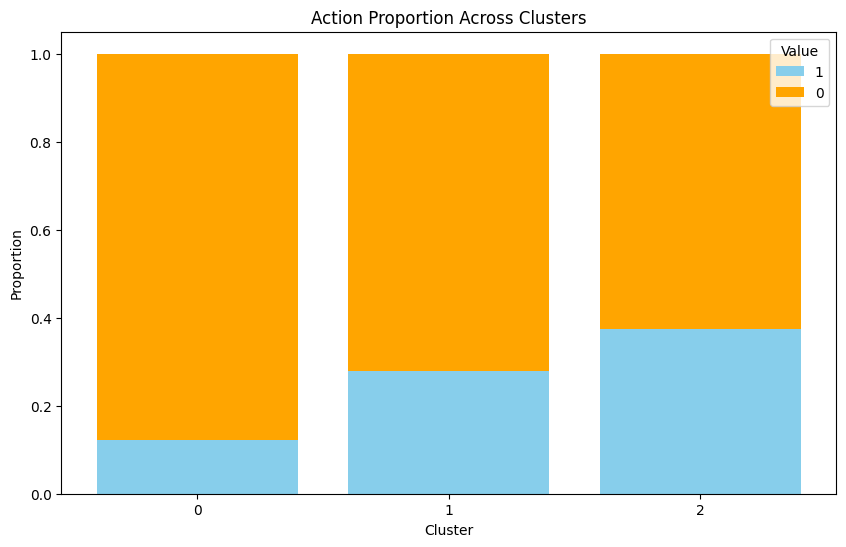

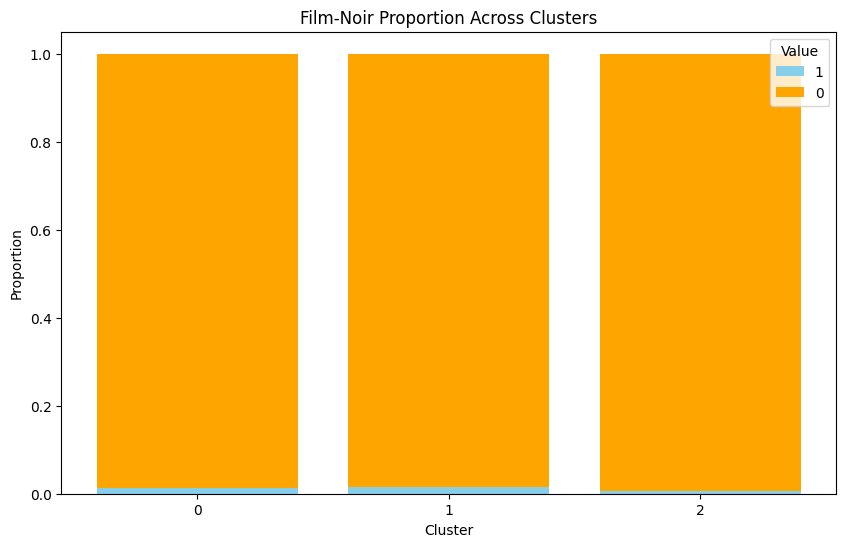

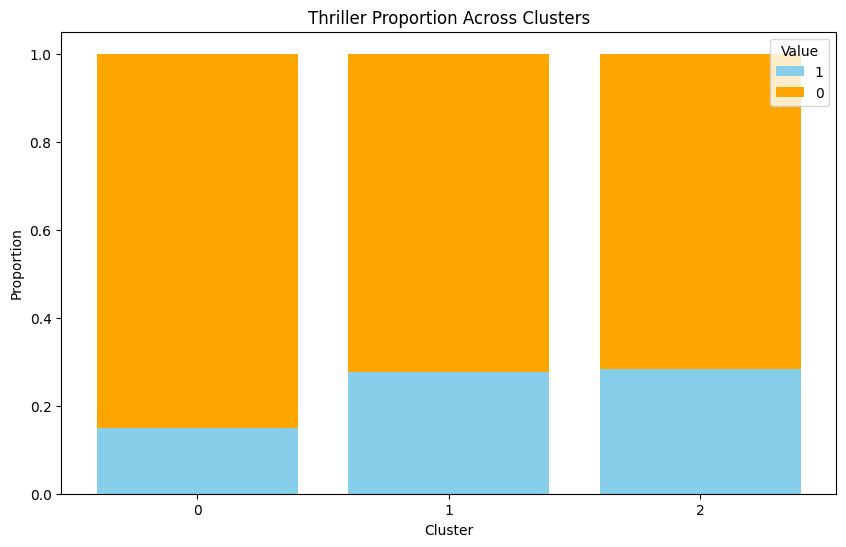

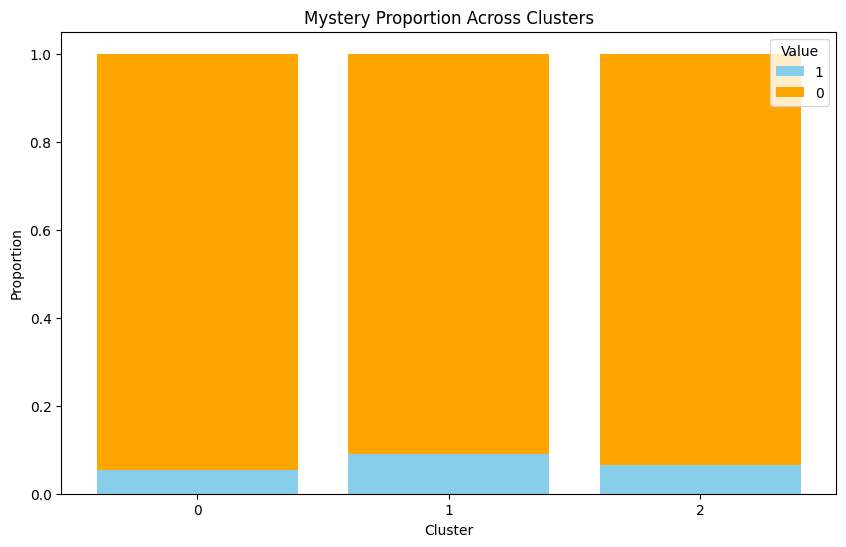

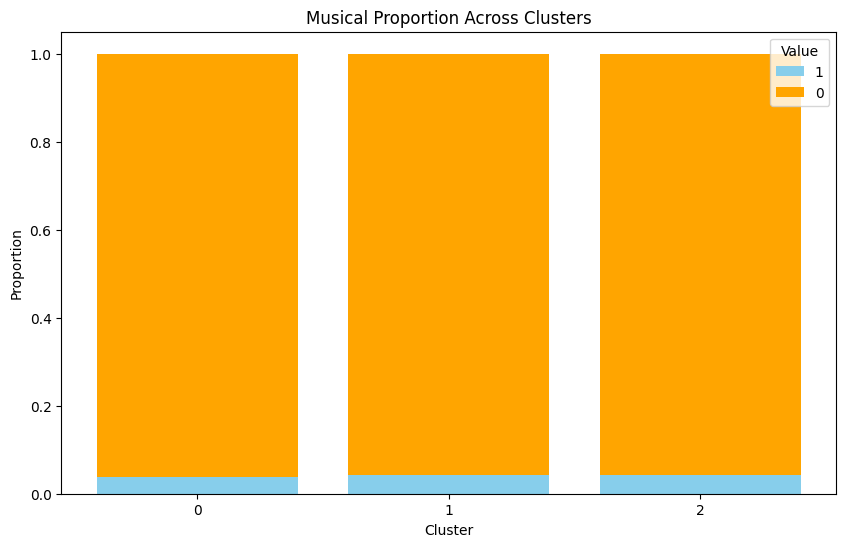

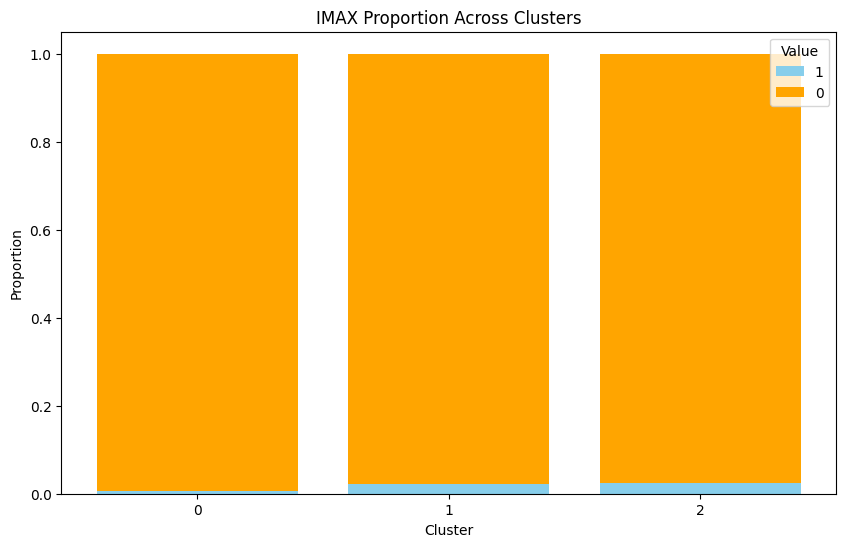

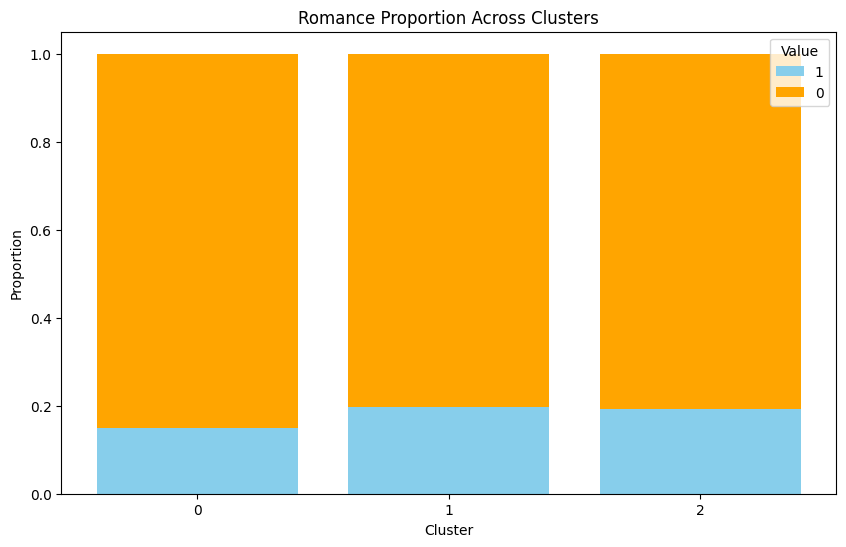

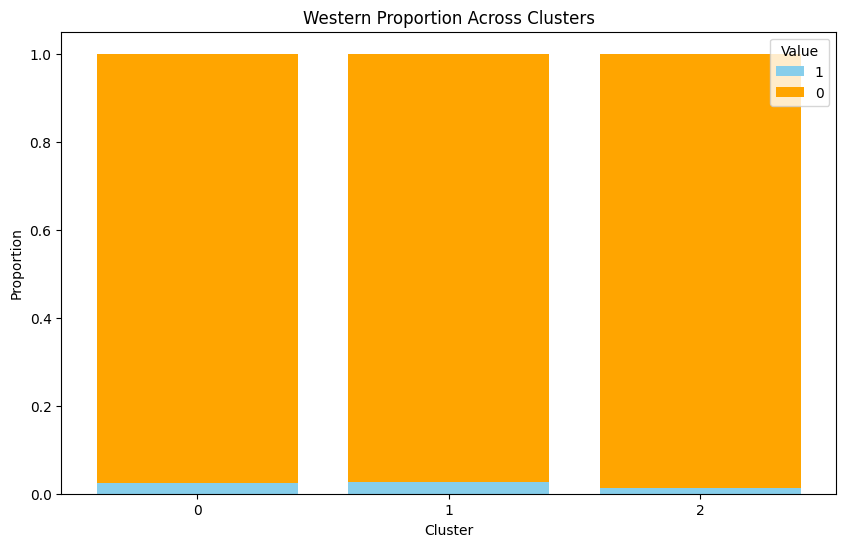

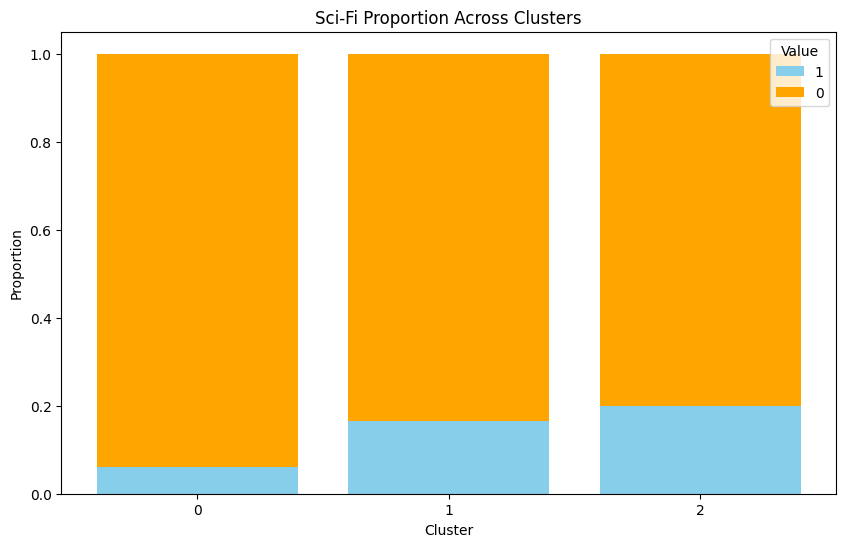

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select dummies
dummy_columns = [col for col in df_cl_numeric.columns if col not in ['year', 'ratings_avg', 'ratings_med', 'num_ratings', 'num_tags', 'Cluster']]

# Pproportions
dummy_summary = df_cl_numeric.groupby('Cluster')[dummy_columns].mean()

# Plot stacked bar charts
for column in dummy_columns:
    plt.figure(figsize=(10, 6))
    proportions = dummy_summary[column]
    plt.bar(dummy_summary.index, proportions, label='1', color='skyblue')
    plt.bar(dummy_summary.index, 1 - proportions, bottom=proportions, label='0', color='orange')
    plt.title(f"{column} Proportion Across Clusters")
    plt.xlabel("Cluster")
    plt.ylabel("Proportion")
    plt.legend(title="Value")
    plt.xticks(dummy_summary.index)
    plt.show()

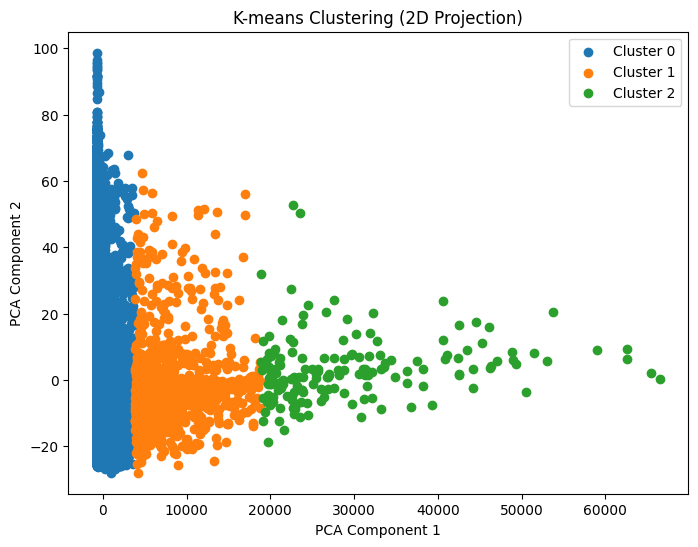

In [130]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2) #2 dimensions
data_2d = pca.fit_transform(df_cl_numeric)

# Scatter plot
plt.figure(figsize=(8, 6))
for cluster_id in unique:
    plt.scatter(data_2d[clusters_kmeanspp == cluster_id, 0], data_2d[clusters_kmeanspp == cluster_id, 1], label=f"Cluster {cluster_id}")
plt.title("K-means Clustering (2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

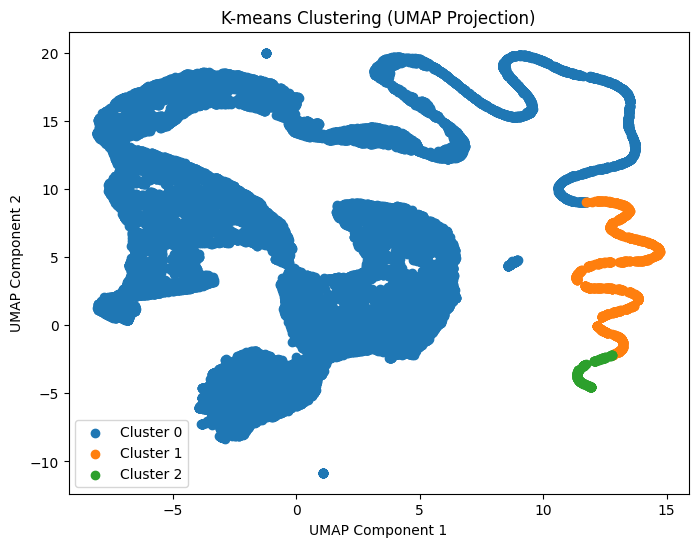

In [131]:
import umap

# Reduce data to 2D using UMAP
umap_reducer = umap.UMAP(n_components=2)
data_2d_umap = umap_reducer.fit_transform(df_cl_numeric)

plt.figure(figsize=(8, 6))
for cluster_id in np.unique(clusters_kmeanspp):
    plt.scatter(data_2d_umap[clusters_kmeanspp == cluster_id, 0], data_2d_umap[clusters_kmeanspp == cluster_id, 1], label=f"Cluster {cluster_id}")
plt.title("K-means Clustering (UMAP Projection)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend()
plt.show()

In [132]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette = silhouette_score(data, clusters_kmeanspp)
print(f"Silhouette Score: {silhouette:.3f}")

# Calculate Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data, clusters_kmeanspp)
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

Silhouette Score: 0.921
Davies-Bouldin Index: 0.483


In [133]:
df_cl_numeric_no_cluster = df_cl_numeric.drop(columns=['Cluster'], errors='ignore')

# Recompute centroids 
centroids_kmeanspp = []
for cluster_id in np.unique(clusters_kmeanspp):
    cluster_points = df_cl_numeric_no_cluster[clusters_kmeanspp == cluster_id].to_numpy()
    centroids_kmeanspp.append(cluster_points.mean(axis=0))
centroids_kmeanspp = np.array(centroids_kmeanspp)

# Compute Intra-cluster Distances
intra_distances = []
for i, centroid in enumerate(centroids_kmeanspp):
    intra_cluster_points = df_cl_numeric_no_cluster[clusters_kmeanspp == i].to_numpy()  # Convert to NumPy
    distances = np.linalg.norm(intra_cluster_points - centroid, axis=1)
    intra_distances.append(np.mean(distances))
print("\nIntra-cluster Distances:")
print(intra_distances)

# Compute Inter-cluster Distances
from itertools import combinations

centroid_combinations = list(combinations(range(len(centroids_kmeanspp)), 2))
inter_distances = [
    np.linalg.norm(centroids_kmeanspp[i] - centroids_kmeanspp[j]) for i, j in centroid_combinations
]
print("\nInter-cluster Distances:")
print(inter_distances)




Intra-cluster Distances:
[367.01170639420167, 3067.5475212806414, 8152.184845678281]

Inter-cluster Distances:
[8632.366274305497, 29993.78581970554, 21361.435850366932]


### Comparing the results

K-means clustering is sensitive to the placement of initial centroids. Poor initialization can result in suboptimal clusters or even different final results. K-means++ instead, ensures that the initial centroids are spread out, reducing the likelihood of convergence to a poor local minimum.

Random initialization is more likely to converge to a local minimum, while K-means++ increases the chance of finding a better local or global minimum.

K-means++ is computationally more efficient in the long run because it reduces the number of iterations needed for convergence.


K-means++ typically produces clusters that are better separated and more compact, in this case the metrics gave similar results cause it was a "simple" task, proved by how only a single dimension could explain almost all the variance.


K-means++ results are less variable across multiple runs compared to random initialization, making it more reliable for consistent clustering results.









### Ask an LLM


Sure, let's explore an alternative clustering algorithm by reaching out to my knowledge. One commonly recommended alternative to K-means and K-means++ is DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Here's a detailed explanation of the algorithm and its implementation:

##### Recommendation: DBSCAN

Description:

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed and marks points that lie alone in low-density regions as outliers.

Key Concepts:

- Core Points: A point with at least min_samples points within a radius eps.
- Border Points: A point within the eps radius of a core point but not a core point itself.
- Noise: Points that are neither core nor border points.
  
How It Works:

- Start with an arbitrary point and check its neighborhood (using eps).
- If it is a core point, form a cluster with its neighbors.
- Recursively add all density-reachable points to the cluster.
- Move to the next unvisited point and repeat until all points are visited.
  
Advantages:

- Can discover clusters of arbitrary shapes.
- Automatically identifies outliers.
- Does not require the number of clusters to be specified upfront.
  
Disadvantages:

- Sensitive to the choice of eps and min_samples.
- Struggles with datasets of varying densities.
- Computationally expensive for large datasets due to pairwise distance calculations.

Cluster Counts (DBSCAN):
DBSCAN_Cluster
-1     26506
 5        13
 10       10
 7         8
 24        8
 0         8
 22        7
 28        7
 32        7
 18        7
 13        7
 16        7
 17        7
 35        6
 1         6
 27        6
 29        6
 15        6
 11        6
 12        6
 14        6
 19        6
 9         6
 21        6
 26        6
 2         5
 3         5
 4         5
 20        5
 8         5
 6         5
 23        5
 25        5
 31        5
 30        5
 33        5
 34        5
 36        5
 37        5
Name: count, dtype: int64
Number of Outliers Identified by DBSCAN: 26506


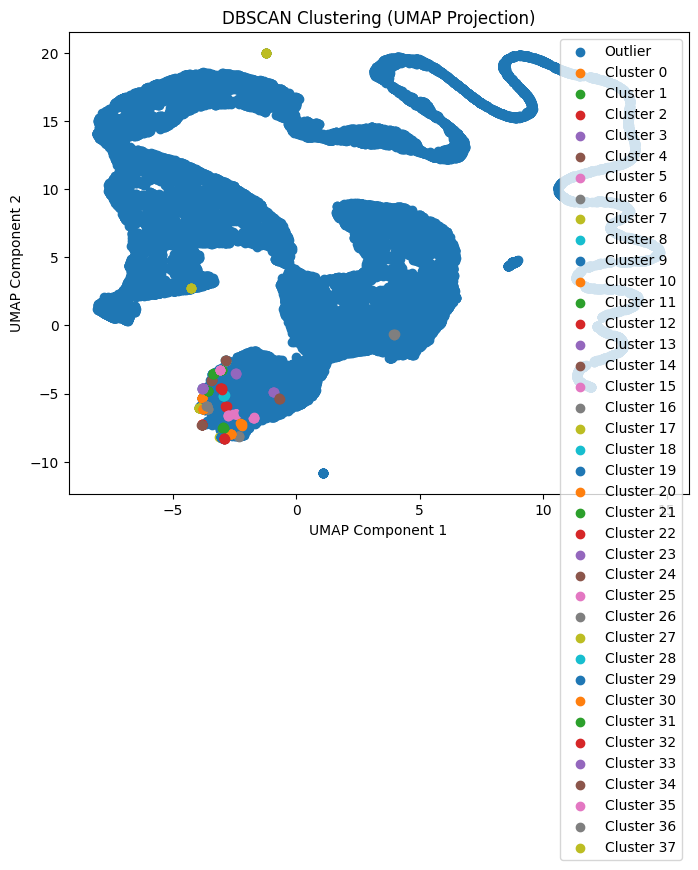

In [134]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model and predict clusters
clusters_dbscan = dbscan.fit_predict(df_cl_numeric_no_cluster)

# Add cluster assignments to the DataFrame
df_cl_numeric['DBSCAN_Cluster'] = clusters_dbscan

# Count cluster assignments
print("Cluster Counts (DBSCAN):")
print(df_cl_numeric['DBSCAN_Cluster'].value_counts())

# Check for outliers (Cluster = -1)
num_outliers = (clusters_dbscan == -1).sum()
print(f"Number of Outliers Identified by DBSCAN: {num_outliers}")

# Plotting UMAP for DBSCAN Clusters
plt.figure(figsize=(8, 6))
unique_clusters = np.unique(clusters_dbscan)
for cluster_id in unique_clusters:
    cluster_data = data_2d_umap[clusters_dbscan == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_id}" if cluster_id != -1 else "Outlier")
plt.title("DBSCAN Clustering (UMAP Projection)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend()
plt.show()


##### Comparing DBSCAN with K-means and K-means++

Number of Clusters:

- DBSCAN might find a different number of clusters compared to K-means and K-means++ since it doesn’t require the number of clusters as input.

Cluster Shapes:

- DBSCAN can find clusters of arbitrary shapes, whereas K-means works best with spherical clusters.

Outliers:

- DBSCAN explicitly identifies outliers (marked as -1), while K-means assigns every point to a cluster.

Compactness and Separation:

- Evaluate intra-cluster distances (compactness) and inter-cluster distances (separation) for DBSCAN clusters and compare with K-means results.

Visualization:

- DBSCAN may produce clusters that are more irregular in shape, which can be visualized using UMAP.

##### Let's get more inside on LLM solution

In [135]:
unique_labels = np.unique(clusters_dbscan)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude outliers (-1)
num_outliers = (clusters_dbscan == -1).sum()
print(f"Number of Clusters: {num_clusters}")
print(f"Number of Outliers: {num_outliers}")


Number of Clusters: 38
Number of Outliers: 26506


First of all, at first glance, the number of outliers scared me, but it seeamed to overlap cluster 0 in Kmeans ++ algorithm.
I want to get deeper info about it, Kmeans should not be able to identify Clusters but probably he putted together every data points that couldn't assign to a proper cluster. This explain why only one dimension could explain almost all the variance and confirm that using PCA is not the right choice since there is a non-linear relationship underneath, using PCA for visualization purpose only confuse us (I'd have never reached this solution)

Number of DBSCAN outliers: 26506
Number of K-means Cluster 0 points: 25646
Number of intersecting points: 25408 (95.86%)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


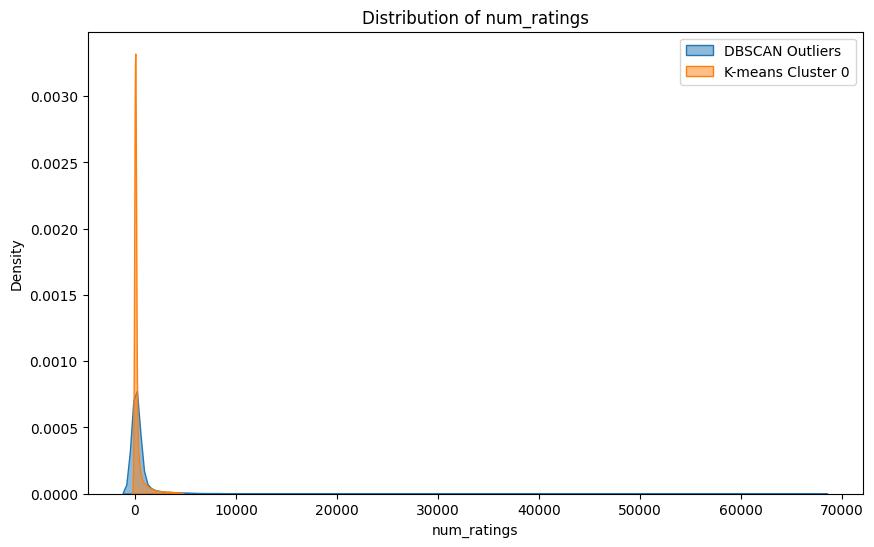

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


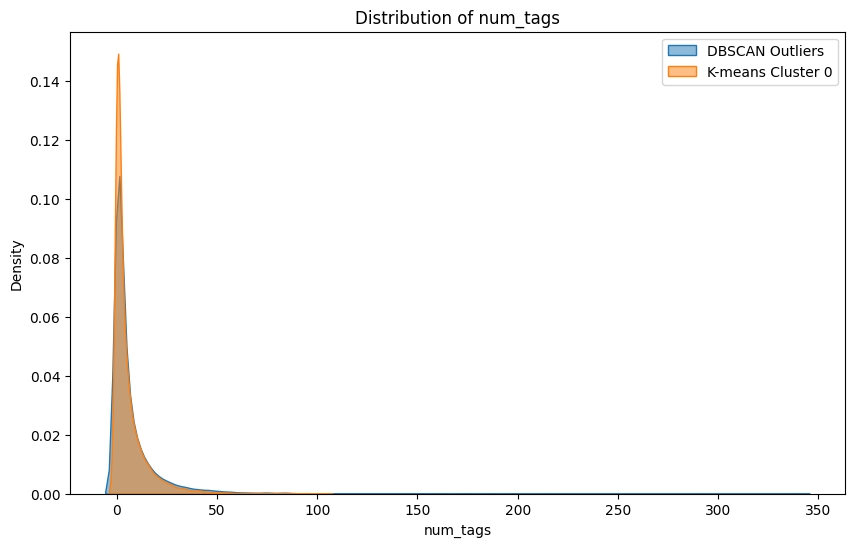

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


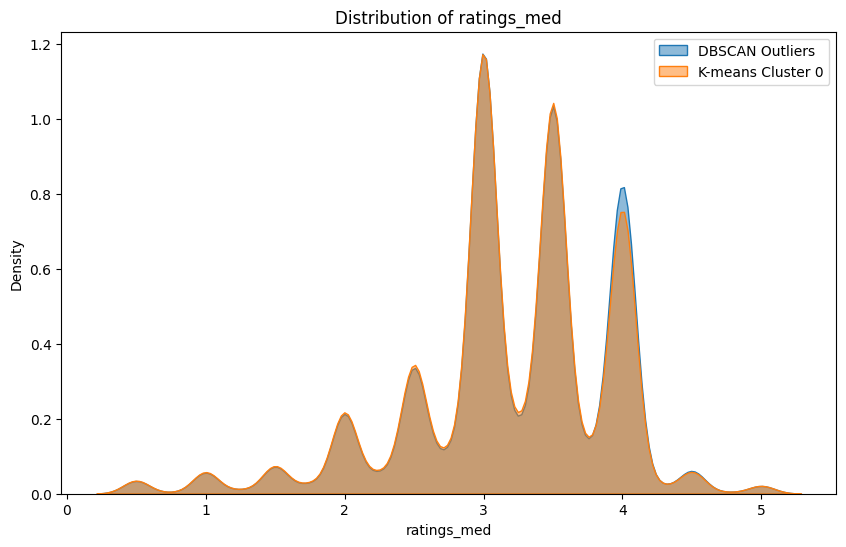

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


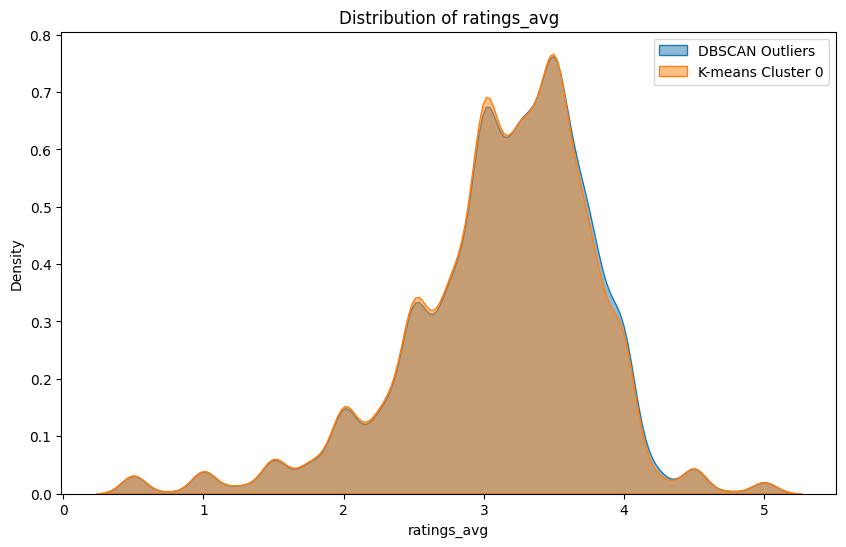

In [136]:
# Identify outliers from DBSCAN
dbscan_outliers = df_cl_numeric_no_cluster[clusters_dbscan == -1]

# Identify points in K-means++ Cluster 0
kmeans_cluster_0 = df_cl_numeric_no_cluster[clusters_kmeanspp == 0]

# Check intersection
intersection = dbscan_outliers.index.intersection(kmeans_cluster_0.index)
intersection_percentage = len(intersection) / len(dbscan_outliers) * 100

print(f"Number of DBSCAN outliers: {len(dbscan_outliers)}")
print(f"Number of K-means Cluster 0 points: {len(kmeans_cluster_0)}")
print(f"Number of intersecting points: {len(intersection)} ({intersection_percentage:.2f}%)")

# Let's try to overlap a few of the main features
features_to_plot = ["num_ratings","num_tags", "ratings_med", "ratings_avg"] 
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(dbscan_outliers[feature], label="DBSCAN Outliers", fill=True, alpha=0.5)
    sns.kdeplot(kmeans_cluster_0[feature], label="K-means Cluster 0", fill=True, alpha=0.5)
    plt.title(f"Distribution of {feature}")
    plt.legend()
    plt.show()


Really interesting how Cluster 0 focus on almost the same data points that DBScan classify as outliers. The distribution on the main features overlap almost perfectly.

Let's see instead how the cluster identified by both the algorithms overlap between each other

In [137]:
# Combine K-means Cluster 1 and 2
kmeans_combined = df_cl_numeric_no_cluster[(clusters_kmeanspp == 1) | (clusters_kmeanspp == 2)]

# Include all DBSCAN clusters (exclude outliers)
dbscan_in_clusters = df_cl_numeric_no_cluster[clusters_dbscan != -1]  # Exclude outliers

# Calculate intersection and overlap
overlap_indices = kmeans_combined.index.intersection(dbscan_in_clusters.index)
overlap_percentage_kmeans = len(overlap_indices) / len(kmeans_combined) * 100
overlap_percentage_dbscan = len(overlap_indices) / len(dbscan_in_clusters) * 100

print(f"Number of points in combined K-means Clusters (1 & 2): {len(kmeans_combined)}")
print(f"Number of points in DBSCAN Clusters (excluding outliers): {len(dbscan_in_clusters)}")
print(f"Number of overlapping points: {len(overlap_indices)}")
print(f"Overlap percentage relative to K-means Combined: {overlap_percentage_kmeans:.2f}%")
print(f"Overlap percentage relative to DBSCAN Clusters: {overlap_percentage_dbscan:.2f}%")

Number of points in combined K-means Clusters (1 & 2): 1098
Number of points in DBSCAN Clusters (excluding outliers): 238
Number of overlapping points: 0
Overlap percentage relative to K-means Combined: 0.00%
Overlap percentage relative to DBSCAN Clusters: 0.00%


No need to plot anything because there is literally no overlapping (It could be seen by Umap plot but this confirms it).

They use complitely different methods to identify cluster so this make sense, but not having one single points seams really strange, the dataset we build may not be optimal for unsupervised learning

In [138]:
# silhouette score 
valid_indices = clusters_dbscan != -1  # Exclude outliers
silhouette_avg = silhouette_score(
    df_cl_numeric_no_cluster.to_numpy()[valid_indices],
    clusters_dbscan[valid_indices]
)
print(f"Silhouette Score (DBSCAN): {silhouette_avg}")


Silhouette Score (DBSCAN): 0.8917023408278368


Result is slightly smaller than Kmeans algorithm but it classify almost every data points as outliers (I think those are the same that Kmeans classify as Cluster 0 (The biggest)), while the Cluster generated are subclasses of the two Cluster made by Kmeans

In [139]:
intra_distances = []
for label in range(num_clusters):
    cluster_points = df_cl_numeric_no_cluster[clusters_dbscan == label].to_numpy()
    centroid = cluster_points.mean(axis=0)
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    intra_distances.append(distances.mean())
print("DBSCAN Intra-cluster Distances (Compactness):", intra_distances)


DBSCAN Intra-cluster Distances (Compactness): [0.0, 0.0, 0.22627416997969516, 0.3041599360511487, 0.088, 0.3640135500782819, 0.12799999999999984, 0.0, 0.16970562748477144, 0.0, 0.38890872965260115, 0.0, 0.0, 0.0, 0.0, 0.2736114542693662, 0.0, 0.0, 0.0, 0.2946278254943948, 0.0, 0.0, 0.31747651400212334, 0.1414213562373095, 0.0, 0.11313708498984747, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [140]:
centroids_dbscan = [
    df_cl_numeric_no_cluster[clusters_dbscan == label].mean().to_numpy()
    for label in range(num_clusters)
]
inter_distances = [
    np.linalg.norm(centroids_dbscan[i] - centroids_dbscan[j])
    for i, j in combinations(range(num_clusters), 2)
]
print("DBSCAN Inter-cluster Distances (Separation):", inter_distances)


DBSCAN Inter-cluster Distances (Separation): [1.8708286933869707, 1.4764823060233399, 4.088080234046294, 4.137100433878781, 2.2441574373359585, 12.680599354920098, 3.082207001484488, 1.0222524150130436, 1.0, 3.171947351391571, 3.082207001484488, 2.0, 1.0, 2.1213203435596424, 3.744234250612105, 1.8708286933869707, 1.7320508075688772, 4.0, 2.8777161083053344, 1.224744871391589, 2.5495097567963922, 1.4854738816489588, 3.4641016151377544, 2.1213203435596424, 2.68421310629391, 4.0, 2.5495097567963922, 3.0, 3.082207001484488, 3.5355339059327378, 3.605551275463989, 3.3166247903554, 1.224744871391589, 4.06201920231798, 3.082207001484488, 1.5811388300841898, 61.00409822298826, 2.6608269391300143, 4.625191887911247, 4.791200267156446, 3.57847360934534, 11.896957594275941, 4.47213595499958, 2.201136070305514, 2.5495097567963922, 4.462202371027114, 2.449489742783178, 3.391164991562634, 1.5811388300841898, 1.7320508075688772, 4.846804343655623, 2.449489742783178, 2.5495097567963922, 3.3911649915626

The results of intra-cluster and inter-cluster distances for DBSCAN are as follows:

1. Analysis of Intra-cluster Distances

- Many clusters have an intra-cluster distance of 0.0, which indicates that these clusters may consist of a single point or very closely located points.
- For the non-zero intra-cluster distances, values range from 0.088 to 0.364 for most clusters. These relatively low values suggest that DBSCAN has effectively identified dense regions, this imply high homogeneity within the cluster.

DBSCAN’s density-based approach leads to clusters with high compactness by definition, as it forms clusters based on density reachability. Single points or small groups of closely packed points are treated as small clusters, leading to compact clusters.

2. Analysis of Inter-cluster Distances

- The inter-cluster distances vary significantly, from values as small as 1.0 to as large as 64.0.
- The presence of large inter-cluster distances (e.g., 64.0, 63.0) indicates that some clusters are very well-separated.
- Smaller inter-cluster distances (e.g., 1.0, 1.7) could suggest that some clusters are closely located or might be sub-clusters within a larger cluster.

DBSCAN’s clustering is highly dependent on the density-based parameter eps. Smaller eps values might result in tighter clusters but more inter-cluster proximity, while larger eps values could lead to fewer, well-separated clusters.

##### Comparison to K-means and K-means++

Strengths of DBSCAN:

- Flexibility in Cluster Shapes: Unlike K-means, which assumes spherical clusters, DBSCAN can identify clusters of arbitrary shapes.
- Automatic Outlier Detection: Points labeled as -1 are outliers, which K-means does not explicitly handle.
- Density-based Nature: Clusters are formed based on density reachability, leading to naturally compact clusters.
- 
Weaknesses of DBSCAN:

- Parameter Sensitivity: The quality of DBSCAN clustering is highly dependent on the choice of eps and min_samples. Poor parameter choices can result in excessive noise or poorly formed clusters.
- Scalability: DBSCAN is computationally expensive for large datasets, especially with high-dimensional data.
- Cluster Sizes: DBSCAN might produce many small clusters or single-point clusters, as evident in the results.








##### Tuning the parameter Epsilon

The k-Distance Graph shows the distances to the k-th nearest neighbor for each data point, sorted in ascending order. This plot is essential for determining the optimal eps parameter for DBSCAN.

- The flat region in the beginning represents points that are densely packed. These points are close to their k-nearest neighbors, indicating a dense cluster.

- The point where the curve transitions sharply from a flat region to a steep rise is called the "elbow."
This elbow is the optimal value for the eps parameter in DBSCAN because it distinguishes dense regions (clusters) from sparse regions (outliers).

- After the elbow, the distances increase sharply, representing outliers or noise points that are far away from other points.


In [141]:
# kneed library can automate the detection of the elbow
#!pip install Kneed

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


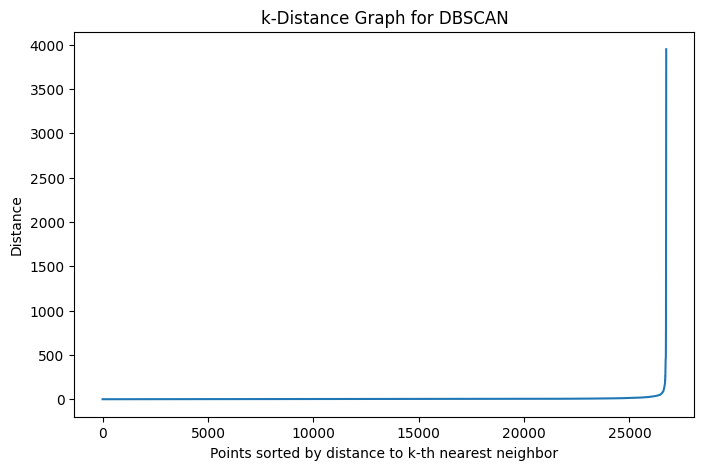

Optimal eps value: 767.2005179924118
Number of clusters: 3
Number of noise points: 51


In [142]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

k = 3  
nbrs = NearestNeighbors(n_neighbors=k).fit(df_cl_numeric_no_cluster)
distances, indices = nbrs.kneighbors(df_cl_numeric_no_cluster)

k_distances = np.sort(distances[:, k - 1]) 
plt.figure(figsize=(8, 5))
plt.plot(range(len(k_distances)), k_distances)
plt.title("k-Distance Graph for DBSCAN")
plt.xlabel("Points sorted by distance to k-th nearest neighbor")
plt.ylabel("Distance")
plt.show()

# find the optimal eps value with KneeLocator
kneedle = KneeLocator(range(len(k_distances)), k_distances, curve="convex", direction="increasing")
optimal_eps = k_distances[kneedle.knee]  # Extract optimal eps value

print(f"Optimal eps value: {optimal_eps}")

# DBSCAN 
dbscan = DBSCAN(eps=optimal_eps, min_samples=10)
clusters = dbscan.fit_predict(df_cl_numeric_no_cluster)

unique_clusters = np.unique(clusters)
print(f"Number of clusters: {len(unique_clusters) - (1 if -1 in unique_clusters else 0)}")
print(f"Number of noise points: {np.sum(clusters == -1)}")



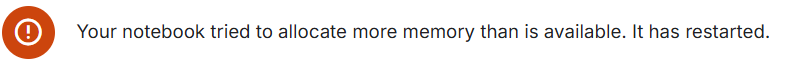

Code was pretty have with the tuned epsilon parameter so we had to divide into chunk to not run out of memory in our notebook

In [143]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# df to NumPy array for efficient computation
data_array = df_cl_numeric_no_cluster.to_numpy(dtype=np.float32)

min_samples = 10 

chunk_size = 5000  
num_chunks = (data_array.shape[0] + chunk_size - 1) // chunk_size  
clusters = np.zeros(data_array.shape[0], dtype=int) - 1  # Initialize all as outliers

for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, data_array.shape[0])
    
    # Run DBSCAN on each chunk
    dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples, metric='euclidean', n_jobs=-1)  # Use parallel processing
    clusters_chunk = dbscan.fit_predict(data_array[start_idx:end_idx])
    

    clusters[start_idx:end_idx] = clusters_chunk

df_cl_numeric['DBSCAN_Cluster'] = clusters

print("Cluster Counts (CPU DBSCAN):")
print(pd.Series(clusters).value_counts())
num_outliers = (clusters == -1).sum()
print(f"Number of Outliers Identified by DBSCAN: {num_outliers}")


Cluster Counts (CPU DBSCAN):
 0    26661
-1       51
 2       17
 1       15
Name: count, dtype: int64
Number of Outliers Identified by DBSCAN: 51


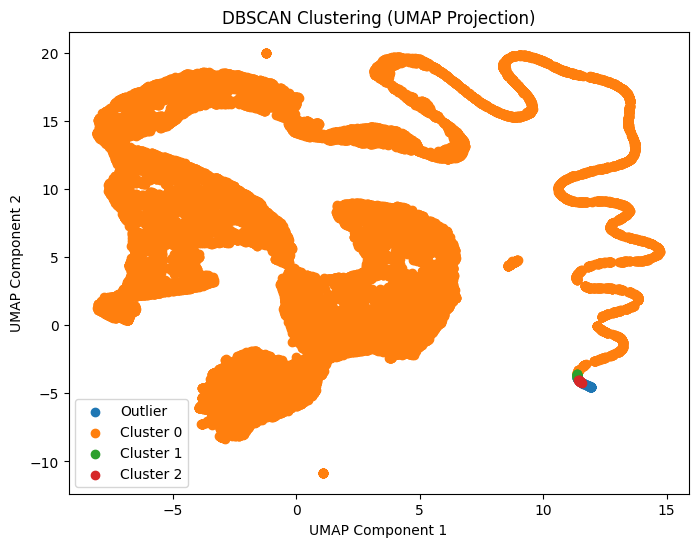

In [144]:
# Plotting UMAP for DBSCAN Clusters for tuned parameters
plt.figure(figsize=(8, 6))

unique_clusters = np.unique(clusters)  
for cluster_id in unique_clusters:
    cluster_data = data_2d_umap[clusters == cluster_id]  
    plt.scatter(
        cluster_data[:, 0],
        cluster_data[:, 1],
        label=f"Cluster {cluster_id}" if cluster_id != -1 else "Outlier"
    )

plt.title("DBSCAN Clustering (UMAP Projection)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend()
plt.show()



In [145]:
dbscan_in_clusters_tuned = df_cl_numeric_no_cluster[clusters != 0]  # Exclude outliers

# Calculate intersection and overlap
overlap_indices = kmeans_combined.index.intersection(dbscan_in_clusters_tuned.index)
overlap_percentage_kmeans = len(overlap_indices) / len(kmeans_combined) * 100
overlap_percentage_dbscan = len(overlap_indices) / len(dbscan_in_clusters_tuned) * 100

print(f"Number of points in combined K-means Clusters (1 & 2): {len(kmeans_combined)}")
print(f"Number of points in DBSCAN Clusters (excluding Cluster 0): {len(dbscan_in_clusters_tuned)}")
print(f"Number of overlapping points: {len(overlap_indices)}")
print(f"Overlap percentage relative to DBSCAN Clusters: {overlap_percentage_dbscan:.2f}%")

Number of points in combined K-means Clusters (1 & 2): 1098
Number of points in DBSCAN Clusters (excluding Cluster 0): 83
Number of overlapping points: 83
Overlap percentage relative to DBSCAN Clusters: 100.00%


With proper tuning we managed to find a "meeting point" between the two algorithms, even if there are still a lot of problems due to the large amount of outliers (Not identifed under cluster 0 here as well)

### Bonus Question

Select two variables* from your instances to display them on a 2D plot. Then, illustrate the progression of the clusters as they change at each iteration. We expect a plot for each iteration, displaying the instances and the clusters they belong to. Select the two features that most effectively separate visual instances belonging to different clusters. Explain the method you used to determine these features.
*Note: Depending on the variables you want to use for clustering, whether they are the original movie features or the components derived from PCA, you may select two features/components that best help to visually display the clusters.




To answer this we are gonna use **Empirical results**, so we are gona try Feature Selection and Dimensionality Reduction tecniques and choose our results depending by **Silhouette score** and **Davies Bouldin score**

##### Feature Selection tecniques

In [59]:
from sklearn.feature_selection import mutual_info_classif
# Measures the dependency between features and cluster labels

# Compute mutual information scores
mutual_info = mutual_info_classif(df_cl_numeric_no_cluster, clusters_kmeanspp, random_state=42)
mi_scores = pd.Series(mutual_info, index=df_cl_numeric_no_cluster.columns)

# Select the top 2 features
top_2_features_mutual = mi_scores.nlargest(2).index

print("Top 2 Features by Mutual Information:")
print(top_2_features_mutual)

# Filter data
selected_features_mutual = df_cl_numeric_no_cluster[top_2_features_mutual]


Top 2 Features by Mutual Information:
Index(['num_ratings', 'num_tags'], dtype='object')


In [60]:
# Compute feature-wise correlation with clusters
# Use correlation between features and cluster labels
correlations = df_cl_numeric_no_cluster.corrwith(pd.Series(clusters_kmeanspp))
top_2_features_FW = correlations.abs().nlargest(2).index

print("Top 2 Features by Correlation with Cluster Labels:")
print(top_2_features_FW)

# Filter data
selected_features_FW = df_cl_numeric_no_cluster[top_2_features_FW]


Top 2 Features by Correlation with Cluster Labels:
Index(['num_ratings', 'num_tags'], dtype='object')


In [61]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# Iteratively removes the least important features using a surrogate model like logistic regression or decision trees

# Fit RFE with Random Forest
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(df_cl_numeric_no_cluster, clusters_kmeanspp)

# top 2 features
top_2_features_RFE = df_cl_numeric_no_cluster.columns[rfe.support_]

print("Top 2 Features by RFE:")
print(top_2_features_RFE)

# Filter data
selected_features = df_cl_numeric_no_cluster[top_2_features_RFE]

Top 2 Features by RFE:
Index(['num_ratings', 'num_tags'], dtype='object')


They all provide the same result, we can try to use those features as general Feature Selection Tecniques

##### Dimensionality Reduction Tecniques

Explained Variance by PCA Components:
[9.99932189e-01 5.62142027e-05]


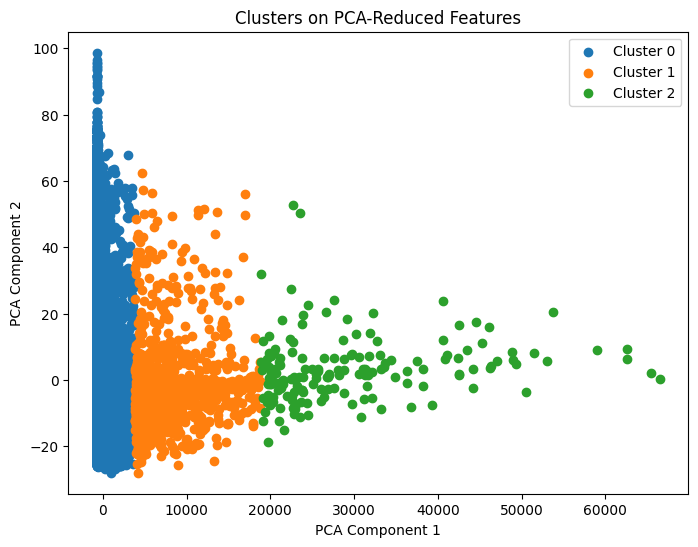

In [62]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
data_2d_pca = pca.fit_transform(df_cl_numeric_no_cluster)

print("Explained Variance by PCA Components:")
print(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(clusters_kmeanspp):
    cluster_data = data_2d_pca[clusters_kmeanspp == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_id}")
plt.title("Clusters on PCA-Reduced Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


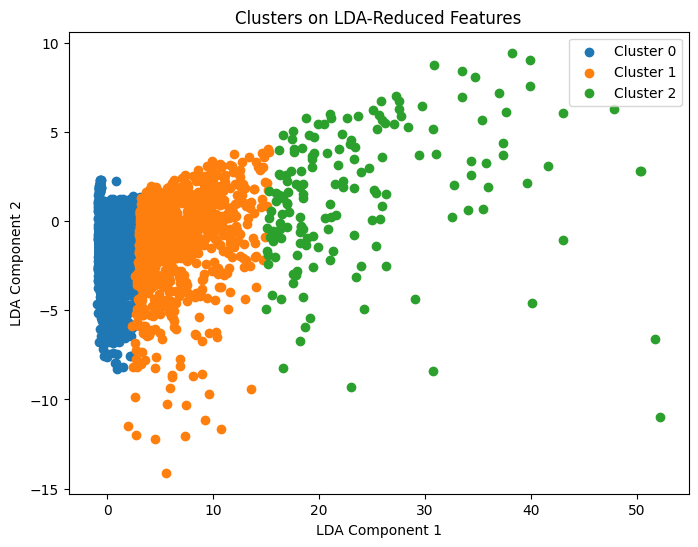

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA for dimensionality reduction
lda = LinearDiscriminantAnalysis(n_components=2)
data_2d_lda = lda.fit_transform(df_cl_numeric_no_cluster, clusters_kmeanspp)

# Plot
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(clusters_kmeanspp):
    cluster_data = data_2d_lda[clusters_kmeanspp == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_id}")
plt.title("Clusters on LDA-Reduced Features")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend()
plt.show()


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


209/209 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 124.7014
Epoch 2/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.1251
Epoch 3/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.9585
Epoch 4/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.6185
Epoch 5/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.2025
Epoch 6/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.9427
Epoch 7/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.6173
Epoch 8/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125.1068
Epoch 9/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.1173
Epoch 10/10
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.7594
836/836 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


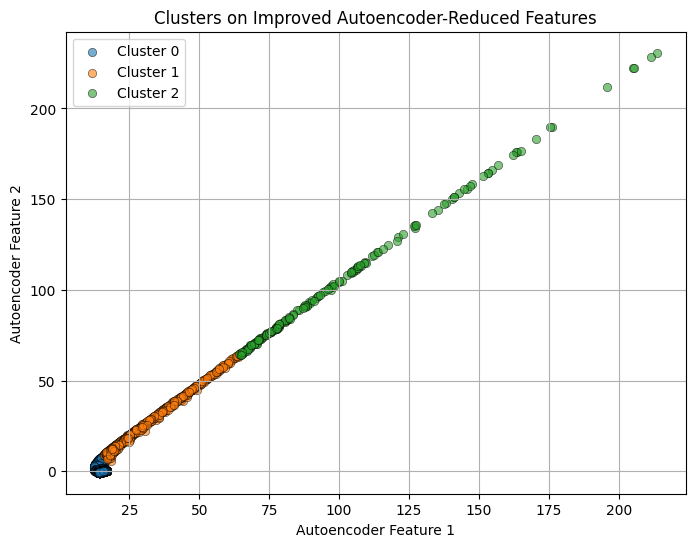

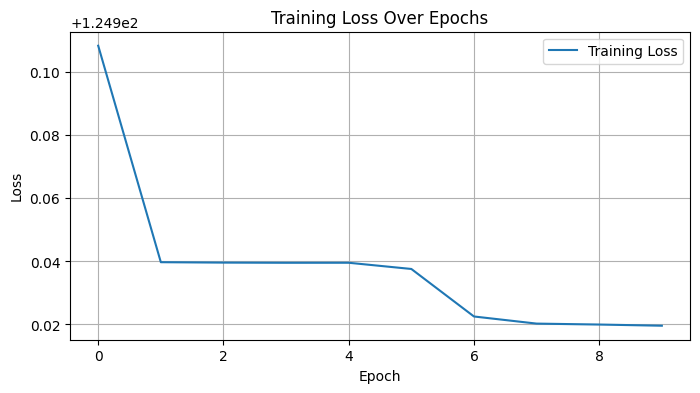

In [66]:
from keras.layers import Input, Dense, BatchNormalization, Dropout, LeakyReLU
from keras.models import Model
import matplotlib.pyplot as plt

# Define the improved autoencoder model
input_dim = df_cl_numeric_no_cluster.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation=None)(input_layer)
encoded = BatchNormalization()(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)
encoded = Dense(32, activation=None)(encoded)
encoded = LeakyReLU(alpha=0.1)(encoded)
bottleneck = Dense(2, activation=None)(encoded)  # 2D representation
decoded = Dense(32, activation=None)(bottleneck)
decoded = LeakyReLU(alpha=0.1)(decoded)
decoded = Dense(64, activation=None)(decoded)
decoded = LeakyReLU(alpha=0.1)(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
encoder = Model(inputs=input_layer, outputs=bottleneck)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mae')  # Using MAE as loss
history = autoencoder.fit(
    df_cl_numeric_no_cluster, 
    df_cl_numeric_no_cluster, 
    epochs=10, 
    batch_size=128, 
    shuffle=True, 
    verbose=1
)

# Get 2D bottleneck representation
data_2d_autoencoder = encoder.predict(df_cl_numeric_no_cluster)

# Plot Autoencoder results
plt.figure(figsize=(8, 6))
unique_clusters = np.unique(clusters_kmeanspp)
for cluster_id in unique_clusters:
    cluster_data = data_2d_autoencoder[clusters_kmeanspp == cluster_id]
    plt.scatter(
        cluster_data[:, 0], 
        cluster_data[:, 1], 
        label=f"Cluster {cluster_id}", 
        alpha=0.6,  # Transparency
        edgecolors='k', 
        linewidth=0.5
    )
plt.title("Clusters on Improved Autoencoder-Reduced Features")
plt.xlabel("Autoencoder Feature 1")
plt.ylabel("Autoencoder Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


As anticipated before, we are gonna select the 

In [67]:
methods = {
    "UMAP": data_2d_umap, #was already calculated before
    "Autoencoder": data_2d_autoencoder,
    "PCA": data_2d_pca,
    "LDA": data_2d_lda,
    "Feature Selection (RFE)": selected_features.to_numpy()
}


In [69]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}
for method, reduced_data in methods.items():
    silhouette_scores[method] = silhouette_score(reduced_data, clusters_kmeanspp)
    print(f"Silhouette Score ({method}): {silhouette_scores[method]}")


Silhouette Score (UMAP): 0.16816021502017975
Silhouette Score (Autoencoder): 0.9159244298934937
Silhouette Score (PCA): 0.9212958735561467
Silhouette Score (LDA): 0.8439083294063986
Silhouette Score (Feature Selection (RFE)): 0.9223525916535417


In [70]:
from sklearn.metrics import davies_bouldin_score

db_indices = {}
for method, reduced_data in methods.items():
    db_indices[method] = davies_bouldin_score(reduced_data, clusters_kmeanspp)
    print(f"Davies-Bouldin Index ({method}): {db_indices[method]}")


Davies-Bouldin Index (UMAP): 0.8040598172929485
Davies-Bouldin Index (Autoencoder): 0.5433156320456648
Davies-Bouldin Index (PCA): 0.48273941786683316
Davies-Bouldin Index (LDA): 0.6219060346678754
Davies-Bouldin Index (Feature Selection (RFE)): 0.48271677245576433


In [71]:
explained_variance_ratio_pca = pca.explained_variance_ratio_
print(f"Explained Variance Ratio (PCA): {explained_variance_ratio_pca.sum()}")


Explained Variance Ratio (PCA): 0.9999884028726076


In [72]:
reconstruction_error = np.mean(np.square(df_cl_numeric_no_cluster - autoencoder.predict(df_cl_numeric_no_cluster)))
print(f"Reconstruction Error (Autoencoder): {reconstruction_error}")


836/836 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Reconstruction Error (Autoencoder): 637956.7370529803


RFE is the best choice because it balances interpretability (selects original features) with strong clustering metrics (best Davies-Bouldin and Silhouette Score).

PCA is nearly equivalent to RFE in metrics, and its ability to explain variance makes it a robust fallback, but we are gonna use RFE for its semplicity and mostly for its interpretability

K-means is an iterative algorithm, meaning that with each iteration, it refines the clusters by adjusting them based on the distance of each data point relative to the center of each cluster. This process continues until it reaches a point of convergence or hits a set limit on the number of iterations. You might want to track the progress of forming your clusters.



###### KMeans Tracking

In [ ]:
def kmeans_iterations(data, k, method="random", max_iterations=100, tolerance=1e-4):
    """
    Perform K-means clustering and track iterations.
    
    Parameters:
        data: numpy.ndarray
            The dataset to cluster.
        k: int
            Number of clusters.
        method: str
            Initialization method ("random" or "kmeans++").
        max_iterations: int
            Maximum number of iterations.
        tolerance: float
            Convergence tolerance.
    
    Returns:
        centroids_history: list of numpy.ndarray
            History of centroid positions at each iteration.
        cluster_history: list of numpy.ndarray
            History of cluster assignments at each iteration.
    """
    """
    It's the same function we already did before in our KMeans clustering Function, 
    this time btw we need to store each iteration to retrieve it later, 
    using the already implemented function was saving only the initial and final iterations
    """
    centroids = initialize_centroids(data, k, method)  # Initialize centroids
    centroids_history = [centroids]  # Store initial centroids
    cluster_history = []  # Store cluster assignments for each iteration

    for iteration in range(max_iterations):
        # Assign clusters based on current centroids
        clusters = assign_clusters(data, centroids)
        cluster_history.append(clusters)

        # Update centroids
        new_centroids = update_centroids(data, clusters, k)
        centroids_history.append(new_centroids)

        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            print(f"Converged at iteration {iteration}")
            break

        centroids = new_centroids

    return centroids_history, cluster_history


In [97]:
def visualize_kmeans_iterations(data, k, selected_features, selected_features_labels, method="random", max_iterations=100):
    """
    Visualize K-means clustering progress over iterations using the predefined kmeans_iterations function.

    Parameters:
    - data: The dataset (NumPy array or DataFrame) for clustering.
    - k: Number of clusters.
    - selected_features: Indices of features to use for visualization.
    - selected_features_labels: Names of the selected features for plotting.
    - method: Initialization method for centroids ("random" or "kmeans++").
    - max_iterations: Maximum number of iterations to run K-means.
    """
    selected_data = data[:, selected_features]

    centroids_history, cluster_history = kmeans_iterations(data, k=k, method=method, max_iterations=max_iterations)

    # Visualize 
    for iteration, (centroids, clusters) in enumerate(zip(centroids_history, cluster_history)):
        plt.figure(figsize=(8, 6))
        for cluster_id in np.unique(clusters):
            cluster_points = selected_data[clusters == cluster_id]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}")
        plt.scatter(centroids[:, selected_features[0]], centroids[:, selected_features[1]],
                    color='red', marker='x', s=100, label='Centroids')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel(selected_features_labels[0])
        plt.ylabel(selected_features_labels[1])
        plt.legend()
        plt.show()

    print("Visualization complete.")


Converged at iteration 5


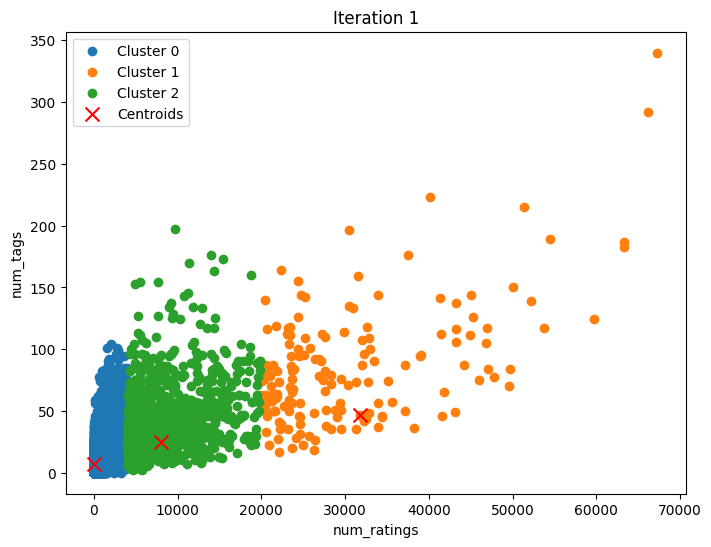

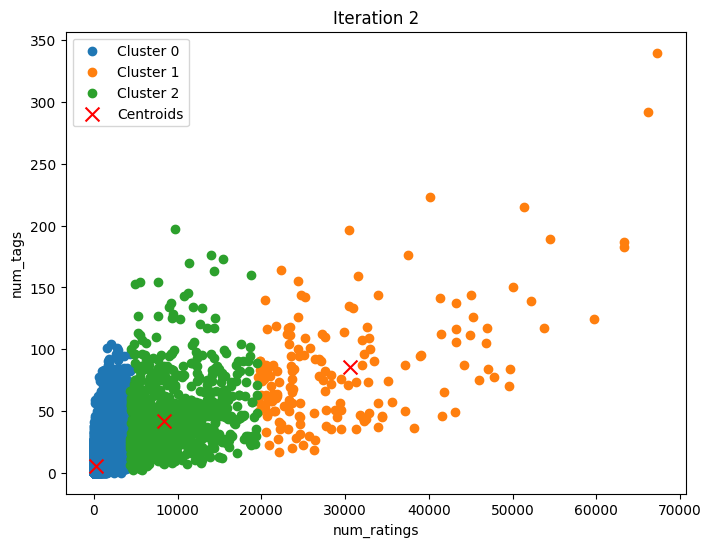

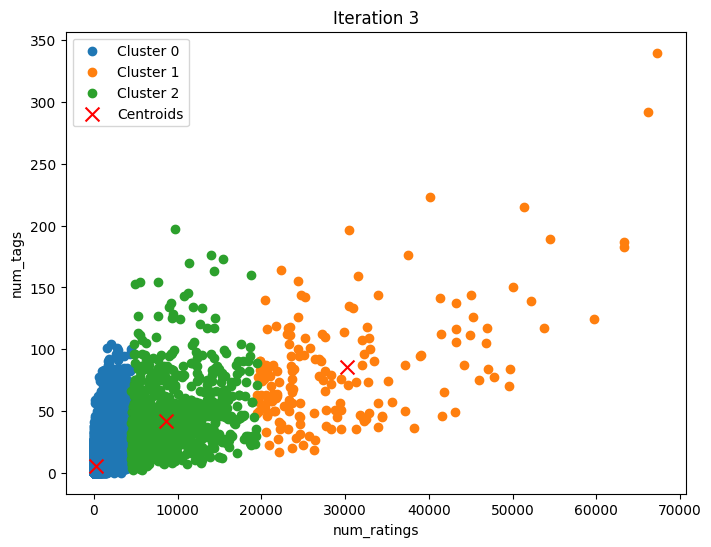

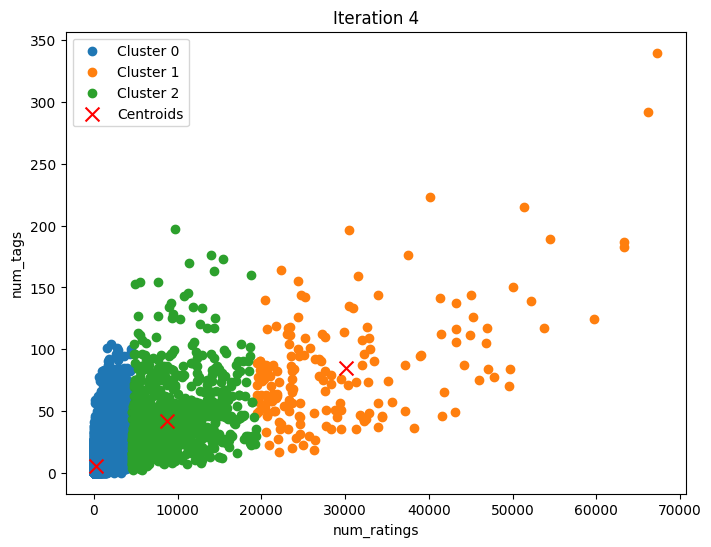

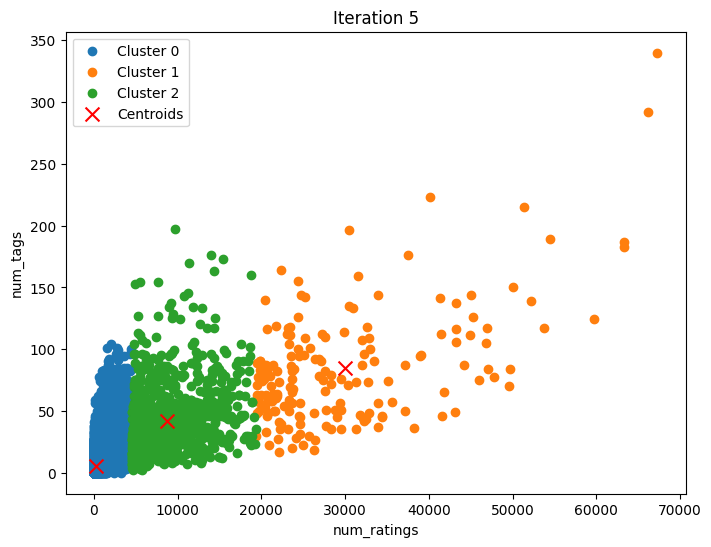

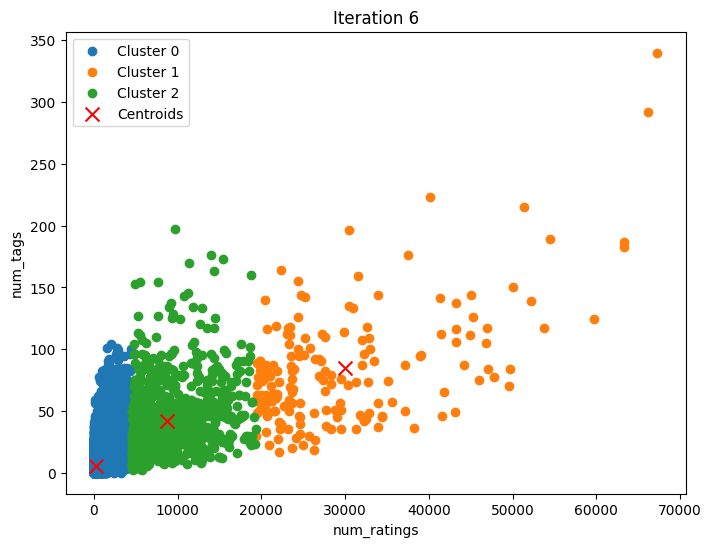

Visualization complete.


In [98]:
rfe_selected_features_labels = selected_features.columns.tolist()

data_rfe = selected_features.to_numpy()

visualize_kmeans_iterations(
    data=data_rfe,
    k=3,
    selected_features=[0, 1], 
    selected_features_labels=rfe_selected_features_labels,  
    method="kmeans++",
    max_iterations=20  
)



Let's see how Normal Kmeans behave, its randomness will be visualized this way

Converged at iteration 17


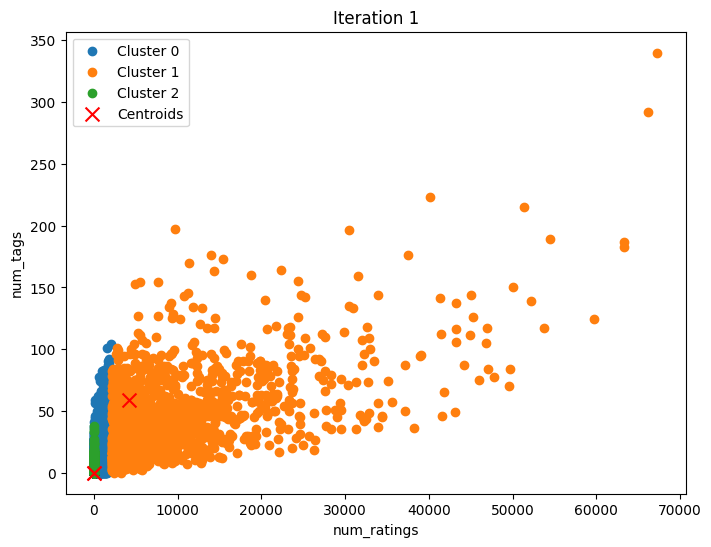

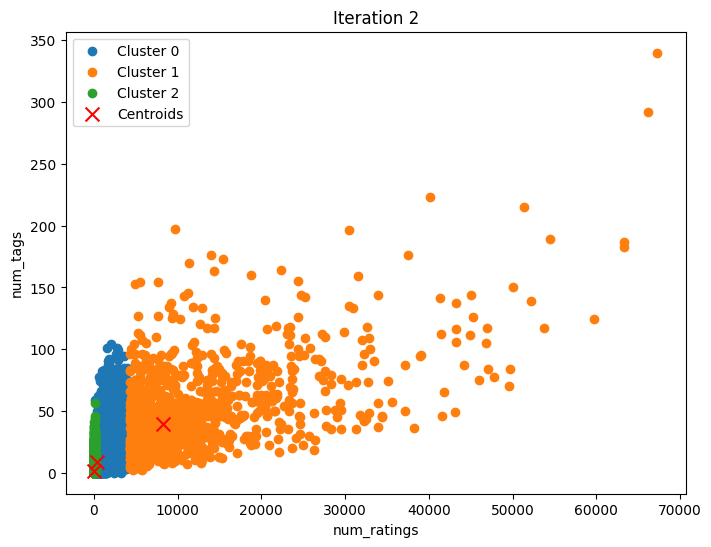

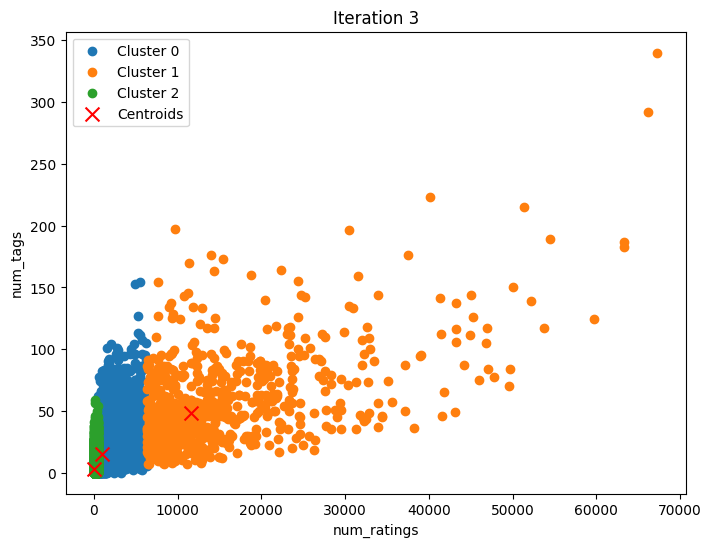

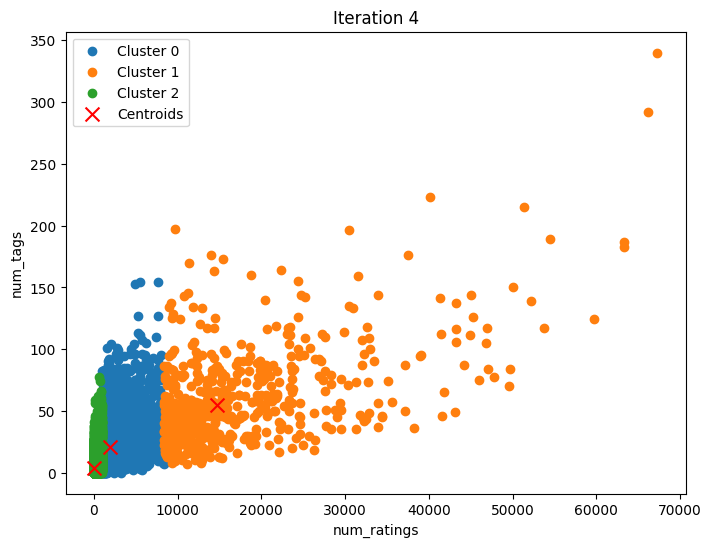

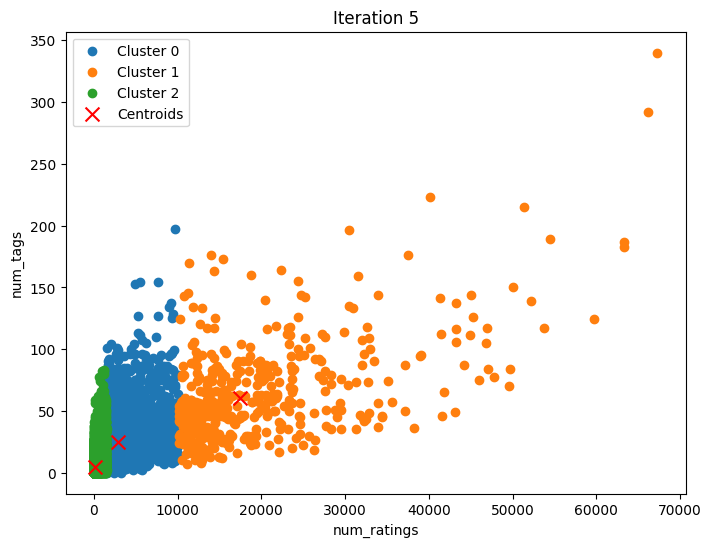

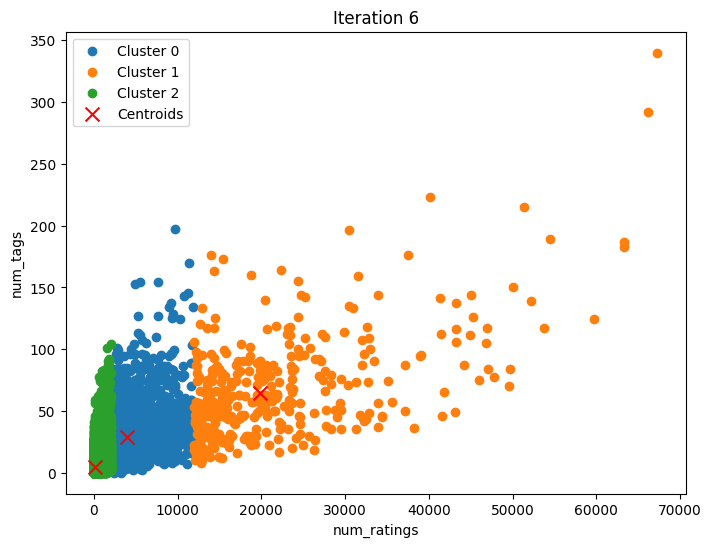

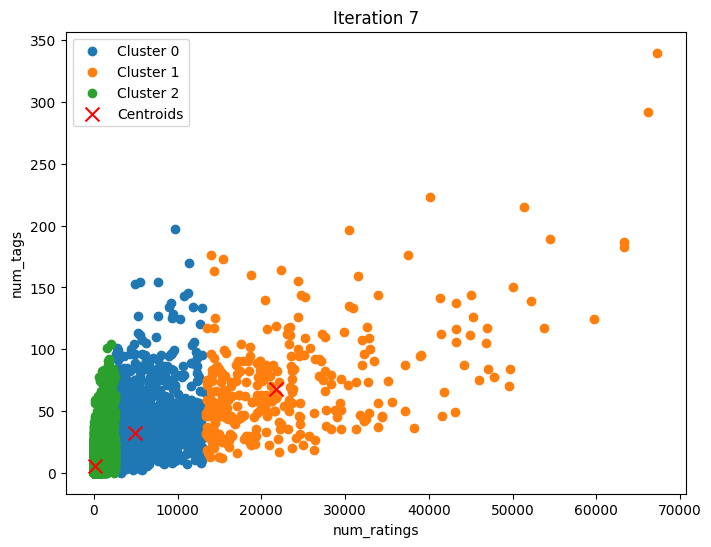

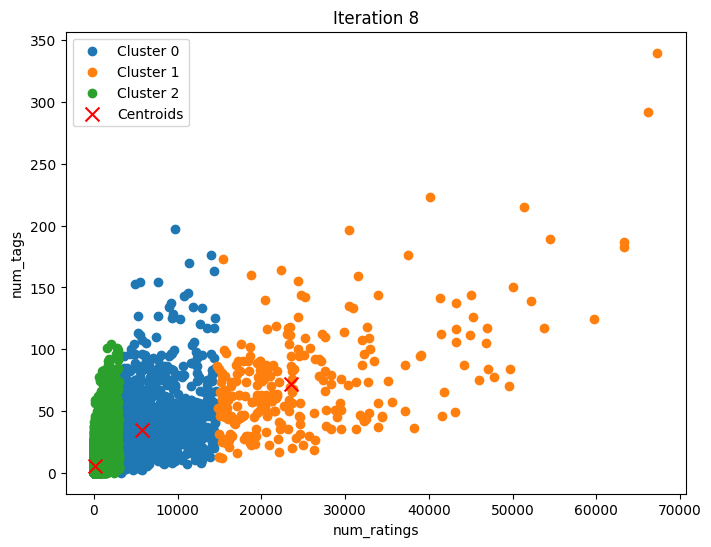

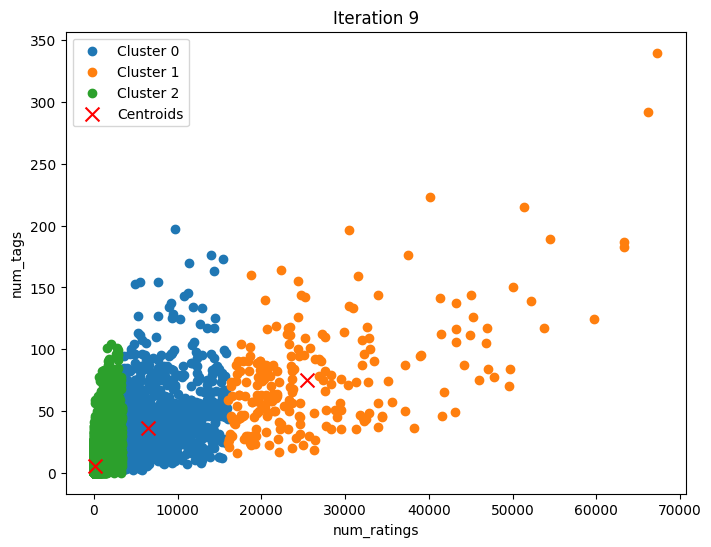

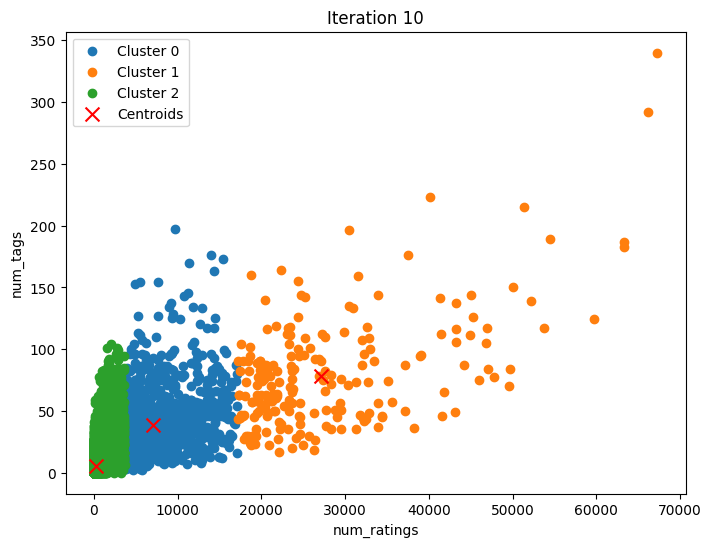

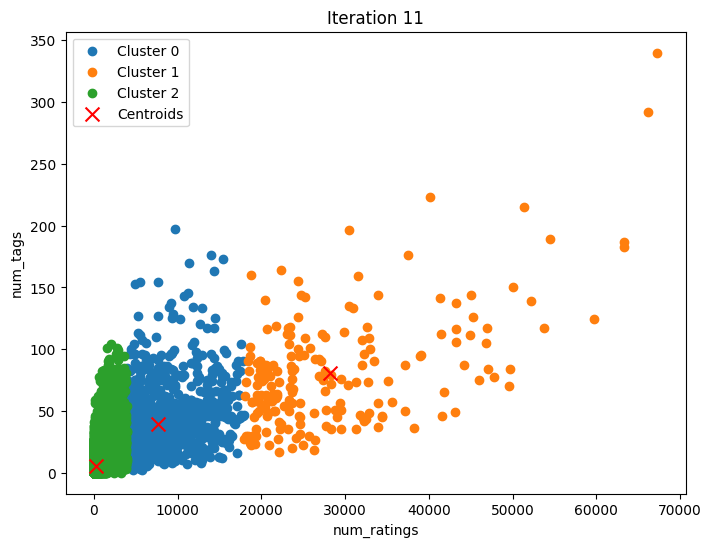

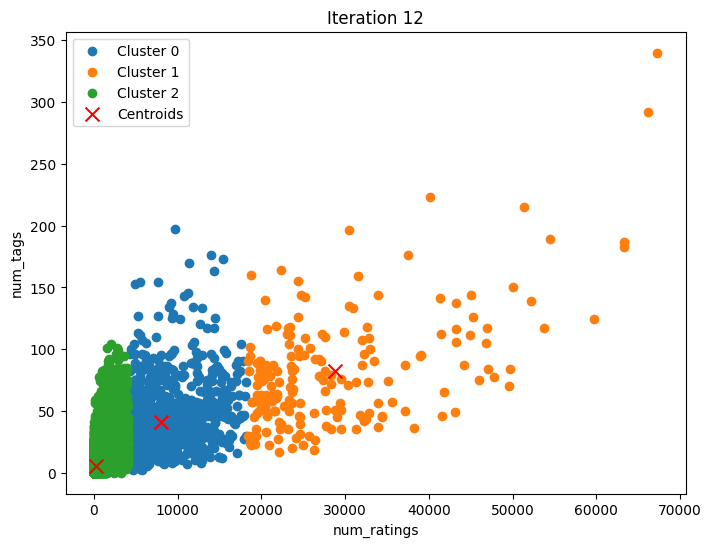

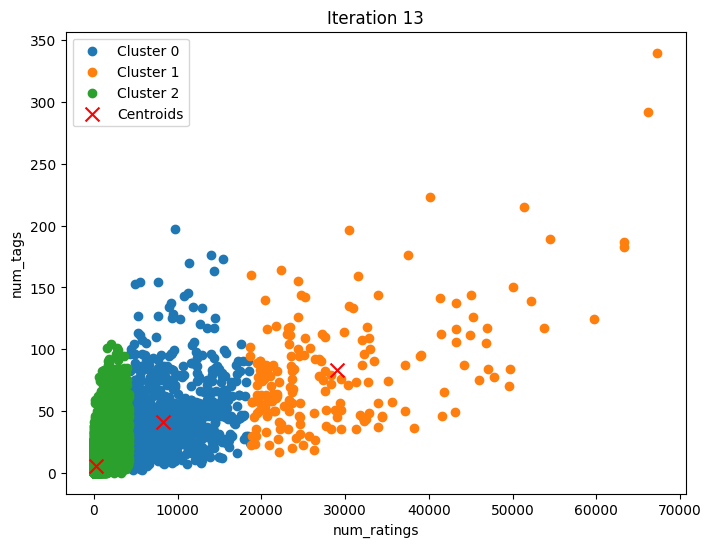

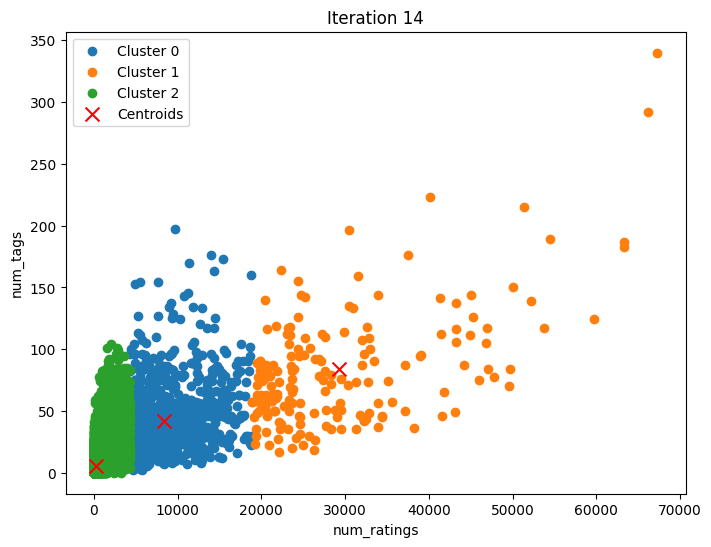

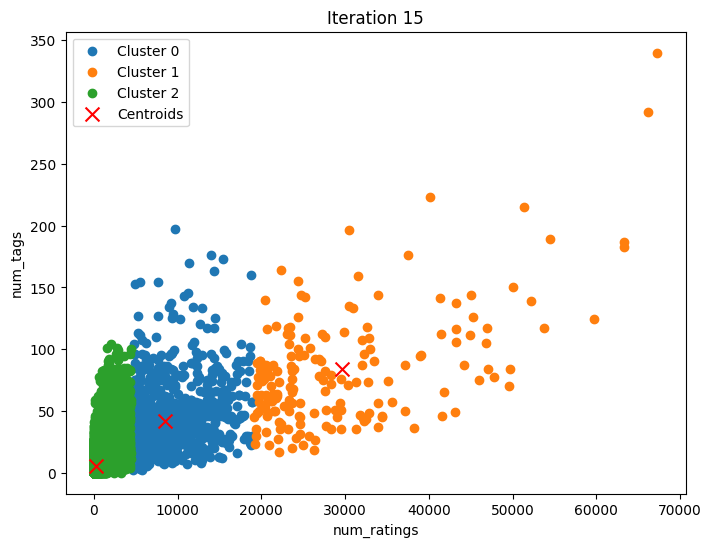

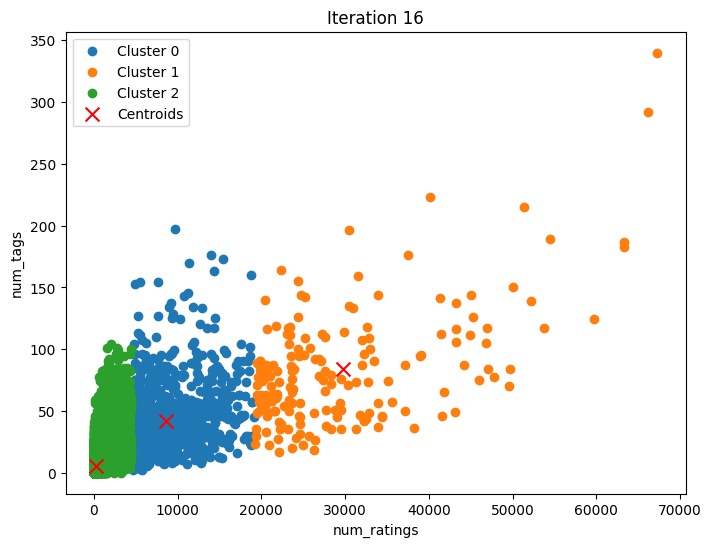

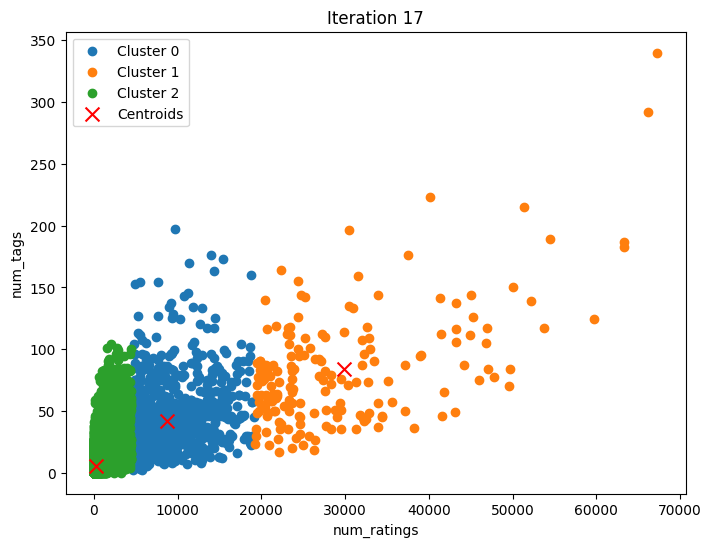

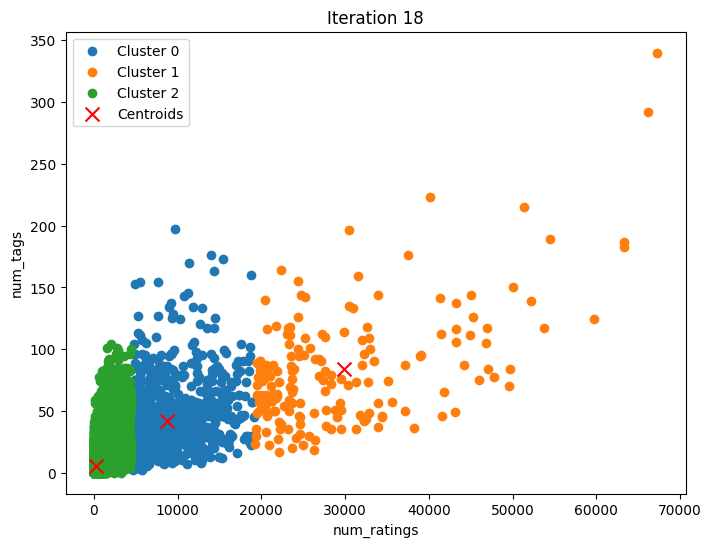

Visualization complete.


In [99]:
visualize_kmeans_iterations(
    data=data_rfe,
    k=3,
    selected_features=[0, 1],  
    selected_features_labels=rfe_selected_features_labels,  
    method="random",
    max_iterations=30
)



Cool to see how it converged to almost the same optimal solution provided by KMeans++ in less iterations and time